# Mental Health Prediction using health care records

Mental Health plays a prominent a role in our present day daily routine. There are many factors which influence the mental health of an individual. In the project here we accessed the data from CDC(Center for Disease Control), to extract the features of medical data, physiological data, data regarding individual’s lifestyle, and the prescription medication used by the individual.

The data is collected from the below source https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The data collected is between 2017 and 2020.

The collected data is in an .XPT format which is extracted using a module 'project_functions', which is taken from the source https://github.com/HeyThatsViv/Predicting-Depression/tree/33af52c20d6dd10d850c82fb10f66a50605e52be/project_functions.

Each type of data is quantised and understood by studying the docs attached to each type of data at the source of the data. The information of the columns can be looked up on the NHANES website, https://wwwn.cdc.gov/nchs/nhanes/default.aspx.

In [16]:
import numpy as np
np.random.seed(123)
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import sys
import missingno as ms
import inspect
from IPython.display import Markdown

In [17]:
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', None)
pd.set_option('mode.use_inf_as_na', True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
#drive.mount('/content/drive')
#sys.path.append('/content/drive/MyDrive/')
import project_functions as pf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
func = inspect.getsource(pf.glob_concat)
display(Markdown("```python\n"+func+"\n```"))

```python
def glob_concat(path, file_str):
    '''
    Looks for files in folder path and combines them into a DataFrame.
    Also sets the index to be the SEQN column.
    
    Args:
        path (str): Location on computer where files are located.
        file_str (str): Specific search query of which files to find.
        
    Returns:
        Displays the files that were found for verification and returns the 
        DataFrame of all files after pd.concat is performed and the index is set.
    
    Example:
        combined_df = glob_concat(r'File/File', '*.XPT')
    '''
    
    # Find the files in the folders
    files = glob.glob(os.path.join(path, file_str))

    # Print the files for verification when running the function
    display(files)

    # Combining all the files into a DataFrame
    df_files = [pd.read_sas(file) for file in files]
    combined_df = pd.concat(df_files)

    # Setting the index of the new DataFrame
    combined_df.SEQN = combined_df.SEQN.astype('int64')
    combined_df.set_index('SEQN', verify_integrity=True, inplace=True)
    return combined_df

```

In [22]:
path = r'CDC_Data/Mental_health'
df_mh = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/Mental_health/P_DPQ.XPT']

In [23]:
df_mh.drop(columns=['DPQ100'], inplace=True)

In [24]:
df_mh.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
109266,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
109271,2.000,1.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000
109273,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,0.000
109274,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
109282,0.000,1.000,0.000,1.000,0.000,0.000,0.000,3.000,0.000


In [25]:
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8965 entries, 109266 to 124822
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  8308 non-null   float64
 1   DPQ020  8306 non-null   float64
 2   DPQ030  8306 non-null   float64
 3   DPQ040  8305 non-null   float64
 4   DPQ050  8305 non-null   float64
 5   DPQ060  8304 non-null   float64
 6   DPQ070  8304 non-null   float64
 7   DPQ080  8304 non-null   float64
 8   DPQ090  8302 non-null   float64
dtypes: float64(9)
memory usage: 700.4 KB


In [26]:
df_mh.isna().sum()

DPQ010    657
DPQ020    659
DPQ030    659
DPQ040    660
DPQ050    660
DPQ060    661
DPQ070    661
DPQ080    661
DPQ090    663
dtype: int64

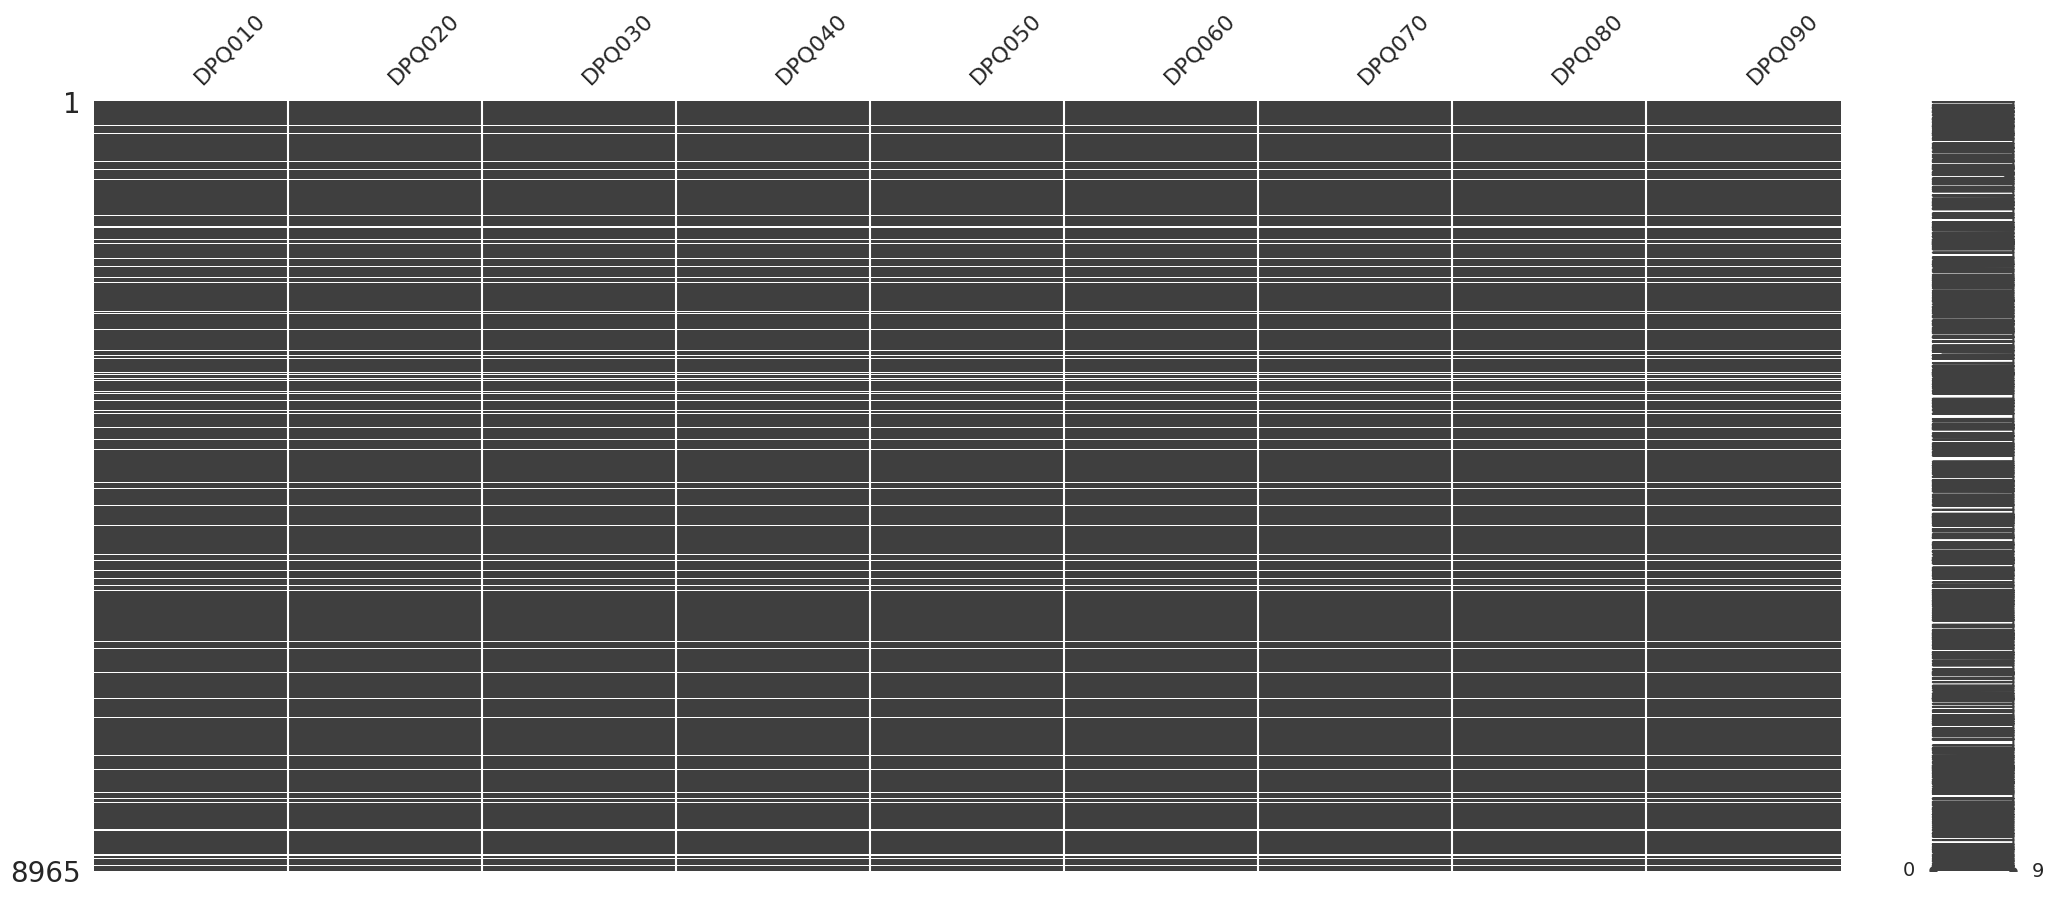

In [27]:
ms.matrix(df_mh);

In [28]:
df_mh.dropna(inplace=True)

In [30]:
df_mh.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
109266,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
109271,2.000,1.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000
109273,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,0.000
109274,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
109282,0.000,1.000,0.000,1.000,0.000,0.000,0.000,3.000,0.000


In [ ]:
func = inspect.getsource(pf.val_counts)
display(Markdown("```python\n"+func+"\n```"))

```python
def val_counts(df):
    '''
    Display value counts for all the columns in a DataFrame.

    Args:
        df (DataFrame): DataFrame to perform .value_counts() on each column. 

    Returns:
        Value counts for each column with some visual cues between columns.
    '''

    for col in df.columns:
        print(f'{col} value counts', '\n')
        display(df[col].value_counts(dropna=False))
        print('--------------------------------------')

```

In [31]:
pf.val_counts(df_mh)

DPQ010 value counts 



DPQ010
0.000    6164
1.000    1371
2.000     449
3.000     309
9.000       5
7.000       4
Name: count, dtype: int64

--------------------------------------
DPQ020 value counts 



DPQ020
0.000    6186
1.000    1455
2.000     387
3.000     268
9.000       4
7.000       2
Name: count, dtype: int64

--------------------------------------
DPQ030 value counts 



DPQ030
0.000    5022
1.000    1890
3.000     763
2.000     620
9.000       4
7.000       3
Name: count, dtype: int64

--------------------------------------
DPQ040 value counts 



DPQ040
0.000    4162
1.000    2682
2.000     754
3.000     696
7.000       4
9.000       4
Name: count, dtype: int64

--------------------------------------
DPQ050 value counts 



DPQ050
0.000    6162
1.000    1293
2.000     464
3.000     377
9.000       4
7.000       2
Name: count, dtype: int64

--------------------------------------
DPQ060 value counts 



DPQ060
0.000    6879
1.000     968
2.000     239
3.000     207
9.000       6
7.000       3
Name: count, dtype: int64

--------------------------------------
DPQ070 value counts 



DPQ070
0.000    6861
1.000     891
3.000     291
2.000     254
9.000       3
7.000       2
Name: count, dtype: int64

--------------------------------------
DPQ080 value counts 



DPQ080
0.000    7421
1.000     530
2.000     196
3.000     148
9.000       5
7.000       2
Name: count, dtype: int64

--------------------------------------
DPQ090 value counts 



DPQ090
0.000    7976
1.000     233
2.000      51
3.000      36
9.000       4
7.000       2
Name: count, dtype: int64

--------------------------------------


In [32]:
df_mh = df_mh[(df_mh != 7) & (df_mh != 9)]

In [33]:
df_mh.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
109266,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
109271,2.000,1.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000
109273,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,0.000
109274,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
109282,0.000,1.000,0.000,1.000,0.000,0.000,0.000,3.000,0.000


In [36]:
df_mh.isna().sum()

DPQ010    9
DPQ020    6
DPQ030    7
DPQ040    8
DPQ050    6
DPQ060    9
DPQ070    5
DPQ080    7
DPQ090    6
dtype: int64

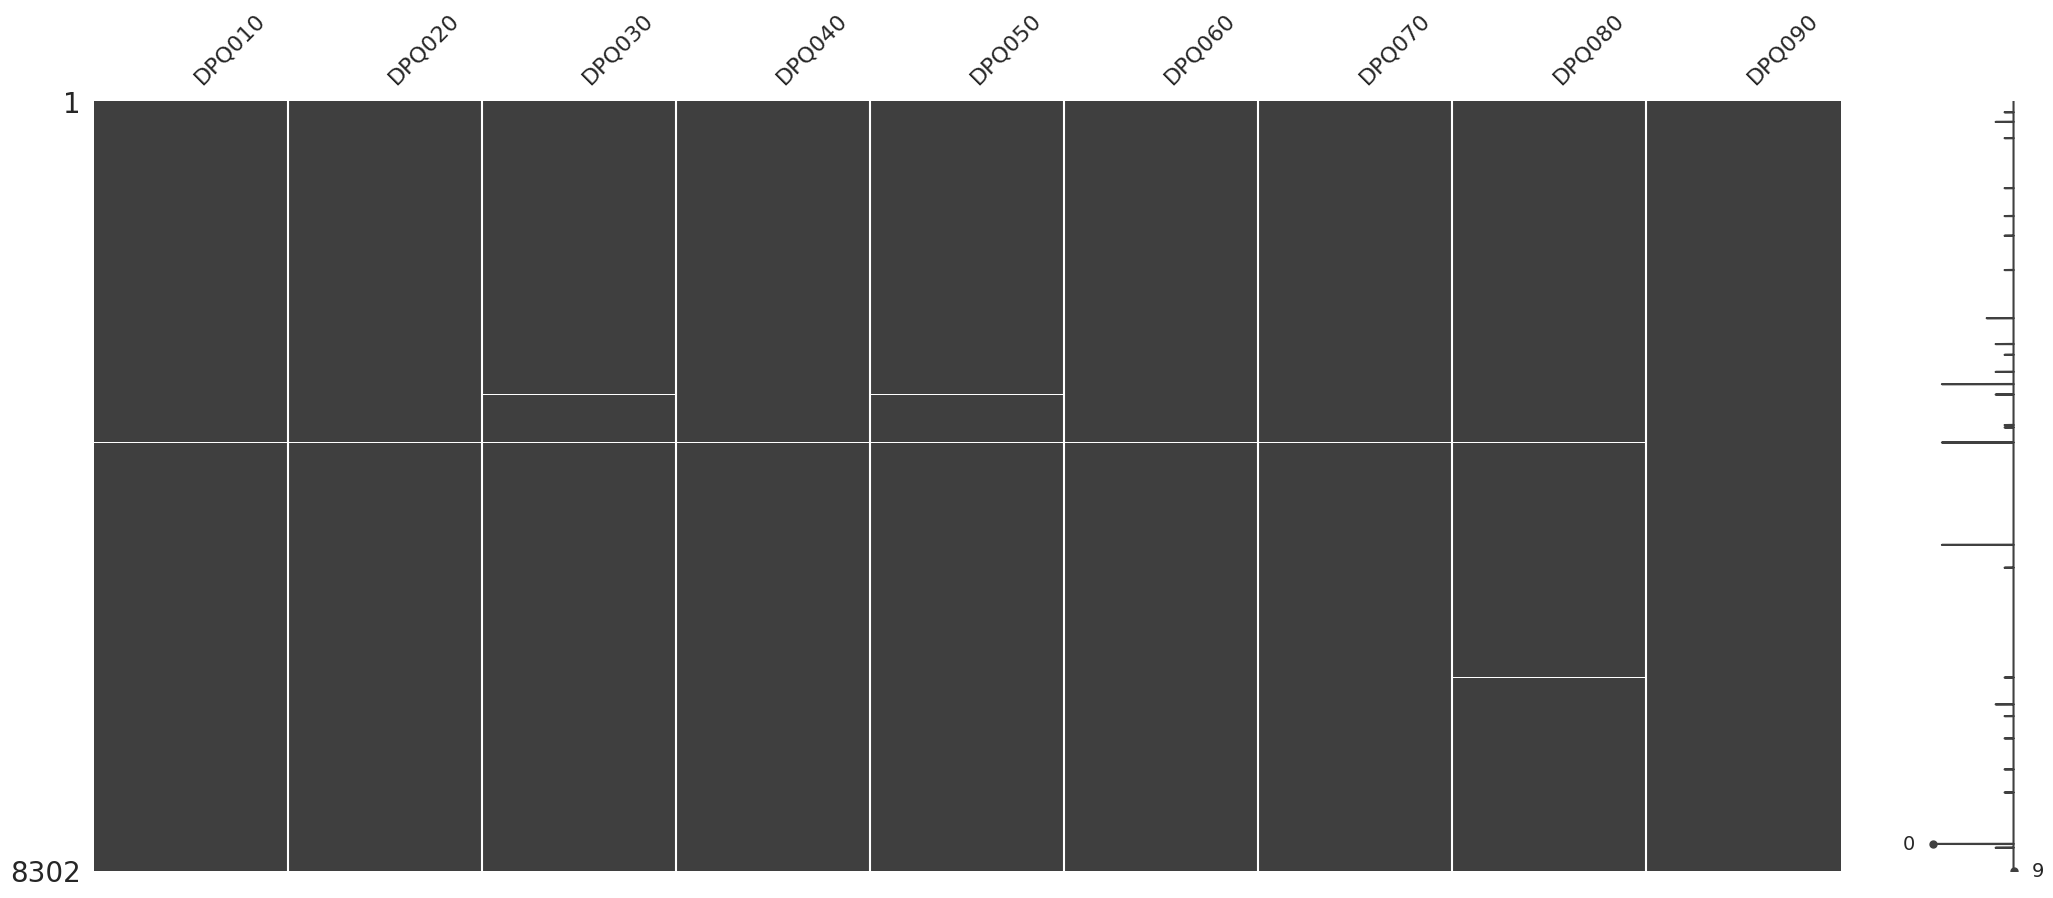

In [37]:
ms.matrix(df_mh);

In [38]:
df_mh.dropna(inplace=True)

In [39]:
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8276 entries, 109266 to 124822
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  8276 non-null   float64
 1   DPQ020  8276 non-null   float64
 2   DPQ030  8276 non-null   float64
 3   DPQ040  8276 non-null   float64
 4   DPQ050  8276 non-null   float64
 5   DPQ060  8276 non-null   float64
 6   DPQ070  8276 non-null   float64
 7   DPQ080  8276 non-null   float64
 8   DPQ090  8276 non-null   float64
dtypes: float64(9)
memory usage: 646.6 KB


In [40]:
df_mh = df_mh.astype('int64')

In [41]:
df_mh.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
109266,0,0,0,0,0,0,0,0,0
109271,2,1,0,0,0,0,2,0,0
109273,2,2,2,2,2,2,2,1,0
109274,0,0,0,0,0,0,0,0,0
109282,0,1,0,1,0,0,0,3,0


In [42]:
df_mh['Total'] = df_mh.sum(axis=1)

In [43]:
df_mh.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Total
SEQN,,,,,,,,,,
109266,0,0,0,0,0,0,0,0,0,0
109271,2,1,0,0,0,0,2,0,0,5
109273,2,2,2,2,2,2,2,1,0,15
109274,0,0,0,0,0,0,0,0,0,0
109282,0,1,0,1,0,0,0,3,0,5


In [44]:
df_mh.Total.value_counts(1)

Total
0    0.333
1    0.133
2    0.115
3    0.089
4    0.068
5    0.049
6    0.039
7    0.030
8    0.028
9    0.022
10   0.019
11   0.015
12   0.011
14   0.008
13   0.008
15   0.006
16   0.005
18   0.005
17   0.004
20   0.002
19   0.002
21   0.002
22   0.002
23   0.001
24   0.001
26   0.000
25   0.000
27   0.000
Name: proportion, dtype: float64

From the information studied at https://pubmed.ncbi.nlm.nih.gov/11556941/

The Patient Health Questionnaire (PHQ) is a self-administered version of the PRIME-MD diagnostic instrument for common mental disorders. The PHQ-9 is the depression module, which scores each of the 9 DSM-IV criteria as "0" (not at all) to "3" (nearly every day).

As PHQ-9 depression severity increased, there was a substantial decrease in functional status on all 6 SF-20 subscales. Also, symptom-related difficulty, sick days, and health care utilization increased. Using the MHP reinterview as the criterion standard, a PHQ-9 score > or =10 had a sensitivity of 88% and a specificity of 88% for major depression.

In [45]:
df_mh['depression'] = df_mh.Total.apply(
    lambda x: 'Not Depressed' if x<10 else 'Depressed')

In [46]:
df_mh.depression.value_counts(1)

depression
Not Depressed   0.907
Depressed       0.093
Name: proportion, dtype: float64

In [47]:
target_clean = pd.DataFrame(df_mh['depression'])
target_clean.head()

,depression
SEQN,
109266,Not Depressed
109271,Not Depressed
109273,Depressed
109274,Not Depressed
109282,Not Depressed


In [48]:
target_clean.depression.value_counts(1)

depression
Not Depressed   0.907
Depressed       0.093
Name: proportion, dtype: float64

# Demographic Data

The Demographic data includes the data like Age, Gender, birth place etc.., which inform the demographics of the individual.

In [209]:
path = r'CDC_Data/Demographics'
df_d = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/Demographics/P_DEMO.XPT']

In [210]:
df_d.head()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDYRUSZ,DMDEDUC2,DMDMARTZ,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109263,66.000,2.000,1.000,2.000,NaN,5.000,6.000,2.000,1.000,NaN,NaN,NaN,NaN,1.000,1.000,2.000,1.000,2.000,2.000,NaN,NaN,NaN,NaN,7891.762,8951.816,3.000,156.000,4.660
109264,66.000,2.000,2.000,13.000,NaN,1.000,1.000,2.000,1.000,NaN,NaN,NaN,NaN,1.000,1.000,2.000,1.000,2.000,2.000,1.000,2.000,2.000,1.000,11689.747,12271.157,1.000,155.000,0.830
109265,66.000,2.000,1.000,2.000,NaN,3.000,3.000,2.000,1.000,NaN,NaN,NaN,NaN,1.000,1.000,2.000,1.000,2.000,2.000,NaN,NaN,NaN,NaN,16273.826,16658.764,1.000,157.000,3.060
109266,66.000,2.000,2.000,29.000,NaN,5.000,6.000,2.000,2.000,2.000,5.000,3.000,2.000,1.000,2.000,2.000,1.000,2.000,2.000,1.000,2.000,2.000,1.000,7825.646,8154.968,2.000,168.000,5.000
109267,66.000,1.000,2.000,21.000,NaN,2.000,2.000,NaN,2.000,3.000,4.000,3.000,3.000,1.000,2.000,2.000,1.000,2.000,2.000,NaN,NaN,NaN,NaN,26379.992,0.000,1.000,156.000,5.000


In [211]:
df_d.columns.sort_values()

Index(['AIALANGA', 'DMDBORN4', 'DMDEDUC2', 'DMDMARTZ', 'DMDYRUSZ', 'FIAINTRP',
       'FIALANG', 'FIAPROXY', 'INDFMPIR', 'MIAINTRP', 'MIALANG', 'MIAPROXY',
       'RIAGENDR', 'RIDAGEMN', 'RIDAGEYR', 'RIDEXMON', 'RIDEXPRG', 'RIDRETH1',
       'RIDRETH3', 'RIDSTATR', 'SDDSRVYR', 'SDMVPSU', 'SDMVSTRA', 'SIAINTRP',
       'SIALANG', 'SIAPROXY', 'WTINTPRP', 'WTMECPRP'],
      dtype='object')

In [220]:
# the below mentioned columns include the data of place of birth, Gender, Ethinicity, some factors which are necessary for the data
demo_to_keep = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDBORN4', 'DMDEDUC2', 'RIDEXPRG']

In [221]:
func = inspect.getsource(pf.cols_tokeep)
display(Markdown("```python\n"+func+"\n```"))

```python
def cols_tokeep(df, col_list):
    '''
    Makes a copy of the passed in DataFrame and drops all columns except those
    specified in a list.
    
    Args:
        df(DataFrame): DataFrame to take specific columns from.
        col_list(list): List of columns in the DataFrame to be kept.
    
    Returns:
        New DataFrame that has only the columns specified from the col_list.
    
    Example:
        new_df = cols_tokeep(old_df, columns_list)
    '''
    df_copy = df.copy()
    for col in df_copy.columns:
        if col not in col_list:
            df_copy.drop(columns=[col], inplace=True)
        else:
            pass
    return df_copy

```

In [222]:
df_d.columns

Index(['SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1',
       'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDYRUSZ', 'DMDEDUC2', 'DMDMARTZ',
       'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY',
       'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'WTINTPRP',
       'WTMECPRP', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR'],
      dtype='object')

In [223]:
demo_clean = df_d[demo_to_keep]

In [225]:
demo_clean.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDBORN4,DMDEDUC2,RIDEXPRG
SEQN,,,,,,
109263,1.000,2.000,5.000,1.000,NaN,NaN
109264,2.000,13.000,1.000,1.000,NaN,NaN
109265,1.000,2.000,3.000,1.000,NaN,NaN
109266,2.000,29.000,5.000,2.000,5.000,2.000
109267,2.000,21.000,2.000,2.000,4.000,3.000


In [226]:
demo_clean.columns.sort_values()

Index(['DMDBORN4', 'DMDEDUC2', 'RIAGENDR', 'RIDAGEYR', 'RIDEXPRG', 'RIDRETH1'], dtype='object')

#### Birth Place

In [227]:
demo_clean.DMDBORN4.value_counts(dropna=False)

DMDBORN4
1.000     12525
2.000      3028
77.000        6
99.000        1
Name: count, dtype: int64

In [228]:
demo_clean.DMDBORN4.fillna(0, inplace=True)

In [229]:
demo_clean['birth_place'] = demo_clean['DMDBORN4']

In [230]:
demo_clean.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDBORN4,DMDEDUC2,RIDEXPRG,birth_place
SEQN,,,,,,,
109263,1.000,2.000,5.000,1.000,NaN,NaN,1.000
109264,2.000,13.000,1.000,1.000,NaN,NaN,1.000
109265,1.000,2.000,3.000,1.000,NaN,NaN,1.000
109266,2.000,29.000,5.000,2.000,5.000,2.000,2.000
109267,2.000,21.000,2.000,2.000,4.000,3.000,2.000


In [231]:
demo_clean.birth_place.value_counts(dropna=False)

birth_place
1.000     12525
2.000      3028
77.000        6
99.000        1
Name: count, dtype: int64

In [232]:
demo_clean.drop(columns=['DMDBORN4'], inplace=True)

#### Gender

In [233]:
demo_clean.RIAGENDR.value_counts(dropna=False)

RIAGENDR
2.000    7839
1.000    7721
Name: count, dtype: int64

In [234]:
demo_clean.RIAGENDR.fillna(0, inplace=True)

In [235]:
demo_clean['Gender'] = demo_clean['RIAGENDR']

In [236]:
demo_clean.Gender.value_counts(dropna=False)

Gender
2.000    7839
1.000    7721
Name: count, dtype: int64

In [237]:
demo_clean.drop(columns=['RIAGENDR'], inplace=True)

#### Age in years

In [238]:
demo_clean.RIDAGEYR.value_counts(dropna=False)

RIDAGEYR
80.000    682
0.000     574
2.000     431
1.000     406
10.000    354
11.000    351
9.000     339
8.000     331
5.000     317
3.000     312
7.000     310
4.000     302
6.000     300
14.000    286
12.000    261
13.000    258
17.000    254
16.000    248
18.000    234
15.000    233
60.000    232
19.000    227
61.000    208
55.000    202
62.000    198
63.000    195
64.000    178
56.000    174
54.000    170
41.000    167
33.000    165
66.000    159
59.000    157
52.000    157
47.000    156
29.000    156
65.000    155
42.000    154
57.000    153
32.000    153
23.000    150
45.000    149
48.000    149
70.000    148
28.000    146
50.000    146
22.000    145
39.000    145
67.000    144
31.000    143
34.000    142
24.000    142
36.000    142
69.000    142
43.000    141
58.000    140
46.000    140
40.000    139
53.000    139
30.000    137
68.000    135
38.000    135
25.000    135
37.000    133
44.000    132
26.000    128
27.000    128
51.000    127
35.000    126
21.000    126
71.000    1

In [239]:
demo_clean.RIDAGEYR.fillna(0, inplace=True)

In [240]:
demo_clean['Age_in_years'] = demo_clean['RIDAGEYR']

In [241]:
demo_clean.Age_in_years.value_counts(dropna=False)

Age_in_years
80.000    682
0.000     574
2.000     431
1.000     406
10.000    354
11.000    351
9.000     339
8.000     331
5.000     317
3.000     312
7.000     310
4.000     302
6.000     300
14.000    286
12.000    261
13.000    258
17.000    254
16.000    248
18.000    234
15.000    233
60.000    232
19.000    227
61.000    208
55.000    202
62.000    198
63.000    195
64.000    178
56.000    174
54.000    170
41.000    167
33.000    165
66.000    159
59.000    157
52.000    157
47.000    156
29.000    156
65.000    155
42.000    154
57.000    153
32.000    153
23.000    150
45.000    149
48.000    149
70.000    148
28.000    146
50.000    146
22.000    145
39.000    145
67.000    144
31.000    143
34.000    142
24.000    142
36.000    142
69.000    142
43.000    141
58.000    140
46.000    140
40.000    139
53.000    139
30.000    137
68.000    135
38.000    135
25.000    135
37.000    133
44.000    132
26.000    128
27.000    128
51.000    127
35.000    126
21.000    126
71.000 

In [242]:
demo_clean.drop(columns=['RIDAGEYR'], inplace=True)

In [243]:
demo_clean.rename(columns={'DMDEDUC2': 'education_level',
                           'RIDEXPRG': 'pregnant',
                           'RIDRETH1': 'race'}, inplace=True)

In [244]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109263 to 124822
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race             15560 non-null  float64
 1   education_level  9232 non-null   float64
 2   pregnant         1874 non-null   float64
 3   birth_place      15560 non-null  float64
 4   Gender           15560 non-null  float64
 5   Age_in_years     15560 non-null  float64
dtypes: float64(6)
memory usage: 850.9 KB


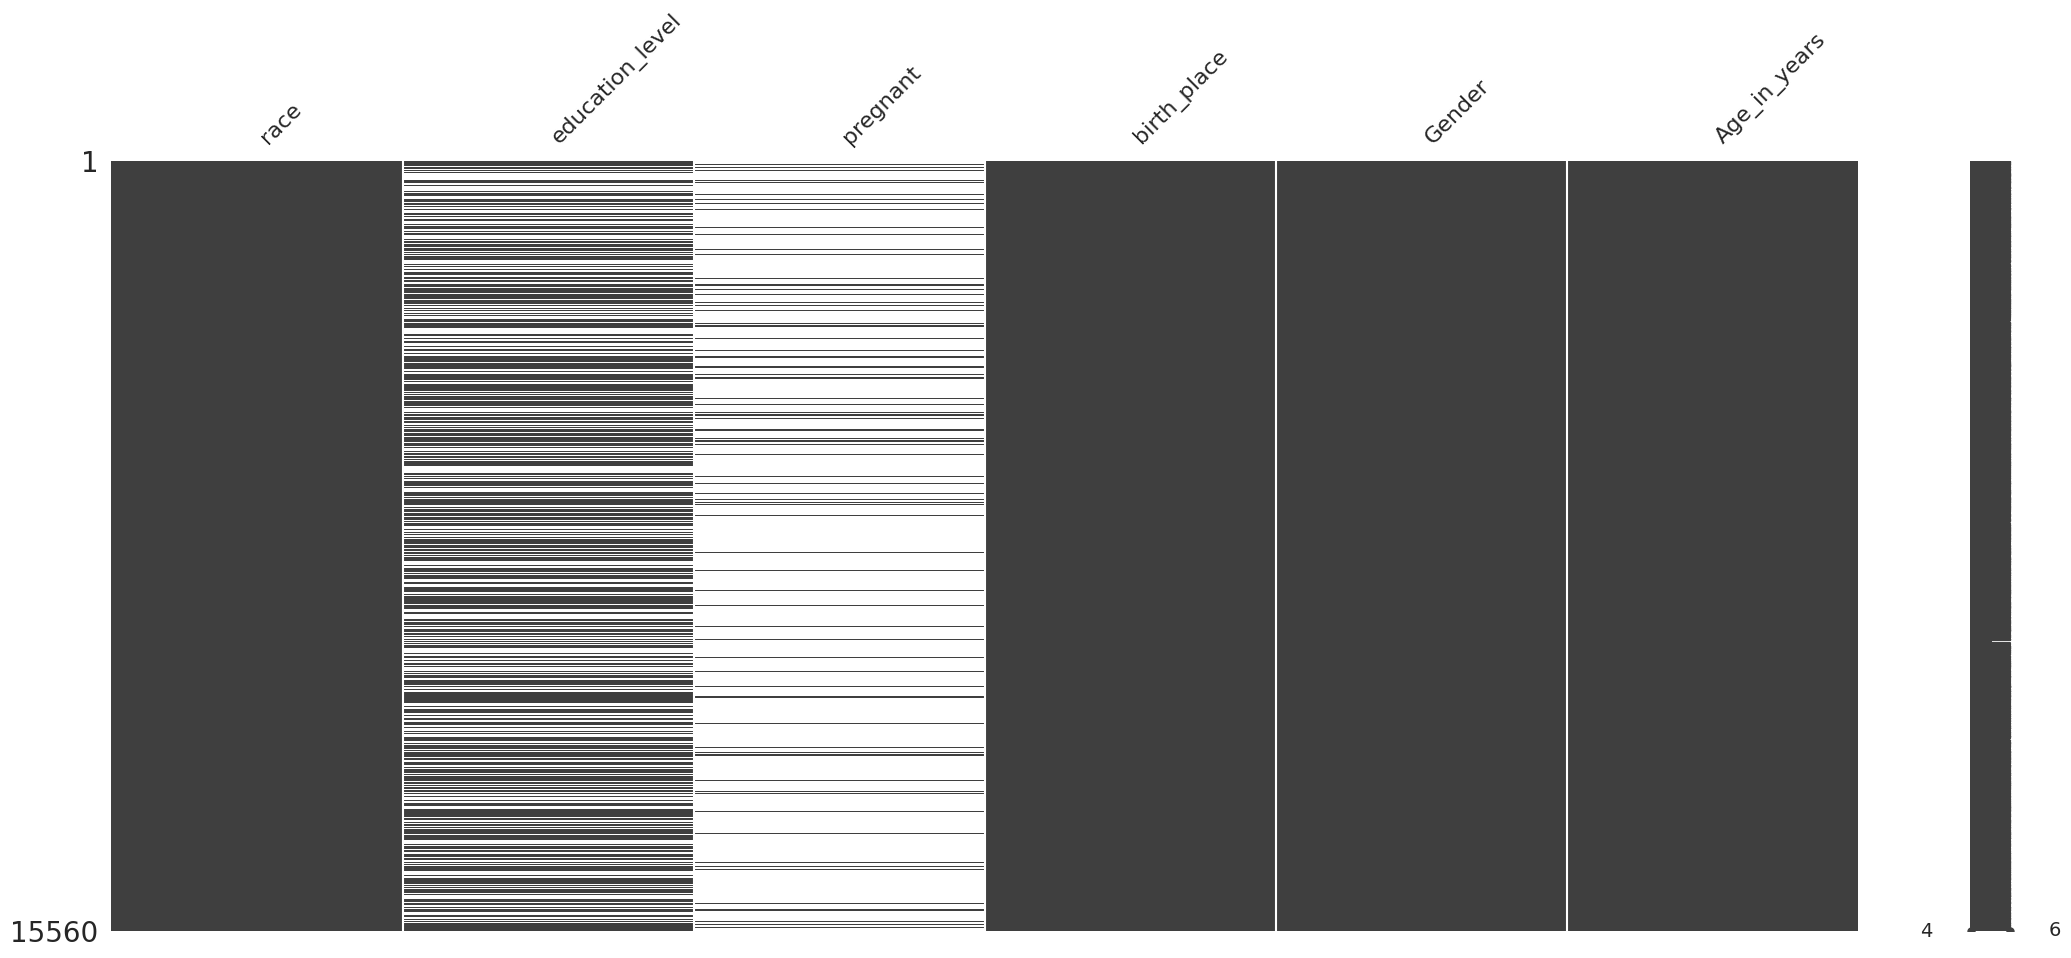

In [245]:
ms.matrix(demo_clean);

In [246]:
pf.val_counts(demo_clean)

race value counts 



race
3.000    5271
4.000    4098
5.000    2657
1.000    1990
2.000    1544
Name: count, dtype: int64

--------------------------------------
education_level value counts 



education_level
NaN      6328
4.000    2975
5.000    2257
3.000    2225
2.000    1041
1.000     719
9.000      13
7.000       2
Name: count, dtype: int64

--------------------------------------
pregnant value counts 



pregnant
NaN      13686
2.000     1604
3.000      183
1.000       87
Name: count, dtype: int64

--------------------------------------
birth_place value counts 



birth_place
1.000     12525
2.000      3028
77.000        6
99.000        1
Name: count, dtype: int64

--------------------------------------
Gender value counts 



Gender
2.000    7839
1.000    7721
Name: count, dtype: int64

--------------------------------------
Age_in_years value counts 



Age_in_years
80.000    682
0.000     574
2.000     431
1.000     406
10.000    354
11.000    351
9.000     339
8.000     331
5.000     317
3.000     312
7.000     310
4.000     302
6.000     300
14.000    286
12.000    261
13.000    258
17.000    254
16.000    248
18.000    234
15.000    233
60.000    232
19.000    227
61.000    208
55.000    202
62.000    198
63.000    195
64.000    178
56.000    174
54.000    170
41.000    167
33.000    165
66.000    159
59.000    157
52.000    157
47.000    156
29.000    156
65.000    155
42.000    154
57.000    153
32.000    153
23.000    150
45.000    149
48.000    149
70.000    148
28.000    146
50.000    146
22.000    145
39.000    145
67.000    144
31.000    143
34.000    142
24.000    142
36.000    142
69.000    142
43.000    141
58.000    140
46.000    140
40.000    139
53.000    139
30.000    137
68.000    135
38.000    135
25.000    135
37.000    133
44.000    132
26.000    128
27.000    128
51.000    127
35.000    126
21.000    126
71.000 

--------------------------------------


In [247]:
demo_clean['Gender'].replace({2.000:1, 1.000:0}, inplace=True)
demo_clean['Gender'] = demo_clean['Gender'].astype('int64')

In [248]:
demo_clean.Gender.value_counts()

Gender
1    7839
0    7721
Name: count, dtype: int64

In [249]:
demo_clean['Age_in_years'] = demo_clean['Age_in_years'].astype('int64')

In [250]:
demo_clean['race'].replace({1.000:'Mexican',
                            2.000:'Other Hispanic',
                            3.000:'White',
                            4.000:'Black',
                            5.000:'Other and Multiracial'},
                           inplace=True)

In [251]:
demo_clean.race.value_counts()

race
White                    5271
Black                    4098
Other and Multiracial    2657
Mexican                  1990
Other Hispanic           1544
Name: count, dtype: int64

In [252]:
demo_clean['education_level'].replace({1.000:'Below 9th',
                                       2.000:'9th to 11th',
                                       3.000:'High School',
                                       4.000:'Some College',
                                       5.000:'College Graduate',
                                       7.000:'Missing',
                                       9.000:'Missing'},
                                      inplace=True)
demo_clean['education_level'].fillna('Missing', inplace=True)

In [253]:
demo_clean.education_level.value_counts(dropna=False)

education_level
Missing             6343
Some College        2975
College Graduate    2257
High School         2225
9th to 11th         1041
Below 9th            719
Name: count, dtype: int64

In [254]:
demo_clean['pregnant'].replace({1.000:'Yes',
                                2.000:'No',
                                3.000:'Missing'},
                                  inplace=True)
demo_clean['pregnant'].fillna('Missing', inplace=True)

In [255]:
demo_clean.pregnant.value_counts(dropna=False)

pregnant
Missing    13869
No          1604
Yes           87
Name: count, dtype: int64

In [256]:
demo_clean['birth_place'].replace({1.000:'USA',
                                   2.000:'Mexico',
                                   3.000:'Elsewhere',
                                   4.000:'Other Spanish Country',
                                   5.000:'Other Non Spanish Country',
                                   7.000:'Missing',
                                   9.000:'Missing',
                                   77.000:'Missing',
                                   99.000:'Missing'},
                                    inplace=True)
demo_clean['birth_place'].fillna('Missing', inplace=True)

In [257]:
demo_clean.birth_place.value_counts(dropna=False)

birth_place
USA        12525
Mexico      3028
Missing        7
Name: count, dtype: int64

In [258]:
demo_clean.isna().sum()

race               0
education_level    0
pregnant           0
birth_place        0
Gender             0
Age_in_years       0
dtype: int64

# Medical Conditions

In [259]:
path = r'CDC_Data/Conditions'
df_med = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/Conditions/P_MCQ.XPT']

In [260]:
df_med.head()

,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCD093,MCQ149,MCQ151,RHD018,MCQ160A,MCQ195,MCQ160B,MCD180B,MCQ160C,MCD180C,MCQ160D,MCD180D,MCQ160E,MCD180E,MCQ160F,MCD180F,MCQ160M,MCQ170M,MCD180M,MCQ160P,MCQ160L,MCQ170L,MCD180L,MCQ500,MCQ510A,MCQ510B,MCQ510C,MCQ510D,MCQ510E,MCQ510F,MCQ520,MCQ530,MCQ540,MCQ550,MCQ560,MCQ570,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ300B,MCQ300C,MCQ300A,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D,OSQ230
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109263,2.000,NaN,NaN,NaN,NaN,2.000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109264,2.000,NaN,NaN,NaN,NaN,NaN,2.000,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109265,2.000,NaN,NaN,NaN,NaN,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109266,2.000,NaN,NaN,NaN,NaN,2.000,2.000,1.000,9.000,NaN,NaN,NaN,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,NaN,2.000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,NaN,NaN,2.000,2.000,NaN,2.000,NaN,NaN,NaN,NaN,2.000,1.000,2.000,2.000,2.000,2.000,1.000,1.000,1.000,1.000,1.000,NaN
109267,2.000,NaN,NaN,NaN,NaN,2.000,2.000,2.000,2.000,NaN,NaN,NaN,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,NaN,2.000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,NaN,NaN,2.000,2.000,NaN,2.000,NaN,NaN,NaN,NaN,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,1.000,2.000,1.000,NaN


In [261]:
list(df_med.columns.sort_values())

['AGQ030',
 'MCD093',
 'MCD180B',
 'MCD180C',
 'MCD180D',
 'MCD180E',
 'MCD180F',
 'MCD180L',
 'MCD180M',
 'MCQ010',
 'MCQ025',
 'MCQ035',
 'MCQ040',
 'MCQ050',
 'MCQ053',
 'MCQ080',
 'MCQ092',
 'MCQ149',
 'MCQ151',
 'MCQ160A',
 'MCQ160B',
 'MCQ160C',
 'MCQ160D',
 'MCQ160E',
 'MCQ160F',
 'MCQ160L',
 'MCQ160M',
 'MCQ160P',
 'MCQ170L',
 'MCQ170M',
 'MCQ195',
 'MCQ220',
 'MCQ230A',
 'MCQ230B',
 'MCQ230C',
 'MCQ230D',
 'MCQ300A',
 'MCQ300B',
 'MCQ300C',
 'MCQ366A',
 'MCQ366B',
 'MCQ366C',
 'MCQ366D',
 'MCQ371A',
 'MCQ371B',
 'MCQ371C',
 'MCQ371D',
 'MCQ500',
 'MCQ510A',
 'MCQ510B',
 'MCQ510C',
 'MCQ510D',
 'MCQ510E',
 'MCQ510F',
 'MCQ520',
 'MCQ530',
 'MCQ540',
 'MCQ550',
 'MCQ560',
 'MCQ570',
 'OSQ230',
 'RHD018']

In [267]:
# the below mentioned are few medical conditions which are clear, understood and necessary for the data
med_to_keep = ['MCQ010', 'MCQ025', 'MCQ035', 'MCQ050', 'AGQ030', 'MCQ053', 'MCQ080',
       'MCQ092', 'MCQ160A', 'MCQ195', 'MCQ160B', 'MCD180B', 'MCQ160C',
       'MCD180C', 'MCQ160D', 'MCD180D', 'MCQ160E', 'MCD180E', 'MCQ160F',
       'MCD180F', 'MCQ160M', 'MCQ170M', 'MCD180M', 'MCQ160L', 'MCQ170L',
       'MCD180L', 'MCQ220', 'MCQ230A', 'MCQ230B', 'MCQ230C', 'MCQ230D',
       'MCQ300B', 'MCQ300C', 'MCQ300A']

len(med_to_keep)

34

In [270]:
med_clean = df_med[med_to_keep]
med_clean.head()

,MCQ010,MCQ025,MCQ035,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ195,MCQ160B,MCD180B,MCQ160C,MCD180C,MCQ160D,MCD180D,MCQ160E,MCD180E,MCQ160F,MCD180F,MCQ160M,MCQ170M,MCD180M,MCQ160L,MCQ170L,MCD180L,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ300B,MCQ300C,MCQ300A
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109263,2.000,NaN,NaN,NaN,2.000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109264,2.000,NaN,NaN,NaN,NaN,2.000,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN
109265,2.000,NaN,NaN,NaN,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109266,2.000,NaN,NaN,NaN,2.000,2.000,1.000,9.000,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,NaN,2.000,NaN,NaN,2.000,NaN,NaN,NaN,NaN,2.000,1.000,2.000
109267,2.000,NaN,NaN,NaN,2.000,2.000,2.000,2.000,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,2.000,NaN,NaN,2.000,NaN,NaN,2.000,NaN,NaN,NaN,NaN,2.000,2.000,2.000


#### Onset Age Columns

In [271]:
col_pairs = [('MCQ160B', 'MCD180B'),
             ('MCQ160C', 'MCD180C'),
             ('MCQ160D', 'MCD180D'),
             ('MCQ160E', 'MCD180E'),
             ('MCQ160F', 'MCD180F'),
             ('MCQ160L', 'MCD180L'),
             ('MCQ160M', 'MCD180M'),
             ('MCQ010', 'MCQ025')]

In [272]:
col_disease = ['heart_failure', 'heart_disease', 'angina',
              'heart_attack', 'stroke', 'thyroid_problem',
              'liver_condition', 'asthma']

In [273]:
disease_dict = dict(zip(col_disease, col_pairs))
disease_dict

{'heart_failure': ('MCQ160B', 'MCD180B'),
 'heart_disease': ('MCQ160C', 'MCD180C'),
 'angina': ('MCQ160D', 'MCD180D'),
 'heart_attack': ('MCQ160E', 'MCD180E'),
 'stroke': ('MCQ160F', 'MCD180F'),
 'thyroid_problem': ('MCQ160L', 'MCD180L'),
 'liver_condition': ('MCQ160M', 'MCD180M'),
 'asthma': ('MCQ010', 'MCQ025')}

In [274]:
for key in disease_dict:

    for item in disease_dict[key]:
        med_clean[item].fillna(0, inplace=True)
        med_clean[item] = med_clean[item].replace(99999, 0)
        med_clean[item] = med_clean[item].replace(77777, 0)

    med_clean[f'{key}_onset'] = med_clean[disease_dict[key][0]] + med_clean[disease_dict[key][1]]
    med_clean[f'{key}_onset'] = med_clean[f'{key}_onset'].astype('int64')
    med_clean.drop(columns=[disease_dict[key][1]],
                       inplace=True)

In [275]:
med_clean.head()

,MCQ010,MCQ035,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ195,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ170M,MCQ160L,MCQ170L,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ300B,MCQ300C,MCQ300A,heart_failure_onset,heart_disease_onset,angina_onset,heart_attack_onset,stroke_onset,thyroid_problem_onset,liver_condition_onset,asthma_onset
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109263,2.000,NaN,NaN,2.000,2.000,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,2
109264,2.000,NaN,NaN,NaN,2.000,NaN,2.000,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,0,0,0,0,0,0,0,2
109265,2.000,NaN,NaN,NaN,2.000,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,2
109266,2.000,NaN,NaN,2.000,2.000,1.000,9.000,2.000,NaN,2.000,2.000,2.000,2.000,2.000,2.000,NaN,2.000,NaN,2.000,NaN,NaN,NaN,NaN,2.000,1.000,2.000,2,2,2,2,2,2,2,2
109267,2.000,NaN,NaN,2.000,2.000,2.000,2.000,2.000,NaN,2.000,2.000,2.000,2.000,2.000,2.000,NaN,2.000,NaN,2.000,NaN,NaN,NaN,NaN,2.000,2.000,2.000,2,2,2,2,2,2,2,2


In [276]:
med_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14986 entries, 109263 to 124822
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MCQ010                 14986 non-null  float64
 1   MCQ035                 2322 non-null   float64
 2   MCQ050                 1423 non-null   float64
 3   AGQ030                 6615 non-null   float64
 4   MCQ053                 14986 non-null  float64
 5   MCQ080                 10195 non-null  float64
 6   MCQ092                 13217 non-null  float64
 7   MCQ160A                9232 non-null   float64
 8   MCQ195                 2812 non-null   float64
 9   MCQ160B                14986 non-null  float64
 10  MCQ160C                14986 non-null  float64
 11  MCQ160D                14986 non-null  float64
 12  MCQ160E                14986 non-null  float64
 13  MCQ160F                14986 non-null  float64
 14  MCQ160M                14986 non-null  float64
 15  M

In [277]:
med_clean.head()

,MCQ010,MCQ035,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ195,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ170M,MCQ160L,MCQ170L,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ300B,MCQ300C,MCQ300A,heart_failure_onset,heart_disease_onset,angina_onset,heart_attack_onset,stroke_onset,thyroid_problem_onset,liver_condition_onset,asthma_onset
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109263,2.000,NaN,NaN,2.000,2.000,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,2
109264,2.000,NaN,NaN,NaN,2.000,NaN,2.000,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,0,0,0,0,0,0,0,2
109265,2.000,NaN,NaN,NaN,2.000,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,2
109266,2.000,NaN,NaN,2.000,2.000,1.000,9.000,2.000,NaN,2.000,2.000,2.000,2.000,2.000,2.000,NaN,2.000,NaN,2.000,NaN,NaN,NaN,NaN,2.000,1.000,2.000,2,2,2,2,2,2,2,2
109267,2.000,NaN,NaN,2.000,2.000,2.000,2.000,2.000,NaN,2.000,2.000,2.000,2.000,2.000,2.000,NaN,2.000,NaN,2.000,NaN,NaN,NaN,NaN,2.000,2.000,2.000,2,2,2,2,2,2,2,2


#### Arthritis

In [278]:
med_clean.head()

,MCQ010,MCQ035,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ195,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ170M,MCQ160L,MCQ170L,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ300B,MCQ300C,MCQ300A,heart_failure_onset,heart_disease_onset,angina_onset,heart_attack_onset,stroke_onset,thyroid_problem_onset,liver_condition_onset,asthma_onset
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109263,2.000,NaN,NaN,2.000,2.000,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,2
109264,2.000,NaN,NaN,NaN,2.000,NaN,2.000,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,0,0,0,0,0,0,0,2
109265,2.000,NaN,NaN,NaN,2.000,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,2
109266,2.000,NaN,NaN,2.000,2.000,1.000,9.000,2.000,NaN,2.000,2.000,2.000,2.000,2.000,2.000,NaN,2.000,NaN,2.000,NaN,NaN,NaN,NaN,2.000,1.000,2.000,2,2,2,2,2,2,2,2
109267,2.000,NaN,NaN,2.000,2.000,2.000,2.000,2.000,NaN,2.000,2.000,2.000,2.000,2.000,2.000,NaN,2.000,NaN,2.000,NaN,NaN,NaN,NaN,2.000,2.000,2.000,2,2,2,2,2,2,2,2


In [279]:
med_clean['MCQ195'].replace({1.000:'Rheumatoid',
                                2.000:'Osteoarthritis',
                                3.000:'Other',
                                7.000:'Missing',
                                9.000:'Missing'},
                               inplace=True)

In [280]:
med_clean['MCQ195'].value_counts(dropna=False)

MCQ195
NaN               12174
Rheumatoid         1182
Missing             695
Osteoarthritis      574
4.0                 316
Other                45
Name: count, dtype: int64

In [281]:
med_clean['MCQ195'].replace({1.000:'Osteoarthritis',
                                2.000:'Rheumatoid',
                                3.000:'Psoriatic',
                                4.000:'Other',
                                7.000:'Missing',
                                9.000:'Missing'},
                               inplace=True)

In [282]:
med_clean['MCQ195'].fillna('', inplace=True)

In [283]:
med_clean['MCQ195'].value_counts(dropna=False)

MCQ195
                  12174
Rheumatoid         1182
Missing             695
Osteoarthritis      574
Other               361
Name: count, dtype: int64

In [284]:
med_clean['arthritis_type'] = med_clean['MCQ195']

In [285]:
med_clean['arthritis_type'].value_counts(dropna=False)

arthritis_type
                  12174
Rheumatoid         1182
Missing             695
Osteoarthritis      574
Other               361
Name: count, dtype: int64

In [286]:
med_clean['arthritis_type'] = med_clean['arthritis_type'].replace('', 'Missing')

In [287]:
med_clean['arthritis_type'].value_counts(dropna=False)

arthritis_type
Missing           12869
Rheumatoid         1182
Osteoarthritis      574
Other               361
Name: count, dtype: int64

In [288]:
med_clean.drop(columns=['MCQ195'], inplace=True)

In [289]:
med_clean.columns

Index(['MCQ010', 'MCQ035', 'MCQ050', 'AGQ030', 'MCQ053', 'MCQ080', 'MCQ092',
       'MCQ160A', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F',
       'MCQ160M', 'MCQ170M', 'MCQ160L', 'MCQ170L', 'MCQ220', 'MCQ230A',
       'MCQ230B', 'MCQ230C', 'MCQ230D', 'MCQ300B', 'MCQ300C', 'MCQ300A',
       'heart_failure_onset', 'heart_disease_onset', 'angina_onset',
       'heart_attack_onset', 'stroke_onset', 'thyroid_problem_onset',
       'liver_condition_onset', 'asthma_onset', 'arthritis_type'],
      dtype='object')

In [290]:
med_clean.rename(columns={'MCQ010': 'asthma',
                              'MCQ025': 'asthma_onset',
                              'MCQ035': 'asthma_currently',
                              'MCQ050': 'asthma_emergency',
                              'MCQ053': 'anemia',
                              'MCQ080': 'ever_overweight',
                              'MCQ092': 'blood_transfusion',
                              'MCQ160A': 'arthritis',
                              'MCQ160B': 'heart_failure',
                              'MCQ160C': 'heart_disease',
                              'MCQ160D': 'angina',
                              'MCQ160E': 'heart_attack',
                              'MCQ160F': 'stroke',
                              'MCQ160G': 'emphysema',
                              'MCQ160K': 'bronchitis',
                              'MCQ160L': 'liver_condition',
                              'MCQ160M': 'thyroid_problem',
                              'MCQ170K': 'bronchitis_currently',
                              'MCQ170L': 'liver_condition_currently',
                              'MCQ170M': 'thyroid_problem_currently',
                              'MCQ220': 'cancer',
                              'MCQ230A': 'first_cancer_type',
                              'MCQ230B': 'second_cancer_type',
                              'MCQ230C': 'third_cancer_type',
                              'MCQ230D': 'fourth_cancer_count',
                              'MCQ300A': 'heart_attack_relative',
                              'MCQ300B': 'asthma_relative',
                              'MCQ300C': 'diabetes_relative',
                              'AGQ030': 'hay_fever'
                              }, inplace=True)

In [291]:
med_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14986 entries, 109263 to 124822
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asthma                     14986 non-null  float64
 1   asthma_currently           2322 non-null   float64
 2   asthma_emergency           1423 non-null   float64
 3   hay_fever                  6615 non-null   float64
 4   anemia                     14986 non-null  float64
 5   ever_overweight            10195 non-null  float64
 6   blood_transfusion          13217 non-null  float64
 7   arthritis                  9232 non-null   float64
 8   heart_failure              14986 non-null  float64
 9   heart_disease              14986 non-null  float64
 10  angina                     14986 non-null  float64
 11  heart_attack               14986 non-null  float64
 12  stroke                     14986 non-null  float64
 13  thyroid_problem            14986 non-null  fl

In [292]:
pf.val_counts(med_clean)

asthma value counts 



asthma
2.000    12647
1.000     2322
9.000       17
Name: count, dtype: int64

--------------------------------------
asthma_currently value counts 



asthma_currently
NaN      12664
1.000     1423
2.000      850
9.000       48
7.000        1
Name: count, dtype: int64

--------------------------------------
asthma_emergency value counts 



asthma_emergency
NaN      13563
2.000     1128
1.000      295
Name: count, dtype: int64

--------------------------------------
hay_fever value counts 



hay_fever
NaN      8371
2.000    5292
1.000    1316
9.000       7
Name: count, dtype: int64

--------------------------------------
anemia value counts 



anemia
2.000    14379
1.000      582
9.000       24
7.000        1
Name: count, dtype: int64

--------------------------------------
ever_overweight value counts 



ever_overweight
2.000    6316
NaN      4791
1.000    3863
9.000      16
Name: count, dtype: int64

--------------------------------------
blood_transfusion value counts 



blood_transfusion
2.000    11968
NaN       1769
1.000     1118
9.000      130
7.000        1
Name: count, dtype: int64

--------------------------------------
arthritis value counts 



arthritis
2.000    6394
NaN      5754
1.000    2812
9.000      26
Name: count, dtype: int64

--------------------------------------
heart_failure value counts 



heart_failure
2.000    8848
0.000    5754
1.000     361
9.000      23
Name: count, dtype: int64

--------------------------------------
heart_disease value counts 



heart_disease
2.000    8781
0.000    5754
1.000     423
9.000      28
Name: count, dtype: int64

--------------------------------------
angina value counts 



angina
2.000    8951
0.000    5754
1.000     240
9.000      41
Name: count, dtype: int64

--------------------------------------
heart_attack value counts 



heart_attack
2.000    8786
0.000    5754
1.000     432
9.000      14
Name: count, dtype: int64

--------------------------------------
stroke value counts 



stroke
2.000    8729
0.000    5754
1.000     487
9.000      16
Name: count, dtype: int64

--------------------------------------
thyroid_problem value counts 



thyroid_problem
2.000    8132
0.000    5754
1.000    1080
9.000      18
7.000       2
Name: count, dtype: int64

--------------------------------------
thyroid_problem_currently value counts 



thyroid_problem_currently
NaN      13906
1.000      810
2.000      229
9.000       40
7.000        1
Name: count, dtype: int64

--------------------------------------
liver_condition value counts 



liver_condition
2.000    8751
0.000    5754
1.000     462
9.000      19
Name: count, dtype: int64

--------------------------------------
liver_condition_currently value counts 



liver_condition_currently
NaN      14524
1.000      240
2.000      171
9.000       51
Name: count, dtype: int64

--------------------------------------
cancer value counts 



cancer
2.000    8222
NaN      5754
1.000    1006
9.000       4
Name: count, dtype: int64

--------------------------------------
first_cancer_type value counts 



first_cancer_type
NaN       13980
30.000      150
14.000      147
32.000      115
25.000       73
33.000       72
16.000       67
39.000       65
15.000       48
38.000       38
23.000       29
37.000       28
19.000       26
99.000       21
10.000       21
24.000       21
28.000       17
21.000       12
17.000        8
35.000        7
12.000        6
26.000        5
29.000        5
31.000        5
13.000        5
36.000        5
22.000        3
20.000        2
11.000        2
77.000        1
18.000        1
34.000        1
Name: count, dtype: int64

--------------------------------------
second_cancer_type value counts 



second_cancer_type
NaN       14871
32.000       13
33.000       12
14.000       11
39.000       11
30.000       10
16.000        7
25.000        6
37.000        6
31.000        5
38.000        4
28.000        4
10.000        4
24.000        4
12.000        3
23.000        2
17.000        2
13.000        2
19.000        2
22.000        2
20.000        1
15.000        1
26.000        1
11.000        1
21.000        1
Name: count, dtype: int64

--------------------------------------
third_cancer_type value counts 



third_cancer_type
NaN       14966
23.000        4
32.000        3
39.000        3
21.000        2
33.000        2
38.000        2
20.000        1
28.000        1
30.000        1
15.000        1
Name: count, dtype: int64

--------------------------------------
fourth_cancer_count value counts 



fourth_cancer_count
NaN       14982
66.000        4
Name: count, dtype: int64

--------------------------------------
asthma_relative value counts 



asthma_relative
2.000    9354
1.000    3619
NaN      1769
9.000     244
Name: count, dtype: int64

--------------------------------------
diabetes_relative value counts 



diabetes_relative
NaN      5754
2.000    4732
1.000    4367
9.000     131
7.000       2
Name: count, dtype: int64

--------------------------------------
heart_attack_relative value counts 



heart_attack_relative
2.000    7829
NaN      5754
1.000    1186
9.000     216
7.000       1
Name: count, dtype: int64

--------------------------------------
heart_failure_onset value counts 



heart_failure_onset
2     8848
0     5754
81      33
9       23
61      19
66      14
56      14
51      13
71      12
64      12
46      10
59      10
41       9
75       8
62       8
70       8
53       8
60       8
73       8
57       7
55       7
48       7
45       7
69       7
43       6
54       6
74       6
31       6
76       5
35       5
67       5
79       5
17       5
36       5
49       5
58       5
1        4
44       4
39       4
72       4
68       4
47       4
63       4
37       4
50       4
77       3
65       3
27       3
80       3
34       3
23       2
29       2
52       1
33       1
22       1
32       1
42       1
78       1
21       1
30       1
28       1
40       1
19       1
38       1
20       1
Name: count, dtype: int64

--------------------------------------
heart_disease_onset value counts 



heart_disease_onset
2     8781
0     5754
9       28
61      25
51      24
56      24
54      21
66      19
71      15
69      14
81      14
60      14
63      14
46      12
58      11
65      10
48      10
59      10
41       9
49       9
77       8
70       8
43       7
1        7
76       7
62       7
64       7
55       7
67       7
72       6
74       6
73       6
17       5
79       5
68       5
75       5
57       5
39       5
53       5
50       4
47       4
38       4
52       4
36       4
42       4
40       3
44       3
31       3
80       3
45       3
37       3
21       2
78       1
33       1
23       1
26       1
34       1
35       1
Name: count, dtype: int64

--------------------------------------
angina_onset value counts 



angina_onset
2     8951
0     5754
9       41
61      17
46      10
56       9
63       8
59       8
41       8
51       8
36       7
66       7
81       7
49       7
58       6
1        6
54       6
71       6
53       5
26       5
48       5
17       5
31       5
43       5
73       5
62       5
45       4
60       4
57       4
47       4
50       4
70       3
24       3
65       3
52       3
75       3
34       3
64       3
21       3
27       3
72       3
38       2
76       2
68       2
35       2
37       2
79       2
39       2
42       2
40       2
55       2
29       1
78       1
44       1
69       1
28       1
30       1
32       1
67       1
74       1
80       1
Name: count, dtype: int64

--------------------------------------
heart_attack_onset value counts 



heart_attack_onset
2     8786
0     5754
81      24
61      21
56      21
66      17
60      14
48      14
9       14
59      13
51      13
54      13
57      12
71      12
63      12
43      11
50      11
49      11
65      11
46      10
62      10
53      10
64      10
69       9
41       9
36       8
55       8
52       7
73       7
76       6
38       6
44       6
40       6
58       6
47       5
42       5
79       4
70       4
34       4
37       4
68       4
1        4
45       4
80       4
74       4
72       4
17       4
27       3
75       3
31       3
39       3
26       3
77       2
30       2
78       2
67       2
33       2
21       1
28       1
35       1
22       1
20       1
Name: count, dtype: int64

--------------------------------------
stroke_onset value counts 



stroke_onset
2     8729
0     5754
81      35
51      21
56      21
66      19
9       16
57      15
54      15
63      15
71      14
46      13
44      13
59      12
76      11
50      11
65      11
53      10
61      10
60      10
49       9
78       9
80       9
68       9
55       9
41       9
62       9
1        8
17       8
74       8
77       7
75       7
43       7
67       7
58       6
70       6
64       6
39       6
48       6
26       5
69       5
35       5
40       5
52       5
37       5
36       5
73       5
79       4
72       4
45       4
28       3
30       3
32       3
47       3
31       3
23       2
18       2
38       2
25       2
22       2
29       2
19       1
24       1
42       1
21       1
20       1
34       1
33       1
Name: count, dtype: int64

--------------------------------------
thyroid_problem_onset value counts 



thyroid_problem_onset
2     8751
0     5754
41      29
17      22
51      22
56      19
9       19
49      18
61      17
36      14
46      13
59      11
55      11
71      10
54       9
63       9
40       9
1        8
60       8
26       8
57       8
23       8
66       8
35       8
47       8
25       7
28       7
43       7
34       7
65       7
53       7
62       7
52       6
29       6
22       6
38       6
31       6
20       5
33       5
21       5
37       5
39       5
81       5
48       5
50       5
69       5
30       5
64       4
67       4
44       4
24       4
58       4
68       3
70       3
19       3
73       3
18       3
27       2
74       2
77       2
42       2
76       2
32       2
78       2
75       2
45       2
80       1
79       1
72       1
Name: count, dtype: int64

--------------------------------------
liver_condition_onset value counts 



liver_condition_onset
2     8132
0     5754
41      57
51      53
17      52
36      36
31      35
56      35
81      35
66      35
61      32
46      32
26      29
29      24
53      23
33      19
71      19
1       18
9       18
63      18
43      17
28      17
35      17
25      16
23      15
76      15
62      14
32      14
48      14
49      14
64      14
39      14
57      14
21      14
60      14
44      14
52      13
59      13
38      13
65      13
34      12
27      12
58      12
50      12
19      12
54      11
37      10
69      10
68      10
30      10
79       9
55       9
22       9
42       9
40       8
75       8
45       8
77       8
24       8
67       7
18       7
73       7
47       6
20       6
78       5
74       5
70       4
80       3
7        2
72       2
Name: count, dtype: int64

--------------------------------------
asthma_onset value counts 



asthma_onset
2     13030
3       167
6       142
4       137
5       120
7       112
9       107
8       101
11       95
13       75
10       59
51       41
31       39
1        38
14       36
12       36
17       32
26       30
41       30
15       27
36       27
16       24
21       24
56       22
46       19
61       19
22       17
18       17
24       16
43       16
38       15
66       15
20       13
29       12
33       11
53       11
81       11
71       11
19       11
30       10
39       10
35       10
57       10
27       10
42        9
65        9
25        9
63        9
23        9
49        9
44        8
34        8
48        7
28        7
55        6
59        6
50        5
32        5
47        5
60        5
69        5
45        4
54        4
76        4
52        3
40        3
78        3
62        3
74        3
64        3
73        3
75        3
68        3
70        2
37        2
77        2
72        2
80        1
58        1
79        1
Name: count, dtype: int64

--------------------------------------
arthritis_type value counts 



arthritis_type
Missing           12869
Rheumatoid         1182
Osteoarthritis      574
Other               361
Name: count, dtype: int64

--------------------------------------


In [293]:
yes_no_cols = ['arthritis', 'heart_failure', 'heart_disease', 'angina',
              'heart_attack', 'stroke',
              'liver_condition', 'thyroid_problem', 'cancer', 'asthma',
              'anemia', 'blood_transfusion', 'heart_attack_relative',
              'asthma_relative', 'diabetes_relative', 'hay_fever',
              'ever_overweight', 'asthma_currently', 'asthma_emergency',
               'liver_condition_currently',
              'thyroid_problem_currently']

In [294]:
for col in yes_no_cols:
    med_clean[col].replace({2.000: 0,
                                 7.000: 0,
                                 9.000: 0},
                                inplace=True)
    med_clean[col].fillna(0, inplace=True)
    med_clean[col] = med_clean[col].astype('int64')

In [295]:
med_clean['asthma_onset'].replace(99999, 0, inplace=True)
med_clean['asthma_onset'].fillna(0, inplace=True)
med_clean['asthma_onset'] = med_clean['asthma_onset'].astype('int64')

In [296]:
med_clean['fourth_cancer_count'].replace(66.000, 1, inplace=True)
med_clean['fourth_cancer_count'].fillna(0, inplace=True)
med_clean['fourth_cancer_count'] = med_clean['fourth_cancer_count'].astype('int64')

In [297]:
pf.val_counts(med_clean)

asthma value counts 



asthma
0    12664
1     2322
Name: count, dtype: int64

--------------------------------------
asthma_currently value counts 



asthma_currently
0    13563
1     1423
Name: count, dtype: int64

--------------------------------------
asthma_emergency value counts 



asthma_emergency
0    14691
1      295
Name: count, dtype: int64

--------------------------------------
hay_fever value counts 



hay_fever
0    13670
1     1316
Name: count, dtype: int64

--------------------------------------
anemia value counts 



anemia
0    14404
1      582
Name: count, dtype: int64

--------------------------------------
ever_overweight value counts 



ever_overweight
0    11123
1     3863
Name: count, dtype: int64

--------------------------------------
blood_transfusion value counts 



blood_transfusion
0    13868
1     1118
Name: count, dtype: int64

--------------------------------------
arthritis value counts 



arthritis
0    12174
1     2812
Name: count, dtype: int64

--------------------------------------
heart_failure value counts 



heart_failure
0    14625
1      361
Name: count, dtype: int64

--------------------------------------
heart_disease value counts 



heart_disease
0    14563
1      423
Name: count, dtype: int64

--------------------------------------
angina value counts 



angina
0    14746
1      240
Name: count, dtype: int64

--------------------------------------
heart_attack value counts 



heart_attack
0    14554
1      432
Name: count, dtype: int64

--------------------------------------
stroke value counts 



stroke
0    14499
1      487
Name: count, dtype: int64

--------------------------------------
thyroid_problem value counts 



thyroid_problem
0    13906
1     1080
Name: count, dtype: int64

--------------------------------------
thyroid_problem_currently value counts 



thyroid_problem_currently
0    14176
1      810
Name: count, dtype: int64

--------------------------------------
liver_condition value counts 



liver_condition
0    14524
1      462
Name: count, dtype: int64

--------------------------------------
liver_condition_currently value counts 



liver_condition_currently
0    14746
1      240
Name: count, dtype: int64

--------------------------------------
cancer value counts 



cancer
0    13980
1     1006
Name: count, dtype: int64

--------------------------------------
first_cancer_type value counts 



first_cancer_type
NaN       13980
30.000      150
14.000      147
32.000      115
25.000       73
33.000       72
16.000       67
39.000       65
15.000       48
38.000       38
23.000       29
37.000       28
19.000       26
99.000       21
10.000       21
24.000       21
28.000       17
21.000       12
17.000        8
35.000        7
12.000        6
26.000        5
29.000        5
31.000        5
13.000        5
36.000        5
22.000        3
20.000        2
11.000        2
77.000        1
18.000        1
34.000        1
Name: count, dtype: int64

--------------------------------------
second_cancer_type value counts 



second_cancer_type
NaN       14871
32.000       13
33.000       12
14.000       11
39.000       11
30.000       10
16.000        7
25.000        6
37.000        6
31.000        5
38.000        4
28.000        4
10.000        4
24.000        4
12.000        3
23.000        2
17.000        2
13.000        2
19.000        2
22.000        2
20.000        1
15.000        1
26.000        1
11.000        1
21.000        1
Name: count, dtype: int64

--------------------------------------
third_cancer_type value counts 



third_cancer_type
NaN       14966
23.000        4
32.000        3
39.000        3
21.000        2
33.000        2
38.000        2
20.000        1
28.000        1
30.000        1
15.000        1
Name: count, dtype: int64

--------------------------------------
fourth_cancer_count value counts 



fourth_cancer_count
0    14982
1        4
Name: count, dtype: int64

--------------------------------------
asthma_relative value counts 



asthma_relative
0    11367
1     3619
Name: count, dtype: int64

--------------------------------------
diabetes_relative value counts 



diabetes_relative
0    10619
1     4367
Name: count, dtype: int64

--------------------------------------
heart_attack_relative value counts 



heart_attack_relative
0    13800
1     1186
Name: count, dtype: int64

--------------------------------------
heart_failure_onset value counts 



heart_failure_onset
2     8848
0     5754
81      33
9       23
61      19
66      14
56      14
51      13
71      12
64      12
46      10
59      10
41       9
75       8
62       8
70       8
53       8
60       8
73       8
57       7
55       7
48       7
45       7
69       7
43       6
54       6
74       6
31       6
76       5
35       5
67       5
79       5
17       5
36       5
49       5
58       5
1        4
44       4
39       4
72       4
68       4
47       4
63       4
37       4
50       4
77       3
65       3
27       3
80       3
34       3
23       2
29       2
52       1
33       1
22       1
32       1
42       1
78       1
21       1
30       1
28       1
40       1
19       1
38       1
20       1
Name: count, dtype: int64

--------------------------------------
heart_disease_onset value counts 



heart_disease_onset
2     8781
0     5754
9       28
61      25
51      24
56      24
54      21
66      19
71      15
69      14
81      14
60      14
63      14
46      12
58      11
65      10
48      10
59      10
41       9
49       9
77       8
70       8
43       7
1        7
76       7
62       7
64       7
55       7
67       7
72       6
74       6
73       6
17       5
79       5
68       5
75       5
57       5
39       5
53       5
50       4
47       4
38       4
52       4
36       4
42       4
40       3
44       3
31       3
80       3
45       3
37       3
21       2
78       1
33       1
23       1
26       1
34       1
35       1
Name: count, dtype: int64

--------------------------------------
angina_onset value counts 



angina_onset
2     8951
0     5754
9       41
61      17
46      10
56       9
63       8
59       8
41       8
51       8
36       7
66       7
81       7
49       7
58       6
1        6
54       6
71       6
53       5
26       5
48       5
17       5
31       5
43       5
73       5
62       5
45       4
60       4
57       4
47       4
50       4
70       3
24       3
65       3
52       3
75       3
34       3
64       3
21       3
27       3
72       3
38       2
76       2
68       2
35       2
37       2
79       2
39       2
42       2
40       2
55       2
29       1
78       1
44       1
69       1
28       1
30       1
32       1
67       1
74       1
80       1
Name: count, dtype: int64

--------------------------------------
heart_attack_onset value counts 



heart_attack_onset
2     8786
0     5754
81      24
61      21
56      21
66      17
60      14
48      14
9       14
59      13
51      13
54      13
57      12
71      12
63      12
43      11
50      11
49      11
65      11
46      10
62      10
53      10
64      10
69       9
41       9
36       8
55       8
52       7
73       7
76       6
38       6
44       6
40       6
58       6
47       5
42       5
79       4
70       4
34       4
37       4
68       4
1        4
45       4
80       4
74       4
72       4
17       4
27       3
75       3
31       3
39       3
26       3
77       2
30       2
78       2
67       2
33       2
21       1
28       1
35       1
22       1
20       1
Name: count, dtype: int64

--------------------------------------
stroke_onset value counts 



stroke_onset
2     8729
0     5754
81      35
51      21
56      21
66      19
9       16
57      15
54      15
63      15
71      14
46      13
44      13
59      12
76      11
50      11
65      11
53      10
61      10
60      10
49       9
78       9
80       9
68       9
55       9
41       9
62       9
1        8
17       8
74       8
77       7
75       7
43       7
67       7
58       6
70       6
64       6
39       6
48       6
26       5
69       5
35       5
40       5
52       5
37       5
36       5
73       5
79       4
72       4
45       4
28       3
30       3
32       3
47       3
31       3
23       2
18       2
38       2
25       2
22       2
29       2
19       1
24       1
42       1
21       1
20       1
34       1
33       1
Name: count, dtype: int64

--------------------------------------
thyroid_problem_onset value counts 



thyroid_problem_onset
2     8751
0     5754
41      29
17      22
51      22
56      19
9       19
49      18
61      17
36      14
46      13
59      11
55      11
71      10
54       9
63       9
40       9
1        8
60       8
26       8
57       8
23       8
66       8
35       8
47       8
25       7
28       7
43       7
34       7
65       7
53       7
62       7
52       6
29       6
22       6
38       6
31       6
20       5
33       5
21       5
37       5
39       5
81       5
48       5
50       5
69       5
30       5
64       4
67       4
44       4
24       4
58       4
68       3
70       3
19       3
73       3
18       3
27       2
74       2
77       2
42       2
76       2
32       2
78       2
75       2
45       2
80       1
79       1
72       1
Name: count, dtype: int64

--------------------------------------
liver_condition_onset value counts 



liver_condition_onset
2     8132
0     5754
41      57
51      53
17      52
36      36
31      35
56      35
81      35
66      35
61      32
46      32
26      29
29      24
53      23
33      19
71      19
1       18
9       18
63      18
43      17
28      17
35      17
25      16
23      15
76      15
62      14
32      14
48      14
49      14
64      14
39      14
57      14
21      14
60      14
44      14
52      13
59      13
38      13
65      13
34      12
27      12
58      12
50      12
19      12
54      11
37      10
69      10
68      10
30      10
79       9
55       9
22       9
42       9
40       8
75       8
45       8
77       8
24       8
67       7
18       7
73       7
47       6
20       6
78       5
74       5
70       4
80       3
7        2
72       2
Name: count, dtype: int64

--------------------------------------
asthma_onset value counts 



asthma_onset
2     13030
3       167
6       142
4       137
5       120
7       112
9       107
8       101
11       95
13       75
10       59
51       41
31       39
1        38
14       36
12       36
17       32
26       30
41       30
15       27
36       27
16       24
21       24
56       22
46       19
61       19
22       17
18       17
24       16
43       16
38       15
66       15
20       13
29       12
33       11
53       11
81       11
71       11
19       11
30       10
39       10
35       10
57       10
27       10
42        9
65        9
25        9
63        9
23        9
49        9
44        8
34        8
48        7
28        7
55        6
59        6
50        5
32        5
47        5
60        5
69        5
45        4
54        4
76        4
52        3
40        3
78        3
62        3
74        3
64        3
73        3
75        3
68        3
70        2
37        2
77        2
72        2
80        1
58        1
79        1
Name: count, dtype: int64

--------------------------------------
arthritis_type value counts 



arthritis_type
Missing           12869
Rheumatoid         1182
Osteoarthritis      574
Other               361
Name: count, dtype: int64

--------------------------------------


#### Cancer Types

In [298]:
cancer_cols= ['first_cancer_type', 'second_cancer_type', 'third_cancer_type']
for col in cancer_cols:
    med_clean[col].fillna('None', inplace=True)

In [299]:
med_clean.isna().sum()

asthma                       0
asthma_currently             0
asthma_emergency             0
hay_fever                    0
anemia                       0
ever_overweight              0
blood_transfusion            0
arthritis                    0
heart_failure                0
heart_disease                0
angina                       0
heart_attack                 0
stroke                       0
thyroid_problem              0
thyroid_problem_currently    0
liver_condition              0
liver_condition_currently    0
cancer                       0
first_cancer_type            0
second_cancer_type           0
third_cancer_type            0
fourth_cancer_count          0
asthma_relative              0
diabetes_relative            0
heart_attack_relative        0
heart_failure_onset          0
heart_disease_onset          0
angina_onset                 0
heart_attack_onset           0
stroke_onset                 0
thyroid_problem_onset        0
liver_condition_onset        0
asthma_o

In [300]:
for col in cancer_cols:
    med_clean[col].replace({10.000: 'Bladder',
                            11.000: 'Blood',
                            12.000: 'Bone',
                            13.000: 'Brain',
                            14.000: 'Breast',
                            15.000: 'Cervical',
                            16.000: 'Colon',
                            17.000: 'Esophageal',
                            18.000: 'Gallbladder',
                            19.000: 'Kidney',
                            20.000: 'Larynx',
                            21.000: 'Leukemia',
                            22.000: 'Liver',
                            23.000: 'Lung',
                            24.000: 'Lymphoma',
                            25.000: 'Melanoma',
                            26.000: 'Mouth',
                            27.000: 'Nervous System',
                            28.000: 'Ovarian',
                            29.000: 'Pancreatic',
                            30.000: 'Prostate',
                            31.000: 'Rectal',
                            32.000: 'Skin Non Melanoma',
                            33.000: 'Skin Other',
                            34.000: 'Soft Tissue',
                            35.000: 'Stomach',
                            36.000: 'Testicular',
                            37.000: 'Thyroid',
                            38.000: 'Uterine',
                            39.000: 'Other',
                            66.000: 'None',
                            77.000: 'None',
                            99.000: 'None',
                            9.000: 'None'
                               },
                               inplace=True)

In [301]:
for col in cancer_cols:
    display(med_clean[col].value_counts(dropna=False))

first_cancer_type
None                 14002
Prostate               150
Breast                 147
Skin Non Melanoma      115
Melanoma                73
Skin Other              72
Colon                   67
Other                   65
Cervical                48
Uterine                 38
Lung                    29
Thyroid                 28
Kidney                  26
Bladder                 21
Lymphoma                21
Ovarian                 17
Leukemia                12
Esophageal               8
Stomach                  7
Bone                     6
Mouth                    5
Pancreatic               5
Rectal                   5
Brain                    5
Testicular               5
Liver                    3
Larynx                   2
Blood                    2
Gallbladder              1
Soft Tissue              1
Name: count, dtype: int64

second_cancer_type
None                 14871
Skin Non Melanoma       13
Skin Other              12
Breast                  11
Other                   11
Prostate                10
Colon                    7
Melanoma                 6
Thyroid                  6
Rectal                   5
Uterine                  4
Ovarian                  4
Bladder                  4
Lymphoma                 4
Bone                     3
Lung                     2
Esophageal               2
Brain                    2
Kidney                   2
Liver                    2
Larynx                   1
Cervical                 1
Mouth                    1
Blood                    1
Leukemia                 1
Name: count, dtype: int64

third_cancer_type
None                 14966
Lung                     4
Skin Non Melanoma        3
Other                    3
Leukemia                 2
Skin Other               2
Uterine                  2
Larynx                   1
Ovarian                  1
Prostate                 1
Cervical                 1
Name: count, dtype: int64

In [302]:
func = inspect.getsource(pf.first_cancer_count)
display(Markdown("```python\n"+func+"\n```"))

```python
def first_cancer_count(x):
    '''
    Function for creating a new column that is a count from the first cancer
    information of people that have had a first cancer.
    
    Args:
        x(row in DataFrame): Pass over each entry in DataFrame to count if a
            first cancer is recorded.
        
    Returns:
        1 if information of a first cancer exists and 0 if it does not.
    
    Example:
        df.apply(first_cancer_count, axis=1)
    '''

    if x['first_cancer_type'] != 'None':
        return 1
    else:
        return 0

```

In [303]:
med_clean['first_cancer_count'] = med_clean.apply(pf.first_cancer_count, axis=1)
med_clean['second_cancer_count'] = med_clean.apply(pf.second_cancer_count, axis=1)
med_clean['third_cancer_count'] = med_clean.apply(pf.third_cancer_count, axis=1)

In [304]:
med_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14986 entries, 109263 to 124822
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   asthma                     14986 non-null  int64 
 1   asthma_currently           14986 non-null  int64 
 2   asthma_emergency           14986 non-null  int64 
 3   hay_fever                  14986 non-null  int64 
 4   anemia                     14986 non-null  int64 
 5   ever_overweight            14986 non-null  int64 
 6   blood_transfusion          14986 non-null  int64 
 7   arthritis                  14986 non-null  int64 
 8   heart_failure              14986 non-null  int64 
 9   heart_disease              14986 non-null  int64 
 10  angina                     14986 non-null  int64 
 11  heart_attack               14986 non-null  int64 
 12  stroke                     14986 non-null  int64 
 13  thyroid_problem            14986 non-null  int64 
 14  thyro

In [305]:
med_clean.first_cancer_count.value_counts(dropna=False)

first_cancer_count
0    14002
1      984
Name: count, dtype: int64

In [306]:
med_clean.second_cancer_count.value_counts(dropna=False)

second_cancer_count
0    14871
1      115
Name: count, dtype: int64

In [307]:
med_clean.third_cancer_count.value_counts(dropna=False)

third_cancer_count
0    14966
1       20
Name: count, dtype: int64

In [308]:
med_clean.head()

,asthma,asthma_currently,asthma_emergency,hay_fever,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,angina,heart_attack,stroke,thyroid_problem,thyroid_problem_currently,liver_condition,liver_condition_currently,cancer,first_cancer_type,second_cancer_type,third_cancer_type,fourth_cancer_count,asthma_relative,diabetes_relative,heart_attack_relative,heart_failure_onset,heart_disease_onset,angina_onset,heart_attack_onset,stroke_onset,thyroid_problem_onset,liver_condition_onset,asthma_onset,arthritis_type,first_cancer_count,second_cancer_count,third_cancer_count
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,0,0,0,0,0,0,0,0,0,0,0,2,Missing,0,0,0
109264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,0,1,0,0,0,0,0,0,0,0,0,2,Missing,0,0,0
109265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,0,0,0,0,0,0,0,0,0,0,0,2,Missing,0,0,0
109266,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,0,0,1,0,2,2,2,2,2,2,2,2,Missing,0,0,0
109267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,0,0,0,0,2,2,2,2,2,2,2,2,Missing,0,0,0


#### Body Measures

In [309]:
path = r'CDC_Data/BodyMeasures'
df_bm = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/BodyMeasures/P_BMX.XPT']

In [310]:
df_bm.head()

,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
SEQN,,,,,,,,,,,,,,,,,,,,,
109263,4.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109264,1.000,42.200,NaN,NaN,NaN,NaN,NaN,154.700,NaN,17.600,2.000,36.300,NaN,33.800,NaN,22.700,NaN,63.800,NaN,85.000,NaN
109265,1.000,12.000,NaN,91.600,NaN,NaN,NaN,89.300,NaN,15.000,2.000,NaN,NaN,18.600,NaN,14.800,NaN,41.200,NaN,NaN,NaN
109266,1.000,97.100,NaN,NaN,NaN,NaN,NaN,160.200,NaN,37.800,NaN,40.800,NaN,34.700,NaN,35.800,NaN,117.900,NaN,126.100,NaN
109269,3.000,13.600,NaN,90.900,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,1.000,NaN,1.000,NaN,1.000,NaN,NaN


In [144]:
list(df_bm.columns.sort_values())

['BMDBMIC',
 'BMDSTATS',
 'BMIARMC',
 'BMIARML',
 'BMIHEAD',
 'BMIHIP',
 'BMIHT',
 'BMILEG',
 'BMIRECUM',
 'BMIWAIST',
 'BMIWT',
 'BMXARMC',
 'BMXARML',
 'BMXBMI',
 'BMXHEAD',
 'BMXHIP',
 'BMXHT',
 'BMXLEG',
 'BMXRECUM',
 'BMXWAIST',
 'BMXWT']

In [311]:
body_to_keep = ['BMXBMI', 'BMXHT', 'BMXWT']
body_clean = df_bm[body_to_keep]

In [312]:
body_clean.head()

,BMXBMI,BMXHT,BMXWT
SEQN,,,
109263,NaN,NaN,NaN
109264,17.600,154.700,42.200
109265,15.000,89.300,12.000
109266,37.800,160.200,97.100
109269,NaN,NaN,13.600


In [313]:
body_clean.rename(columns={'BMXWT': 'weight',
                           'BMXHT': 'height',
                           'BMXBMI': 'BMI',
                          }, inplace=True)

In [314]:
body_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14300 entries, 109263 to 124822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMI     13137 non-null  float64
 1   height  13157 non-null  float64
 2   weight  14075 non-null  float64
dtypes: float64(3)
memory usage: 446.9 KB


In [315]:
pf.val_counts(body_clean)

BMI value counts 



BMI
NaN       1163
26.100      86
24.300      83
25.200      82
29.100      77
23.900      76
16.100      76
27.900      74
25.500      74
16.400      73
26.400      73
25.800      73
22.300      72
16.700      72
24.600      71
29.000      71
25.600      71
16.200      71
26.600      70
27.800      70
15.900      70
29.900      69
25.100      69
23.800      69
26.800      68
24.700      68
24.500      68
26.200      67
16.500      67
24.000      67
25.000      67
28.900      66
26.500      66
28.700      66
28.000      66
15.700      66
27.700      65
20.400      65
21.700      65
28.200      65
29.400      65
28.300      64
25.300      64
16.300      64
21.900      64
23.700      64
17.400      64
26.300      64
28.100      64
28.600      63
24.200      63
27.400      63
27.100      63
27.300      63
26.900      62
21.800      62
27.000      62
15.600      61
19.000      61
15.400      61
23.200      61
24.100      61
23.500      61
28.500      60
22.400      60
23.600      60
23.100

--------------------------------------
height value counts 



height
NaN        1143
161.400      51
165.300      51
164.600      47
168.700      47
163.200      47
163.800      47
165.900      46
159.100      46
159.200      46
166.300      45
161.800      45
161.100      45
163.500      45
164.000      45
166.000      45
171.300      44
162.100      44
167.400      44
164.800      44
157.500      44
160.800      44
172.600      44
168.400      44
159.600      44
165.100      43
157.800      43
165.500      43
160.300      43
162.000      43
171.900      42
164.900      42
159.400      41
165.200      41
166.800      41
166.400      41
166.900      41
168.500      41
168.000      41
165.000      41
155.000      40
160.400      40
165.600      40
163.600      40
172.300      40
160.200      40
158.200      40
162.800      40
163.900      39
170.900      39
168.300      39
171.400      39
160.700      39
164.500      39
160.600      39
169.000      38
170.600      38
156.500      38
173.800      38
163.400      38
157.400      38
167.800      37
1

--------------------------------------
weight value counts 



weight
NaN        225
75.800      32
65.100      31
74.600      30
71.700      29
81.600      29
66.500      29
70.400      28
58.700      28
67.000      27
71.000      27
57.700      27
68.200      27
65.700      26
73.100      26
70.100      26
79.100      26
76.900      26
71.400      26
73.300      26
75.000      25
67.700      25
61.500      25
70.600      25
71.100      25
69.300      25
70.900      25
84.100      25
67.900      25
80.000      25
78.700      25
84.700      25
78.200      25
77.300      25
74.700      24
79.700      24
86.400      24
64.900      24
74.500      24
75.900      24
84.600      24
68.600      23
68.700      23
69.200      23
79.300      23
78.600      23
14.400      23
57.500      23
69.400      23
66.900      23
73.200      23
72.500      23
73.500      23
83.000      23
77.000      23
63.500      23
62.700      23
70.200      23
79.500      23
76.700      23
70.300      22
68.900      22
59.500      22
77.400      22
75.400      22
69.000      22
71.

--------------------------------------


In [316]:
for col in body_clean.columns:
    body_clean.fillna(0, inplace=True)

In [317]:
body_clean.head()

,BMI,height,weight
SEQN,,,
109263,0.000,0.000,0.000
109264,17.600,154.700,42.200
109265,15.000,89.300,12.000
109266,37.800,160.200,97.100
109269,0.000,0.000,13.600


#### Blood Pressure

In [318]:
path = r'CDC_Data/BloodPressure'
df_bp = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/BloodPressure/P_BPXO.XPT']

In [319]:
df_bp.head()

,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
SEQN,,,,,,,,,,,
109264,b'R',3.000,109.000,67.000,109.000,68.000,106.000,66.000,94.000,95.000,91.000
109266,b'R',4.000,99.000,56.000,99.000,55.000,99.000,52.000,68.000,66.000,66.000
109270,b'R',3.000,123.000,73.000,124.000,77.000,127.000,70.000,95.000,98.000,93.000
109271,b'R',4.000,102.000,65.000,108.000,68.000,111.000,68.000,73.000,71.000,70.000
109273,b'R',3.000,116.000,68.000,110.000,66.000,115.000,68.000,71.000,70.000,70.000


In [320]:
list(df_bp.columns.sort_values())

['BPAOARM',
 'BPAOCSZ',
 'BPXODI1',
 'BPXODI2',
 'BPXODI3',
 'BPXOPLS1',
 'BPXOPLS2',
 'BPXOPLS3',
 'BPXOSY1',
 'BPXOSY2',
 'BPXOSY3']

In [321]:
bp_to_keep = ['BPXOPLS1', 'BPXODI1', 'BPXOSY1']
bp_clean = df_bp[bp_to_keep]

In [322]:
bp_clean.head()

,BPXOPLS1,BPXODI1,BPXOSY1
SEQN,,,
109264,94.000,67.000,109.000
109266,68.000,56.000,99.000
109270,95.000,73.000,123.000
109271,73.000,65.000,102.000
109273,71.000,68.000,116.000


In [323]:
bp_clean.rename(columns={'BPXOPLS1': 'pulse',
                           'BPXOSY1': 'systolic',
                           'BPXODI1': 'diastolic'
                            }, inplace=True)

In [324]:
bp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11656 entries, 109264 to 124822
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pulse      9471 non-null   float64
 1   diastolic  10352 non-null  float64
 2   systolic   10352 non-null  float64
dtypes: float64(3)
memory usage: 364.2 KB


In [325]:
pf.val_counts(bp_clean)

pulse value counts 



pulse
NaN        2185
66.000      353
70.000      325
73.000      321
69.000      317
72.000      316
67.000      312
64.000      312
68.000      296
71.000      285
63.000      282
65.000      278
76.000      275
74.000      270
61.000      259
75.000      253
62.000      246
59.000      241
77.000      240
60.000      238
80.000      220
78.000      218
81.000      204
58.000      200
57.000      199
56.000      191
79.000      187
83.000      178
85.000      178
82.000      174
55.000      154
84.000      137
87.000      133
86.000      120
54.000      116
88.000      106
53.000      102
52.000      101
91.000       90
89.000       90
92.000       82
90.000       81
50.000       73
51.000       67
94.000       53
49.000       52
93.000       48
95.000       48
96.000       44
48.000       41
98.000       38
97.000       34
99.000       25
102.000      21
47.000       21
100.000      20
45.000       19
103.000      17
46.000       17
101.000      13
104.000      12
106.000      12
10

--------------------------------------
diastolic value counts 



diastolic
NaN        1304
72.000      364
70.000      361
73.000      349
65.000      342
68.000      340
66.000      338
69.000      338
64.000      334
67.000      329
75.000      319
74.000      302
71.000      289
77.000      287
63.000      285
62.000      274
78.000      270
60.000      266
59.000      259
76.000      259
61.000      258
80.000      252
79.000      234
81.000      222
82.000      219
57.000      200
58.000      195
83.000      189
84.000      179
56.000      174
86.000      172
85.000      160
55.000      156
87.000      149
89.000      124
88.000      114
54.000      110
52.000      101
90.000       98
91.000       94
53.000       92
92.000       76
94.000       70
50.000       64
93.000       63
96.000       57
51.000       53
98.000       52
95.000       47
97.000       42
99.000       37
49.000       36
101.000      33
47.000       29
48.000       29
100.000      22
103.000      18
105.000      18
102.000      18
106.000      17
46.000       17
45.000       1

--------------------------------------
systolic value counts 



systolic
NaN        1304
107.000     270
112.000     267
110.000     266
106.000     258
115.000     253
119.000     246
109.000     243
116.000     238
111.000     232
104.000     232
108.000     230
113.000     229
118.000     227
114.000     221
103.000     216
105.000     211
117.000     208
121.000     203
123.000     200
100.000     195
122.000     190
126.000     189
101.000     189
102.000     178
120.000     175
129.000     174
125.000     168
124.000     164
99.000      158
128.000     154
127.000     148
130.000     146
131.000     146
98.000      143
97.000      137
96.000      135
132.000     124
135.000     122
133.000     122
136.000     111
94.000      104
138.000      96
137.000      94
95.000       94
134.000      93
139.000      91
145.000      86
141.000      85
93.000       82
142.000      78
144.000      76
92.000       75
140.000      75
143.000      70
146.000      65
91.000       63
147.000      59
150.000      58
151.000      57
90.000       56
148.000      54

--------------------------------------


In [326]:
bp_clean['pulse'].fillna(0, inplace=True)
bp_clean['pulse'] = bp_clean['pulse'].astype('int64')

In [327]:
bp_clean['systolic'].fillna(0, inplace=True)
bp_clean['systolic'] = bp_clean['systolic'].astype('int64')

In [328]:
bp_clean['diastolic'].fillna(0, inplace=True)
bp_clean['diastolic'] = bp_clean['diastolic'].astype('int64')

In [329]:
pf.val_counts(bp_clean)

pulse value counts 



pulse
0      2185
66      353
70      325
73      321
69      317
72      316
67      312
64      312
68      296
71      285
63      282
65      278
76      275
74      270
61      259
75      253
62      246
59      241
77      240
60      238
80      220
78      218
81      204
58      200
57      199
56      191
79      187
83      178
85      178
82      174
55      154
84      137
87      133
86      120
54      116
88      106
53      102
52      101
91       90
89       90
92       82
90       81
50       73
51       67
94       53
49       52
93       48
95       48
96       44
48       41
98       38
97       34
99       25
102      21
47       21
100      20
45       19
103      17
46       17
101      13
104      12
106      12
105      11
107       9
42        8
109       8
44        8
43        7
110       7
114       6
115       5
111       5
108       4
41        4
126       3
112       3
116       3
36        3
40        2
118       2
117       2
38        2
113       

--------------------------------------
diastolic value counts 



diastolic
0      1304
72      364
70      361
73      349
65      342
68      340
66      338
69      338
64      334
67      329
75      319
74      302
71      289
77      287
63      285
62      274
78      270
60      266
59      259
76      259
61      258
80      252
79      234
81      222
82      219
57      200
58      195
83      189
84      179
56      174
86      172
85      160
55      156
87      149
89      124
88      114
54      110
52      101
90       98
91       94
53       92
92       76
94       70
50       64
93       63
96       57
51       53
98       52
95       47
97       42
99       37
49       36
101      33
47       29
48       29
100      22
103      18
105      18
102      18
106      17
46       17
45       14
104      13
109      13
44       12
107      12
108       8
115       7
43        7
110       6
112       5
113       4
114       4
122       4
111       4
37        4
116       3
121       3
42        3
124       3
119       3
126       2
117   

--------------------------------------
systolic value counts 



systolic
0      1304
107     270
112     267
110     266
106     258
115     253
119     246
109     243
116     238
111     232
104     232
108     230
113     229
118     227
114     221
103     216
105     211
117     208
121     203
123     200
100     195
122     190
126     189
101     189
102     178
120     175
129     174
125     168
124     164
99      158
128     154
127     148
130     146
131     146
98      143
97      137
96      135
132     124
135     122
133     122
136     111
94      104
138      96
137      94
95       94
134      93
139      91
145      86
141      85
93       82
142      78
144      76
92       75
140      75
143      70
146      65
91       63
147      59
150      58
151      57
90       56
148      54
149      52
156      44
159      44
154      41
152      40
155      37
160      37
153      36
88       34
158      33
89       32
163      30
161      30
86       28
157      26
165      25
166      25
164      23
169      19
168      19
87     

--------------------------------------


In [330]:
bp_clean.head()

,pulse,diastolic,systolic
SEQN,,,
109264,94,67,109
109266,68,56,99
109270,95,73,123
109271,73,65,102
109273,71,68,116


#### Cholesterol

In [331]:
path = r'CDC_Data/Cholesterol/Total'
df_totchol = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/Cholesterol/Total/P_TCHOL.XPT']

In [332]:
df_totchol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12198 entries, 109264 to 124822
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LBXTC    10828 non-null  float64
 1   LBDTCSI  10828 non-null  float64
dtypes: float64(2)
memory usage: 285.9 KB


In [333]:
df_totchol.head()

,LBXTC,LBDTCSI
SEQN,,
109264,166.000,4.290
109266,195.000,5.040
109270,103.000,2.660
109271,147.000,3.800
109273,164.000,4.240


In [334]:
path = r'CDC_Data/Cholesterol/HDL'
df_hdlchol = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/Cholesterol/HDL/P_HDL.XPT']

In [335]:
df_hdlchol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12198 entries, 109264 to 124822
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBDHDD    10828 non-null  float64
 1   LBDHDDSI  10828 non-null  float64
dtypes: float64(2)
memory usage: 285.9 KB


In [336]:
df_hdlchol.head()

,LBDHDD,LBDHDDSI
SEQN,,
109264,72.000,1.860
109266,56.000,1.450
109270,47.000,1.220
109271,33.000,0.850
109273,42.000,1.090


In [337]:
path = r'CDC_Data/Cholesterol/LDL'
df_ldlchol = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/Cholesterol/LDL/P_TRIGLY.XPT']

In [338]:
df_ldlchol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5090 entries, 109264 to 124822
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WTSAFPRP  5090 non-null   float64
 1   LBXTR     4650 non-null   float64
 2   LBDTRSI   4650 non-null   float64
 3   LBDLDL    4617 non-null   float64
 4   LBDLDLSI  4617 non-null   float64
 5   LBDLDLM   4617 non-null   float64
 6   LBDLDMSI  4617 non-null   float64
 7   LBDLDLN   4642 non-null   float64
 8   LBDLDNSI  4642 non-null   float64
dtypes: float64(9)
memory usage: 397.7 KB


In [339]:
df_ldlchol.head()

,WTSAFPRP,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI
SEQN,,,,,,,,,
109264,27533.175,40.000,0.452,86.000,2.224,82.000,2.121,85.000,2.198
109271,18100.965,84.000,0.948,97.000,2.508,96.000,2.483,98.000,2.534
109274,16281.758,133.000,1.502,49.000,1.267,54.000,1.396,52.000,1.345
109277,32230.046,24.000,0.271,64.000,1.655,62.000,1.603,61.000,1.577
109282,79007.101,132.000,1.490,164.000,4.241,163.000,4.215,166.000,4.293


In [340]:
df_chol = pd.concat([df_totchol, df_hdlchol, df_ldlchol], axis=1)

In [341]:
df_chol.head()

,LBXTC,LBDTCSI,LBDHDD,LBDHDDSI,WTSAFPRP,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI
SEQN,,,,,,,,,,,,,
109264,166.000,4.290,72.000,1.860,27533.175,40.000,0.452,86.000,2.224,82.000,2.121,85.000,2.198
109266,195.000,5.040,56.000,1.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109270,103.000,2.660,47.000,1.220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109271,147.000,3.800,33.000,0.850,18100.965,84.000,0.948,97.000,2.508,96.000,2.483,98.000,2.534
109273,164.000,4.240,42.000,1.090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
df_chol.columns

Index(['LBXTC', 'LBDTCSI', 'LBDHDD', 'LBDHDDSI', 'WTSAFPRP', 'LBXTR',
       'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBDLDLM', 'LBDLDMSI', 'LBDLDLN',
       'LBDLDNSI'],
      dtype='object')

In [343]:
chol_to_keep = ['LBXTC', 'LBDHDD', 'LBXTR', 'LBDLDL']
chol_clean = df_chol[chol_to_keep]

In [344]:
chol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12198 entries, 109264 to 124822
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LBXTC   10828 non-null  float64
 1   LBDHDD  10828 non-null  float64
 2   LBXTR   4650 non-null   float64
 3   LBDLDL  4617 non-null   float64
dtypes: float64(4)
memory usage: 476.5 KB


In [345]:
chol_clean.rename(columns={'LBXTC': 'total_cholesterol',
                           'LBDHDD': 'HDL',
                           'LBXTR': 'triglyceride',
                           'LBDLDL': 'LDL'
                            }, inplace=True)

In [346]:
chol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12198 entries, 109264 to 124822
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_cholesterol  10828 non-null  float64
 1   HDL                10828 non-null  float64
 2   triglyceride       4650 non-null   float64
 3   LDL                4617 non-null   float64
dtypes: float64(4)
memory usage: 476.5 KB


In [347]:
pf.val_counts(chol_clean)

total_cholesterol value counts 



total_cholesterol
NaN        1370
164.000     144
155.000     134
169.000     129
172.000     125
162.000     125
157.000     120
180.000     120
150.000     120
161.000     120
152.000     119
174.000     119
146.000     114
151.000     114
184.000     113
148.000     113
166.000     113
179.000     113
167.000     113
160.000     111
176.000     110
153.000     110
165.000     110
163.000     109
149.000     109
158.000     108
186.000     108
145.000     107
177.000     106
147.000     105
183.000     105
178.000     103
182.000     101
168.000      99
192.000      99
189.000      99
140.000      99
190.000      98
154.000      98
171.000      98
159.000      98
175.000      97
188.000      97
173.000      96
139.000      96
194.000      95
185.000      93
135.000      91
143.000      91
193.000      90
170.000      90
144.000      88
199.000      87
195.000      86
181.000      85
156.000      85
137.000      83
129.000      83
200.000      82
191.000      82
187.000      82
136.00

--------------------------------------
HDL value counts 



HDL
NaN        1370
48.000      459
54.000      433
41.000      404
49.000      310
50.000      309
45.000      304
60.000      302
44.000      298
42.000      296
51.000      290
46.000      287
52.000      282
47.000      280
40.000      275
43.000      273
55.000      266
56.000      261
53.000      257
39.000      248
57.000      242
38.000      236
66.000      229
58.000      229
59.000      224
35.000      215
61.000      201
37.000      190
63.000      182
62.000      179
64.000      165
36.000      158
72.000      152
65.000      138
34.000      136
67.000      134
69.000      128
68.000      127
33.000       98
70.000       98
32.000       91
71.000       89
73.000       84
75.000       74
31.000       71
78.000       69
30.000       62
76.000       61
29.000       60
80.000       56
74.000       54
77.000       53
81.000       48
79.000       45
84.000       44
82.000       40
85.000       35
88.000       33
83.000       31
93.000       31
28.000       29
90.000       28
89.0

--------------------------------------
triglyceride value counts 



triglyceride
NaN         7548
50.000        60
55.000        59
60.000        54
68.000        54
43.000        53
63.000        51
57.000        51
58.000        50
78.000        49
67.000        49
97.000        49
79.000        48
48.000        48
49.000        48
71.000        47
51.000        47
61.000        45
65.000        45
56.000        45
72.000        44
39.000        44
59.000        43
52.000        43
53.000        42
46.000        42
54.000        42
69.000        42
82.000        42
80.000        41
62.000        41
66.000        40
41.000        40
70.000        40
40.000        39
47.000        39
75.000        38
87.000        38
92.000        38
76.000        38
86.000        36
73.000        36
81.000        36
94.000        36
101.000       35
85.000        35
64.000        34
45.000        34
42.000        34
77.000        34
98.000        34
74.000        33
31.000        33
102.000       33
99.000        33
104.000       32
84.000        31
88.000        31
9

--------------------------------------
LDL value counts 



LDL
NaN        7581
87.000       71
119.000      69
88.000       67
90.000       66
91.000       65
112.000      63
94.000       62
85.000       62
75.000       61
92.000       61
96.000       61
102.000      60
97.000       60
77.000       59
101.000      58
81.000       58
89.000       57
106.000      57
100.000      54
104.000      54
116.000      53
72.000       52
121.000      51
95.000       51
110.000      51
107.000      51
113.000      51
120.000      50
98.000       49
105.000      48
115.000      48
93.000       48
79.000       48
114.000      47
71.000       46
82.000       46
84.000       45
99.000       43
80.000       42
86.000       42
111.000      42
118.000      42
124.000      42
109.000      42
68.000       41
135.000      40
78.000       40
83.000       40
66.000       40
64.000       40
117.000      39
108.000      39
73.000       38
129.000      38
76.000       38
133.000      37
123.000      36
128.000      35
69.000       34
60.000       34
67.000       34
125.

--------------------------------------


In [348]:
for col in chol_clean.columns:
    chol_clean[col].fillna(0, inplace=True)
    chol_clean[col] = chol_clean[col].astype('int64')

In [349]:
chol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12198 entries, 109264 to 124822
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   total_cholesterol  12198 non-null  int64
 1   HDL                12198 non-null  int64
 2   triglyceride       12198 non-null  int64
 3   LDL                12198 non-null  int64
dtypes: int64(4)
memory usage: 476.5 KB


In [350]:
chol_clean.head()

,total_cholesterol,HDL,triglyceride,LDL
SEQN,,,,
109264,166,72,40,86
109266,195,56,0,0
109270,103,47,0,0
109271,147,33,84,97
109273,164,42,0,0


### Standard Biochemistry Profile

In [351]:
path = r'CDC_Data/BiochemistryProfile'
df_biochem = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/BiochemistryProfile/P_BIOPRO.XPT']

In [352]:
df_biochem.head()

,LBXSATSI,LBDSATLC,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSC3SI,LBXSBU,LBDSBUSI,LBXSCLSI,LBXSCK,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBDSGTLC,LBXSIR,LBDSIRSI,LBXSLDSI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSKSI,LBXSNASI,LBXSTB,LBDSTBSI,LBDSTBLC,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109264,8.000,0.000,4.300,43.000,172.000,18.000,26.000,9.000,3.210,102.000,48.000,0.570,50.390,2.600,26.000,89.000,4.940,12.000,0.000,83.000,14.900,144.000,276.000,4.500,1.453,4.000,139.000,0.500,8.550,0.000,9.400,2.350,170.000,4.396,6.900,69.000,54.000,0.610,3.500,208.200
109266,15.000,0.000,3.800,38.000,74.000,14.000,25.000,8.000,2.860,99.000,109.000,0.630,55.690,3.000,30.000,83.000,4.610,8.000,0.000,51.000,9.100,164.000,277.000,3.200,1.033,3.600,140.000,0.500,8.550,0.000,8.800,2.200,199.000,5.146,6.800,68.000,86.000,0.971,4.900,291.500
109271,8.000,0.000,3.800,38.000,88.000,14.000,30.000,8.000,2.860,101.000,85.000,0.780,68.950,3.500,35.000,95.000,5.270,12.000,0.000,63.000,11.300,188.000,279.000,4.000,1.292,4.300,141.000,0.500,8.550,0.000,8.900,2.225,148.000,3.827,7.300,73.000,101.000,1.140,5.000,297.400
109273,35.000,0.000,4.600,46.000,70.000,27.000,27.000,11.000,3.930,100.000,48.000,0.920,81.330,2.800,28.000,89.000,4.940,19.000,0.000,209.000,37.400,129.000,276.000,2.700,0.872,4.300,139.000,0.600,10.260,0.000,9.700,2.425,168.000,4.344,7.400,74.000,178.000,2.010,5.200,309.300
109274,19.000,0.000,4.000,40.000,49.000,20.000,28.000,11.000,3.930,99.000,93.000,0.740,65.420,2.800,28.000,153.000,8.490,16.000,0.000,86.000,15.400,123.000,278.000,2.700,0.872,3.900,138.000,0.600,10.260,0.000,9.100,2.275,105.000,2.715,6.800,68.000,151.000,1.705,5.100,303.300


In [353]:
df_biochem.columns

Index(['LBXSATSI', 'LBDSATLC', 'LBXSAL', 'LBDSALSI', 'LBXSAPSI', 'LBXSASSI',
       'LBXSC3SI', 'LBXSBU', 'LBDSBUSI', 'LBXSCLSI', 'LBXSCK', 'LBXSCR',
       'LBDSCRSI', 'LBXSGB', 'LBDSGBSI', 'LBXSGL', 'LBDSGLSI', 'LBXSGTSI',
       'LBDSGTLC', 'LBXSIR', 'LBDSIRSI', 'LBXSLDSI', 'LBXSOSSI', 'LBXSPH',
       'LBDSPHSI', 'LBXSKSI', 'LBXSNASI', 'LBXSTB', 'LBDSTBSI', 'LBDSTBLC',
       'LBXSCA', 'LBDSCASI', 'LBXSCH', 'LBDSCHSI', 'LBXSTP', 'LBDSTPSI',
       'LBXSTR', 'LBDSTRSI', 'LBXSUA', 'LBDSUASI'],
      dtype='object')

In [354]:
biochem_tokeep = ['LBXSAL', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBXSBU',
                  'LBXSCA', 'LBXSC3SI', 'LBXSCR', 'LBXSGTSI', 'LBXSGL',
                  'LBXSIR', 'LBXSLDSI', 'LBXSPH', 'LBXSTB', 'LBXSTP', 'LBXSUA',
                  'LBXSNASI', 'LBXSKSI', 'LBXSCLSI', 'LBXSOSSI', 'LBXSGB']
biochem_clean = df_biochem[biochem_tokeep]

In [355]:
biochem_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10409 entries, 109264 to 124822
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXSAL    9477 non-null   float64
 1   LBXSATSI  9473 non-null   float64
 2   LBXSASSI  9435 non-null   float64
 3   LBXSAPSI  9474 non-null   float64
 4   LBXSBU    9473 non-null   float64
 5   LBXSCA    9473 non-null   float64
 6   LBXSC3SI  9473 non-null   float64
 7   LBXSCR    9475 non-null   float64
 8   LBXSGTSI  9473 non-null   float64
 9   LBXSGL    9473 non-null   float64
 10  LBXSIR    9473 non-null   float64
 11  LBXSLDSI  9263 non-null   float64
 12  LBXSPH    9473 non-null   float64
 13  LBXSTB    9475 non-null   float64
 14  LBXSTP    9473 non-null   float64
 15  LBXSUA    9473 non-null   float64
 16  LBXSNASI  9476 non-null   float64
 17  LBXSKSI   9466 non-null   float64
 18  LBXSCLSI  9476 non-null   float64
 19  LBXSOSSI  9473 non-null   float64
 20  LBXSGB    9473 non-null   f

In [356]:
biochem_clean.columns

Index(['LBXSAL', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBXSBU', 'LBXSCA',
       'LBXSC3SI', 'LBXSCR', 'LBXSGTSI', 'LBXSGL', 'LBXSIR', 'LBXSLDSI',
       'LBXSPH', 'LBXSTB', 'LBXSTP', 'LBXSUA', 'LBXSNASI', 'LBXSKSI',
       'LBXSCLSI', 'LBXSOSSI', 'LBXSGB'],
      dtype='object')

In [357]:
biochem_clean.rename(columns={'LBXSAL': 'albumin',
                           'LBXSATSI': 'ALT',
                           'LBXSASSI': 'AST',
                           'LBXSAPSI': 'ALP',
                           'LBXSBU': 'BUN',
                           'LBXSCA': 'calcium',
                           'LBXSC3SI': 'CO2',
                           'LBXSCR': 'creatinine',
                           'LBXSGTSI': 'GGT',
                           'LBXSGL': 'glucose',
                           'LBXSIR': 'iron',
                           'LBXSLDSI': 'LHD',
                           'LBXSPH': 'phosphorus',
                           'LBXSTB': 'bilirubin',
                           'LBXSTP': 'total_protein',
                           'LBXSUA': 'uric_acid',
                           'LBXSNASI': 'sodium',
                           'LBXSKSI': 'potassium',
                           'LBXSCLSI': 'chloride',
                           'LBXSOSSI': 'osmolality',
                           'LBXSGB': 'globulin'
                            }, inplace=True)

In [358]:
pf.val_counts(biochem_clean)

albumin value counts 



albumin
4.100    1128
4.000    1100
4.200    1085
4.300     944
3.900     942
NaN       932
4.400     764
3.800     727
3.700     549
4.500     526
3.600     353
4.600     353
4.700     225
3.500     206
3.400     143
4.800     108
3.300      71
4.900      50
3.200      39
3.100      37
5.000      33
3.000      28
2.600      13
2.900      11
2.800      10
5.100       9
5.200       8
2.700       6
2.500       5
2.100       1
5.300       1
2.400       1
5.400       1
Name: count, dtype: int64

--------------------------------------
ALT value counts 



ALT
NaN        936
13.000     602
14.000     580
11.000     568
12.000     520
15.000     514
10.000     499
16.000     476
17.000     433
9.000      392
19.000     369
18.000     368
20.000     305
21.000     297
8.000      274
22.000     261
23.000     233
25.000     199
24.000     196
26.000     167
27.000     155
7.000      149
28.000     139
30.000     117
29.000     115
31.000     110
32.000      90
33.000      79
34.000      73
37.000      72
6.000       68
36.000      64
35.000      63
38.000      53
40.000      48
41.000      46
39.000      44
43.000      38
42.000      37
47.000      35
45.000      31
56.000      30
49.000      29
46.000      28
53.000      28
50.000      26
52.000      23
54.000      22
44.000      21
51.000      21
5.000       20
58.000      20
48.000      19
57.000      15
4.000       12
63.000      12
60.000      12
61.000      11
62.000      11
66.000       9
69.000       9
59.000       9
70.000       8
55.000       7
65.000       7
68.000       7
64.000

--------------------------------------
AST value counts 



AST
NaN        974
17.000     772
18.000     766
16.000     737
15.000     706
19.000     680
20.000     662
14.000     569
21.000     520
22.000     439
13.000     416
23.000     368
24.000     343
12.000     265
25.000     250
26.000     218
28.000     163
27.000     159
29.000     135
11.000     133
30.000     129
31.000     111
10.000      72
34.000      64
32.000      62
33.000      59
35.000      51
36.000      48
37.000      45
38.000      38
42.000      27
39.000      27
9.000       25
40.000      23
41.000      21
43.000      19
46.000      19
45.000      17
50.000      15
47.000      14
44.000      14
49.000      12
52.000      10
54.000      10
60.000       9
53.000       7
55.000       7
57.000       7
51.000       7
8.000        7
56.000       7
59.000       7
62.000       6
78.000       5
83.000       5
48.000       5
67.000       5
65.000       4
72.000       4
69.000       4
91.000       3
75.000       3
68.000       3
61.000       3
7.000        3
87.000       3
82.000

--------------------------------------
ALP value counts 



ALP
NaN        935
66.000     189
72.000     189
70.000     173
71.000     173
63.000     172
67.000     171
74.000     171
69.000     170
81.000     164
79.000     163
83.000     159
65.000     159
73.000     158
75.000     158
77.000     158
76.000     158
68.000     157
80.000     153
57.000     153
61.000     152
62.000     152
59.000     149
64.000     149
60.000     142
82.000     139
86.000     139
58.000     130
85.000     130
55.000     129
56.000     129
89.000     127
87.000     122
84.000     119
78.000     118
90.000     115
94.000     110
91.000     109
54.000     107
53.000     104
92.000      99
97.000      97
52.000      95
88.000      93
51.000      92
93.000      91
48.000      88
49.000      87
96.000      85
47.000      84
99.000      83
98.000      76
95.000      75
101.000     67
102.000     67
103.000     66
100.000     66
50.000      66
104.000     65
105.000     62
106.000     58
45.000      53
46.000      51
44.000      51
107.000     51
108.000     44
114.00

--------------------------------------
BUN value counts 



BUN
NaN       936
12.000    908
13.000    868
14.000    844
11.000    808
15.000    730
10.000    723
16.000    613
9.000     590
17.000    493
8.000     423
18.000    407
19.000    341
20.000    281
7.000     231
21.000    194
22.000    172
6.000     127
23.000    116
24.000     93
25.000     78
26.000     60
27.000     60
28.000     39
5.000      34
30.000     31
29.000     26
31.000     20
32.000     19
4.000      16
33.000     12
34.000     12
35.000     11
36.000      9
38.000      7
39.000      6
37.000      6
55.000      5
40.000      5
44.000      5
43.000      4
3.000       3
64.000      3
41.000      3
45.000      3
60.000      3
50.000      3
46.000      3
52.000      2
42.000      2
53.000      2
2.000       2
49.000      2
48.000      2
54.000      1
76.000      1
79.000      1
71.000      1
51.000      1
62.000      1
74.000      1
56.000      1
57.000      1
47.000      1
61.000      1
63.000      1
65.000      1
Name: count, dtype: int64

--------------------------------------
calcium value counts 



calcium
9.400     1065
9.300     1027
9.200     1013
NaN        936
9.100      913
9.500      912
9.000      756
9.600      694
8.900      546
9.700      526
9.800      398
8.800      397
8.700      267
9.900      258
10.000     151
8.600      140
10.100      91
8.500       78
10.200      47
8.400       46
10.300      37
8.300       26
10.400      17
10.500      14
10.800       6
10.600       6
8.100        5
10.900       5
8.200        5
11.200       3
7.900        3
8.000        3
11.000       2
10.700       2
7.200        2
11.600       1
11.400       1
11.700       1
12.300       1
11.100       1
6.400        1
6.600        1
7.300        1
6.900        1
7.700        1
7.800        1
7.600        1
Name: count, dtype: int64

--------------------------------------
CO2 value counts 



CO2
26.000    1612
25.000    1580
24.000    1324
27.000    1266
23.000     946
NaN        936
28.000     841
22.000     573
29.000     460
21.000     276
30.000     238
20.000     120
31.000      85
19.000      56
32.000      31
18.000      27
33.000      16
17.000       6
16.000       4
34.000       4
38.000       3
35.000       3
14.000       1
15.000       1
Name: count, dtype: int64

--------------------------------------
creatinine value counts 



creatinine
NaN       934
0.800     196
0.730     192
0.750     189
0.810     187
0.770     185
0.710     184
0.680     179
0.860     175
0.700     175
0.670     174
0.820     174
0.690     168
0.740     166
0.830     166
0.850     165
0.930     162
0.920     162
0.780     161
0.790     161
0.640     160
0.840     157
0.650     157
0.760     156
0.630     152
0.870     149
0.620     148
0.880     147
0.910     146
0.720     146
0.890     144
0.940     139
0.660     138
0.950     138
0.610     137
0.900     128
0.570     124
0.960     121
0.980     118
0.600     116
0.990     115
1.000     115
0.580     110
0.590     107
1.010     104
0.560      96
0.970      93
1.020      92
1.060      92
1.050      89
1.030      86
1.040      83
1.070      79
1.110      77
1.080      71
0.540      69
0.520      66
1.090      66
0.550      66
1.140      65
1.130      64
0.510      63
1.100      62
0.530      54
1.180      53
1.150      50
1.120      45
1.160      45
1.170      42
0.500      42
0.480    

--------------------------------------
GGT value counts 



GGT
NaN         936
13.000      471
14.000      465
12.000      448
15.000      426
10.000      405
11.000      401
16.000      370
18.000      369
17.000      366
19.000      326
9.000       326
20.000      316
21.000      287
24.000      269
22.000      268
23.000      256
26.000      206
25.000      204
8.000       200
27.000      186
28.000      167
30.000      126
29.000      123
33.000      121
7.000       120
31.000      118
32.000      106
35.000       96
34.000       92
37.000       88
40.000       64
42.000       62
36.000       60
41.000       60
43.000       60
38.000       55
6.000        53
39.000       52
46.000       42
45.000       42
49.000       41
44.000       39
47.000       38
48.000       36
51.000       36
54.000       36
56.000       33
50.000       30
52.000       30
5.000        28
57.000       26
53.000       26
59.000       25
55.000       24
64.000       23
58.000       21
63.000       18
69.000       18
61.000       17
65.000       17
72.000       16
66.0

--------------------------------------
glucose value counts 



glucose
NaN        936
92.000     434
88.000     405
89.000     402
91.000     393
90.000     367
87.000     355
86.000     339
94.000     336
85.000     329
84.000     309
93.000     309
95.000     303
83.000     268
96.000     267
82.000     240
98.000     233
97.000     224
99.000     221
81.000     206
100.000    197
80.000     176
102.000    159
101.000    153
79.000     145
103.000    132
78.000     115
105.000    109
108.000    101
104.000     99
77.000      98
106.000     90
107.000     84
109.000     70
76.000      65
75.000      59
110.000     59
111.000     55
112.000     54
113.000     50
116.000     48
119.000     44
114.000     43
118.000     41
74.000      38
73.000      36
117.000     33
122.000     32
72.000      30
120.000     29
115.000     26
126.000     25
121.000     24
123.000     22
129.000     21
71.000      20
67.000      19
127.000     19
125.000     19
70.000      19
124.000     18
130.000     17
138.000     17
155.000     15
141.000     15
134.000     15
14

--------------------------------------
iron value counts 



iron
NaN        936
72.000     139
74.000     132
67.000     130
77.000     129
76.000     128
78.000     127
82.000     120
79.000     120
87.000     117
84.000     116
83.000     115
86.000     115
66.000     115
88.000     113
57.000     112
69.000     112
81.000     112
75.000     111
91.000     111
89.000     110
64.000     109
59.000     108
58.000     108
71.000     108
65.000     107
97.000     106
85.000     106
63.000     106
80.000     106
70.000     104
90.000     101
93.000     100
94.000     100
92.000      99
95.000      98
73.000      97
62.000      96
68.000      96
101.000     96
98.000      96
56.000      95
54.000      95
55.000      95
61.000      95
60.000      95
53.000      94
100.000     90
104.000     88
50.000      88
51.000      84
99.000      83
96.000      83
102.000     82
108.000     81
110.000     81
105.000     81
112.000     75
103.000     74
106.000     73
107.000     73
48.000      71
52.000      71
109.000     69
45.000      67
46.000      66
113.0

--------------------------------------
LHD value counts 



LHD
NaN        1146
151.000     154
147.000     150
150.000     148
148.000     147
143.000     139
141.000     139
154.000     136
155.000     134
144.000     132
159.000     132
149.000     131
168.000     130
137.000     129
134.000     129
133.000     127
136.000     126
140.000     126
153.000     125
157.000     124
152.000     124
156.000     123
142.000     121
162.000     120
146.000     120
135.000     120
163.000     119
139.000     118
160.000     118
145.000     117
158.000     113
131.000     112
165.000     110
129.000     107
132.000     107
138.000     107
172.000     106
161.000     104
169.000     102
164.000     102
128.000     101
166.000     101
127.000     100
171.000      99
173.000      95
167.000      94
174.000      91
179.000      91
130.000      91
170.000      87
124.000      85
125.000      84
123.000      82
176.000      82
126.000      82
122.000      82
175.000      80
183.000      79
182.000      78
121.000      75
189.000      71
181.000      71
178.

--------------------------------------
phosphorus value counts 



phosphorus
NaN      936
3.600    697
3.700    675
3.800    662
3.400    653
3.500    627
3.300    607
3.900    602
4.000    541
3.200    500
3.100    475
4.100    460
4.200    370
3.000    360
2.900    294
4.300    284
4.400    241
2.800    201
4.500    167
2.700    147
4.600    122
4.700    107
2.600    107
4.800     78
2.500     72
4.900     66
2.400     62
5.000     55
5.100     50
5.300     37
5.200     28
2.300     20
5.500     16
5.400     15
5.600     12
2.200     12
5.700     10
2.100      8
5.900      7
2.000      6
1.900      3
5.800      3
6.000      2
6.100      2
6.700      1
6.500      1
8.900      1
1.600      1
7.100      1
8.100      1
8.700      1
6.200      1
9.600      1
6.600      1
Name: count, dtype: int64

--------------------------------------
bilirubin value counts 



bilirubin
0.300    2108
0.400    1846
0.200    1531
0.500    1330
NaN       934
0.600     813
0.700     519
0.800     332
0.100     287
0.900     200
1.000     134
1.100      92
1.200      83
1.300      52
1.400      30
1.500      29
1.600      21
1.700      20
1.800      11
2.200       8
2.000       6
1.900       6
2.300       3
2.500       3
2.400       2
2.100       2
2.900       2
3.000       1
3.700       1
2.600       1
2.800       1
3.800       1
Name: count, dtype: int64

--------------------------------------
total_protein value counts 



total_protein
NaN       936
7.200     875
7.100     873
7.000     824
7.300     815
7.400     778
6.900     736
7.500     664
6.800     613
7.600     486
6.700     450
7.700     405
6.600     375
7.800     288
6.500     261
7.900     203
6.400     169
8.000     126
6.300     114
8.100      85
6.200      58
8.200      55
6.100      48
8.300      38
8.400      25
6.000      23
5.800      16
5.900      15
8.500      14
8.600      12
8.800       3
5.300       3
8.700       3
5.700       3
5.500       3
5.600       2
9.000       2
5.400       2
10.000      1
4.400       1
9.100       1
8.900       1
9.200       1
5.100       1
9.700       1
4.700       1
Name: count, dtype: int64

--------------------------------------
uric_acid value counts 



uric_acid
NaN       936
5.200     286
5.100     276
5.000     275
4.900     264
4.400     263
4.800     259
5.600     253
5.300     251
5.500     249
4.700     247
4.500     246
4.600     245
4.300     244
5.400     243
5.700     238
5.800     235
6.000     232
4.200     228
5.900     220
4.100     218
3.900     208
4.000     198
6.100     189
6.200     184
6.400     180
6.300     175
3.700     175
3.800     164
3.600     160
6.700     153
6.500     152
3.400     132
6.600     129
6.800     129
6.900     126
3.500     126
7.000     117
3.300     114
7.100     110
7.200     104
7.400      91
3.200      91
7.300      87
3.100      82
7.500      80
7.800      65
7.600      63
7.700      63
3.000      62
2.900      57
7.900      56
2.800      52
8.000      51
8.200      49
8.400      44
2.600      40
8.100      38
2.500      28
8.500      28
8.600      27
8.700      24
2.700      23
2.400      21
8.800      20
8.300      20
2.300      18
9.000      17
8.900      16
9.300      13
9.500     

--------------------------------------
sodium value counts 



sodium
141.000    1567
140.000    1445
142.000    1346
139.000    1154
143.000     949
NaN         933
138.000     857
144.000     598
137.000     488
145.000     323
136.000     287
146.000     131
135.000     131
147.000      51
134.000      50
133.000      30
132.000      22
148.000      15
149.000       6
129.000       5
130.000       5
131.000       5
150.000       3
128.000       3
127.000       1
121.000       1
126.000       1
124.000       1
151.000       1
Name: count, dtype: int64

--------------------------------------
potassium value counts 



potassium
4.100    1201
4.000    1127
4.200    1052
3.900    1018
NaN       943
4.300     865
3.800     804
4.400     681
3.700     536
4.500     483
3.600     351
4.600     323
3.500     213
4.700     205
4.800     121
3.400     116
4.900      83
3.300      63
5.000      56
5.100      40
3.200      28
5.200      18
5.300      17
3.100      17
3.000      13
5.400       7
2.900       5
2.800       5
5.600       4
5.500       4
5.700       3
5.800       2
6.000       1
2.600       1
6.600       1
7.100       1
2.700       1
Name: count, dtype: int64

--------------------------------------
chloride value counts 



chloride
101.000    1469
102.000    1434
103.000    1221
100.000    1207
NaN         933
104.000     899
99.000      849
105.000     581
98.000      521
106.000     330
97.000      308
96.000      171
107.000     127
95.000       93
108.000      69
94.000       61
93.000       30
109.000      27
92.000       23
110.000      12
91.000       10
90.000        8
87.000        5
89.000        4
112.000       3
113.000       3
111.000       2
117.000       2
88.000        2
86.000        2
84.000        2
101.700       1
Name: count, dtype: int64

--------------------------------------
osmolality value counts 



osmolality
NaN        936
281.000    767
282.000    720
280.000    704
279.000    680
283.000    660
284.000    626
278.000    620
277.000    546
285.000    526
276.000    464
286.000    442
275.000    359
287.000    347
274.000    289
288.000    278
289.000    209
273.000    186
290.000    158
272.000    148
291.000    125
271.000     90
292.000     86
270.000     66
293.000     61
269.000     45
294.000     43
295.000     34
268.000     24
296.000     22
267.000     22
297.000     19
298.000     14
299.000     12
265.000     11
266.000     10
301.000     10
300.000      6
302.000      6
263.000      5
264.000      5
261.000      4
259.000      3
262.000      3
305.000      2
257.000      2
255.000      2
304.000      2
256.000      2
246.000      1
260.000      1
310.000      1
314.000      1
252.000      1
303.000      1
306.000      1
313.000      1
Name: count, dtype: int64

--------------------------------------
globulin value counts 



globulin
NaN      936
3.000    917
2.900    905
3.100    881
2.800    831
3.200    807
3.300    744
2.700    720
3.400    637
2.600    486
3.500    468
3.600    384
2.500    347
3.700    240
2.400    235
3.800    175
3.900    132
2.300    124
4.000     90
2.200     69
4.100     56
4.200     40
2.100     40
4.300     29
4.400     23
4.500     20
2.000     15
1.900     11
4.600     10
4.700     10
4.800      3
6.000      3
4.900      3
5.300      3
1.800      3
5.000      3
5.100      2
5.700      2
1.300      1
5.500      1
5.400      1
5.200      1
1.700      1
Name: count, dtype: int64

--------------------------------------


In [359]:
biochem_clean.fillna(0, inplace=True)

In [360]:
int_cols = ['ALT', 'AST', 'ALP', 'BUN', 'CO2', 'GGT', 'glucose', 'iron', 'LHD',
            'sodium', 'chloride', 'osmolality']
for col in int_cols:
    biochem_clean[col] = biochem_clean[col].astype('int64')

In [361]:
biochem_clean.isna().sum()

albumin          0
ALT              0
AST              0
ALP              0
BUN              0
calcium          0
CO2              0
creatinine       0
GGT              0
glucose          0
iron             0
LHD              0
phosphorus       0
bilirubin        0
total_protein    0
uric_acid        0
sodium           0
potassium        0
chloride         0
osmolality       0
globulin         0
dtype: int64

In [362]:
biochem_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10409 entries, 109264 to 124822
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   albumin        10409 non-null  float64
 1   ALT            10409 non-null  int64  
 2   AST            10409 non-null  int64  
 3   ALP            10409 non-null  int64  
 4   BUN            10409 non-null  int64  
 5   calcium        10409 non-null  float64
 6   CO2            10409 non-null  int64  
 7   creatinine     10409 non-null  float64
 8   GGT            10409 non-null  int64  
 9   glucose        10409 non-null  int64  
 10  iron           10409 non-null  int64  
 11  LHD            10409 non-null  int64  
 12  phosphorus     10409 non-null  float64
 13  bilirubin      10409 non-null  float64
 14  total_protein  10409 non-null  float64
 15  uric_acid      10409 non-null  float64
 16  sodium         10409 non-null  int64  
 17  potassium      10409 non-null  float64
 18  chlor

In [363]:
biochem_clean.head()

,albumin,ALT,AST,ALP,BUN,calcium,CO2,creatinine,GGT,glucose,iron,LHD,phosphorus,bilirubin,total_protein,uric_acid,sodium,potassium,chloride,osmolality,globulin
SEQN,,,,,,,,,,,,,,,,,,,,,
109264,4.300,8,18,172,9,9.400,26,0.570,12,89,83,144,4.500,0.500,6.900,3.500,139,4.000,102,276,2.600
109266,3.800,15,14,74,8,8.800,25,0.630,8,83,51,164,3.200,0.500,6.800,4.900,140,3.600,99,277,3.000
109271,3.800,8,14,88,8,8.900,30,0.780,12,95,63,188,4.000,0.500,7.300,5.000,141,4.300,101,279,3.500
109273,4.600,35,27,70,11,9.700,27,0.920,19,89,209,129,2.700,0.600,7.400,5.200,139,4.300,100,276,2.800
109274,4.000,19,20,49,11,9.100,28,0.740,16,153,86,123,2.700,0.600,6.800,5.100,138,3.900,99,278,2.800


In [364]:
path = r'CDC_Data/BloodCount'
df_count = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/BloodCount/P_CBC.XPT']

In [365]:
df_count.head()

,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMC,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC
SEQN,,,,,,,,,,,,,,,,,,,,,
109263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109264,4.500,45.600,6.200,46.400,1.400,0.500,2.100,0.300,2.100,0.100,0.000,4.800,13.700,40.500,84.300,33.700,28.400,13.100,263.000,8.200,0.100
109265,9.500,46.400,10.900,39.200,2.900,0.700,4.400,1.000,3.700,0.300,0.100,4.500,12.600,36.600,81.200,34.400,27.900,13.100,286.000,6.600,0.100
109266,7.800,34.500,6.000,58.300,0.800,0.500,2.700,0.500,4.500,0.100,0.000,4.350,12.300,36.500,83.700,33.600,28.100,14.000,314.000,6.900,0.100
109269,9.100,38.300,7.800,48.800,4.100,1.100,3.500,0.700,4.400,0.400,0.100,4.210,11.700,33.500,79.600,34.900,27.800,13.400,287.000,6.900,0.100


In [366]:
count_clean = df_count.drop(columns=['LBXNRBC'])

In [367]:
count_clean.columns

Index(['LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT',
       'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCSI',
       'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMC', 'LBXMCHSI', 'LBXRDW',
       'LBXPLTSI', 'LBXMPSI'],
      dtype='object')

In [368]:
count_clean.rename(columns={'LBXWBCSI': 'white_BCC',
                            'LBXLYPCT': 'lymphocyte_percent',
                            'LBXMOPCT': 'monocyte_percent',
                            'LBXNEPCT': 'neutrophils_percent',
                            'LBXEOPCT': 'eosinophils_percent',
                            'LBXBAPCT': 'basophils_percent',
                            'LBDLYMNO': 'lymphocyte_count',
                            'LBDMONO': 'monocyte_count',
                            'LBDNENO': 'neutrophils_count',
                            'LBDEONO': 'eosinophils_count',
                            'LBDBANO': 'basophils_count',
                            'LBXRBCSI': 'RBC_count',
                            'LBXHGB': 'hemoglobin',
                            'LBXHCT': 'hematocrit',
                            'LBXMCVSI': 'MCV',
                            'LBXMCHSI': 'MCH',
                            'LBXMC': 'MCHC',
                            'LBXRDW': 'RDW',
                            'LBXPLTSI': 'platelet_count',
                            'LBXMPSI': 'MPV'
                            }, inplace=True)

In [369]:
pf.val_counts(count_clean)

white_BCC value counts 



white_BCC
NaN        1616
6.300       267
6.500       261
6.700       260
6.400       251
6.000       249
7.400       249
5.900       246
6.600       245
6.800       244
7.100       239
6.100       238
5.600       238
6.900       235
7.000       235
5.500       228
5.700       225
6.200       220
7.500       210
7.200       210
7.600       207
7.300       207
5.800       198
7.700       198
5.400       198
5.200       196
5.100       196
7.900       192
8.000       191
5.300       191
8.200       188
8.400       186
7.800       184
8.100       181
8.300       168
4.800       160
8.500       160
5.000       159
8.600       159
8.700       156
4.900       155
4.700       148
8.900       143
8.800       126
9.000       123
4.500       123
4.600       121
9.200       118
9.100       117
9.300       114
4.400       111
4.300       104
9.500        96
4.200        96
9.900        95
9.800        93
9.600        89
9.700        82
9.400        80
4.100        80
10.000       77
10.100       6

--------------------------------------
lymphocyte_percent value counts 



lymphocyte_percent
NaN       1621
30.400      69
29.300      61
34.200      59
28.200      59
31.600      58
33.300      57
33.900      57
28.100      57
30.100      57
29.900      55
27.000      55
28.600      54
26.400      54
30.300      54
36.600      54
32.500      53
31.200      52
28.800      52
29.000      52
37.700      52
26.500      52
31.500      52
36.400      52
29.700      52
27.900      52
26.200      51
34.700      51
32.700      51
35.400      51
35.100      51
27.400      51
35.500      51
29.500      51
30.500      50
35.800      50
30.900      50
29.400      50
32.100      50
36.000      50
26.600      50
33.600      50
31.000      50
30.600      50
34.000      49
33.100      49
32.000      49
33.400      49
31.700      48
31.300      48
37.300      48
32.600      48
24.800      48
39.200      48
34.500      48
27.700      48
25.200      47
34.100      47
28.700      47
33.700      47
30.200      47
25.800      47
28.900      47
38.200      47
32.900      47
37.000

--------------------------------------
monocyte_percent value counts 



monocyte_percent
NaN       1621
7.200      272
7.300      272
7.000      270
7.400      267
8.000      267
7.600      264
7.100      259
7.500      256
6.700      246
6.400      244
8.200      243
8.300      242
6.900      239
8.100      238
7.900      235
7.800      229
6.800      229
6.500      225
8.400      225
8.600      223
7.700      221
8.800      219
8.500      211
6.600      207
8.900      207
8.700      206
6.200      195
9.100      188
6.300      186
9.200      186
5.900      186
9.000      179
9.300      174
6.000      168
6.100      167
5.800      160
9.700      155
9.500      154
9.800      153
9.400      147
5.700      136
9.600      131
10.000     129
5.400      127
9.900      114
10.100     113
5.600      110
10.500     108
5.500      106
10.400     103
10.200     100
10.300     100
10.700      92
5.300       91
5.200       89
10.600      87
5.100       79
10.900      77
11.100      71
11.300      66
11.000      64
5.000       63
10.800      61
11.200      60
4.600   

--------------------------------------
neutrophils_percent value counts 



neutrophils_percent
NaN       1621
56.100      65
55.900      60
57.600      58
60.200      58
60.100      56
59.100      56
57.100      56
54.500      55
56.300      54
60.900      53
59.200      53
58.200      53
55.200      52
57.300      52
61.000      51
63.000      51
59.800      51
54.200      51
59.400      50
52.100      50
61.300      50
62.900      49
56.500      49
54.800      48
59.000      48
53.000      48
53.700      48
61.900      48
54.100      47
50.100      47
55.000      47
57.900      47
52.200      47
49.400      46
52.800      46
57.200      46
54.300      46
54.400      46
58.000      46
58.300      45
55.700      45
62.400      45
56.800      45
56.000      45
62.800      45
48.800      45
59.700      45
58.600      45
66.100      44
53.900      44
53.800      44
51.900      44
60.300      44
52.000      44
51.200      44
62.000      44
59.500      44
59.300      44
56.400      44
63.500      43
58.800      43
50.200      43
58.500      43
54.900      43
61.70

--------------------------------------
eosinophils_percent value counts 



eosinophils_percent
NaN       1621
1.500      418
2.000      391
1.700      376
1.900      366
2.200      354
1.800      354
1.600      347
1.400      339
1.300      339
2.100      336
1.200      329
2.400      322
1.100      315
2.300      314
1.000      308
2.500      291
2.700      277
0.900      268
2.600      257
2.800      246
2.900      245
3.000      235
0.800      229
3.200      210
0.700      198
3.100      183
3.300      180
3.400      171
3.500      163
0.600      158
3.700      158
3.800      151
4.000      149
3.900      141
3.600      140
0.500      128
4.100      114
4.200      112
4.300      112
4.400       98
4.600       94
4.500       86
4.900       82
4.800       80
0.400       79
5.300       76
5.100       72
4.700       71
5.500       70
5.000       66
0.300       66
5.200       65
6.000       59
5.400       57
5.700       57
5.900       46
5.800       43
6.500       42
6.400       40
5.600       38
0.200       37
6.700       36
6.300       34
6.600       33
6.100

--------------------------------------
basophils_percent value counts 



basophils_percent
0.700    1661
0.600    1635
NaN      1621
0.800    1482
0.500    1468
0.900    1194
0.400    1025
1.000     925
1.100     783
0.300     524
1.200     521
1.300     317
1.400     169
0.200     142
1.500      62
1.600      48
1.700      33
1.800      27
0.100      25
1.900      16
2.300      16
2.100      15
2.000      14
2.400       9
2.200       8
2.800       7
2.500       5
3.000       4
2.900       4
2.700       3
3.100       3
2.600       2
3.400       1
4.800       1
3.300       1
3.200       1
Name: count, dtype: int64

--------------------------------------
lymphocyte_count value counts 



lymphocyte_count
NaN        1621
2.000       664
2.300       662
1.900       660
2.200       633
2.100       632
1.800       624
1.700       599
2.400       564
2.500       513
1.600       511
2.600       486
2.700       474
1.500       454
2.800       392
1.400       359
2.900       327
3.000       320
1.300       300
3.100       297
3.200       240
1.200       225
3.300       197
3.400       170
3.500       169
1.100       152
3.600       119
3.700       119
1.000       118
3.800       106
3.900        99
0.900        89
4.000        81
4.400        66
4.100        64
4.300        53
4.200        50
4.500        45
4.700        43
4.600        42
0.800        41
0.700        32
4.800        32
4.900        24
5.000        23
5.300        22
5.100        20
5.400        18
5.200        17
0.600        17
5.700        16
5.600        15
5.900        15
6.200        10
5.500        10
0.500         9
5.800         9
6.000         8
6.100         7
0.400         7
6.400         7
6.500  

--------------------------------------
monocyte_count value counts 



monocyte_count
0.500    3009
0.600    2436
0.400    2209
NaN      1621
0.700    1558
0.800     909
0.300     881
0.900     495
1.000     266
1.100     119
0.200      97
1.200      78
1.300      36
1.400      19
1.500      10
1.700       8
1.600       7
0.100       4
1.800       4
2.900       1
1.900       1
2.000       1
2.600       1
2.800       1
6.700       1
Name: count, dtype: int64

--------------------------------------
neutrophils_count value counts 



neutrophils_count
NaN       1621
3.200      350
3.500      346
3.300      344
3.600      338
3.400      332
3.800      322
2.900      317
3.100      317
3.000      315
4.200      313
3.700      311
4.100      311
2.700      308
2.600      286
3.900      285
4.000      275
4.400      274
2.500      273
2.800      272
4.300      267
4.600      251
2.400      249
4.500      245
2.300      230
4.700      223
2.200      217
5.000      198
4.800      191
4.900      190
2.100      186
2.000      185
5.100      183
1.900      180
5.200      171
1.800      153
5.300      150
5.400      147
5.500      145
5.600      140
5.700      128
5.800      124
1.600      111
5.900      104
6.000      104
1.700       95
6.100       90
6.300       87
1.500       85
6.600       80
1.400       79
6.200       79
6.400       72
6.500       69
6.700       58
1.200       55
1.300       53
7.100       52
7.000       52
6.900       51
1.100       47
7.200       43
6.800       41
7.300       36
7.500       36
7.600  

--------------------------------------
eosinophils_count value counts 



eosinophils_count
0.100    4841
0.200    3300
NaN      1621
0.300    1572
0.400     744
0.000     709
0.500     429
0.600     204
0.700     127
0.800      65
0.900      49
1.000      42
1.100      19
1.300      13
1.200      11
1.400       8
1.600       5
1.500       3
1.800       2
2.000       2
2.600       1
1.700       1
3.100       1
3.800       1
1.900       1
3.200       1
Name: count, dtype: int64

--------------------------------------
basophils_count value counts 



basophils_count
0.000    6117
0.100    5955
NaN      1621
0.200      75
0.400       2
0.300       1
0.500       1
Name: count, dtype: int64

--------------------------------------
RBC_count value counts 



RBC_count
NaN      1616
4.670     129
4.750     129
4.690     127
4.640     125
4.740     125
4.660     122
4.680     122
4.590     120
4.540     117
4.820     117
4.600     116
4.650     112
4.440     112
4.400     111
4.610     111
4.580     110
4.790     109
4.550     109
4.530     107
4.700     106
4.570     105
4.500     104
4.890     102
4.840     101
4.710     101
4.920     100
4.930     100
4.730     100
4.960      99
4.850      99
4.760      97
4.510      96
4.780      96
4.430      95
4.830      95
4.620      94
4.520      94
4.380      94
4.350      93
4.330      93
5.040      93
4.460      92
4.860      92
4.480      91
4.870      91
4.470      91
4.800      91
4.980      90
4.770      90
4.630      90
4.910      90
4.310      89
4.560      89
4.950      89
4.450      88
4.880      88
4.340      87
4.720      86
4.810      86
4.900      85
4.940      85
4.990      84
4.490      84
4.360      83
4.410      83
4.970      83
4.420      83
4.270      82
5.010      81
4.320     

--------------------------------------
hemoglobin value counts 



hemoglobin
NaN       1616
13.200     353
13.400     347
13.300     338
13.000     332
13.500     325
12.800     320
12.900     317
13.600     312
13.100     309
14.200     308
13.900     302
13.800     301
14.100     297
13.700     291
12.600     286
12.700     277
14.300     269
14.000     263
12.400     261
12.500     255
14.600     255
14.500     252
14.700     246
14.400     246
14.800     240
14.900     234
15.000     219
12.200     216
12.300     212
15.100     206
15.200     191
12.100     178
15.500     177
15.300     175
12.000     167
15.600     162
15.700     153
15.400     151
15.800     149
11.900     149
11.700     137
15.900     132
11.800     128
16.000     113
11.600     102
11.500      98
16.200      91
11.400      89
16.100      86
11.300      77
16.400      76
16.300      73
16.500      59
11.100      50
11.200      49
11.000      46
16.600      46
16.800      43
16.700      41
10.700      37
16.900      34
10.900      33
17.100      32
10.800      30
10.600      29

--------------------------------------
hematocrit value counts 



hematocrit
NaN       1616
39.300     141
39.700     140
41.200     123
39.100     122
38.500     121
39.800     120
39.500     119
41.300     118
40.400     118
37.700     117
41.800     117
38.800     117
42.100     116
40.100     116
42.000     115
38.700     114
40.000     113
38.900     113
38.100     112
40.800     112
37.600     111
40.900     110
39.600     109
38.000     109
40.500     108
37.300     108
41.100     107
40.200     107
40.700     107
40.600     107
39.400     106
41.000     105
38.200     105
41.400     103
41.900     103
39.200     103
42.900     103
39.900     103
41.600     103
42.700     103
42.300     102
42.200     100
39.000     100
43.000     100
38.600     100
43.100      99
42.600      99
37.200      99
38.400      97
43.200      96
37.400      96
37.900      96
36.900      95
43.700      95
43.500      95
38.300      94
40.300      93
41.500      93
37.000      92
42.400      92
42.500      90
37.800      89
44.200      89
36.800      88
42.800      87

--------------------------------------
MCV value counts 



MCV
NaN        1616
89.500      103
88.200      101
90.100       98
87.100       96
89.000       96
87.700       95
87.400       94
85.800       92
89.800       92
88.400       90
89.600       89
85.100       89
86.200       87
87.300       87
88.700       86
90.200       86
86.900       85
87.200       85
91.000       85
84.700       85
86.000       85
89.300       84
87.900       84
85.900       84
85.400       83
86.700       83
87.800       83
86.600       83
88.300       83
88.800       82
88.100       82
86.300       82
87.600       82
84.900       81
85.700       81
89.200       80
91.300       79
87.000       78
88.000       78
86.400       78
83.200       77
90.300       77
91.200       77
90.900       77
90.400       76
90.800       76
89.400       76
82.700       76
88.500       75
88.900       74
83.900       74
89.700       74
90.000       74
90.500       73
84.500       73
88.600       73
89.100       72
83.000       72
90.700       72
84.200       72
91.700       71
91.8

--------------------------------------
MCHC value counts 



MCHC
NaN       1616
33.800     621
33.600     587
33.400     566
33.700     564
33.500     548
33.900     520
33.300     512
34.000     511
34.100     494
34.200     467
33.200     455
34.300     425
33.100     401
34.400     386
32.900     380
33.000     367
34.500     333
32.800     310
34.600     302
32.700     295
34.700     286
32.600     254
32.500     234
34.800     212
34.900     171
32.400     167
32.300     163
32.200     153
35.100     143
35.000     140
32.000     103
32.100     100
35.200      89
35.300      83
31.900      80
31.800      75
35.400      73
31.700      63
31.600      52
31.400      47
31.500      47
31.300      40
35.500      39
35.600      30
31.100      24
35.700      24
31.200      21
30.700      16
31.000      15
35.800      15
30.900      14
30.800      14
36.000      14
30.600      10
30.400      10
35.900      10
30.500       8
36.100       7
36.200       6
30.100       5
29.900       5
36.300       5
29.600       3
36.500       3
28.900       3
25.20

--------------------------------------
MCH value counts 



MCH
NaN       1616
30.100     244
29.300     235
30.200     230
29.700     227
29.800     226
30.000     225
28.700     225
30.500     223
29.100     222
30.900     219
29.200     219
30.700     219
29.500     217
30.300     217
29.900     213
28.800     213
29.400     211
30.400     209
28.900     209
29.000     201
29.600     199
30.600     198
28.600     196
31.000     196
28.500     187
31.100     177
28.400     176
27.900     175
30.800     174
28.100     173
28.000     167
31.200     166
31.300     164
27.700     160
28.200     159
27.600     154
31.400     154
27.300     145
31.500     145
27.800     144
28.300     141
27.500     138
27.400     123
31.900     117
31.800     115
27.000     115
27.100     115
27.200     114
26.700     112
31.700     110
31.600     109
26.800     106
32.100     102
32.000      89
32.300      89
26.400      88
26.900      82
26.600      81
32.500      80
32.200      79
26.500      77
26.000      71
32.700      68
32.400      67
26.300      67
26.200

--------------------------------------
RDW value counts 



RDW
NaN       1616
13.200     640
13.400     629
13.300     619
13.100     606
13.500     598
13.000     582
13.600     525
12.900     524
13.700     522
12.800     481
13.800     477
13.900     440
12.700     395
14.000     362
14.100     340
12.600     329
14.200     302
12.500     276
14.300     256
14.500     232
14.400     228
12.400     202
14.700     174
14.600     172
14.900     169
12.300     152
14.800     147
15.000     121
15.100     107
12.200     106
15.300      96
15.200      91
15.500      83
15.600      82
15.400      74
15.700      63
12.100      61
15.900      56
15.800      48
16.200      47
12.000      46
16.000      42
16.400      39
16.100      37
16.500      36
16.600      30
16.300      28
11.900      28
16.900      27
17.400      24
16.700      23
16.800      21
17.000      20
17.100      20
17.800      18
17.600      18
17.500      16
17.300      14
18.000      12
11.800      12
17.200      12
18.400      11
17.700      11
18.700      10
18.300      10
17.900

--------------------------------------
platelet_count value counts 



platelet_count
NaN         1616
216.000       93
254.000       88
256.000       87
242.000       86
229.000       85
250.000       85
258.000       85
251.000       84
224.000       83
228.000       83
246.000       82
243.000       81
248.000       81
231.000       80
230.000       80
237.000       80
226.000       79
260.000       78
239.000       78
212.000       78
278.000       78
238.000       76
252.000       76
269.000       76
223.000       75
211.000       74
271.000       74
217.000       74
195.000       73
207.000       73
263.000       72
225.000       72
253.000       72
234.000       71
245.000       71
219.000       71
236.000       70
241.000       70
288.000       70
266.000       70
199.000       69
276.000       69
261.000       69
232.000       69
215.000       68
259.000       68
257.000       68
235.000       67
202.000       67
240.000       67
220.000       67
291.000       67
210.000       67
264.000       66
249.000       66
208.000       66
196.000       66

--------------------------------------
MPV value counts 



MPV
NaN       1616
7.900      561
7.700      560
8.000      556
8.100      532
7.800      519
7.600      514
7.500      504
8.200      501
8.400      486
8.300      475
8.500      450
7.400      431
7.300      417
8.600      402
7.200      381
8.700      375
8.800      370
7.100      333
9.000      297
8.900      292
7.000      291
6.900      236
9.200      231
9.100      210
9.300      208
6.800      206
9.400      183
6.700      170
9.600      149
9.500      146
6.600      139
9.700       97
6.500       95
9.800       95
9.900       90
6.400       81
10.000      76
10.100      59
10.200      55
6.300       49
6.200       37
10.300      37
10.500      35
10.400      33
6.100       31
10.600      30
10.700      22
10.900      18
6.000       11
11.100       9
10.800       9
11.500       8
11.000       7
5.900        7
11.200       7
5.800        5
11.600       5
11.900       4
11.400       4
11.800       3
11.300       3
5.700        2
5.500        2
5.600        1
11.700       1
13.000

--------------------------------------


In [370]:
count_clean.fillna(0, inplace=True)

In [371]:
count_clean['platelet_count'] = count_clean['platelet_count'].astype('int64')

In [372]:
count_clean.isna().sum()

white_BCC              0
lymphocyte_percent     0
monocyte_percent       0
neutrophils_percent    0
eosinophils_percent    0
basophils_percent      0
lymphocyte_count       0
monocyte_count         0
neutrophils_count      0
eosinophils_count      0
basophils_count        0
RBC_count              0
hemoglobin             0
hematocrit             0
MCV                    0
MCHC                   0
MCH                    0
RDW                    0
platelet_count         0
MPV                    0
dtype: int64

In [373]:
count_clean.head()

,white_BCC,lymphocyte_percent,monocyte_percent,neutrophils_percent,eosinophils_percent,basophils_percent,lymphocyte_count,monocyte_count,neutrophils_count,eosinophils_count,basophils_count,RBC_count,hemoglobin,hematocrit,MCV,MCHC,MCH,RDW,platelet_count,MPV
SEQN,,,,,,,,,,,,,,,,,,,,
109263,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000
109264,4.500,45.600,6.200,46.400,1.400,0.500,2.100,0.300,2.100,0.100,0.000,4.800,13.700,40.500,84.300,33.700,28.400,13.100,263,8.200
109265,9.500,46.400,10.900,39.200,2.900,0.700,4.400,1.000,3.700,0.300,0.100,4.500,12.600,36.600,81.200,34.400,27.900,13.100,286,6.600
109266,7.800,34.500,6.000,58.300,0.800,0.500,2.700,0.500,4.500,0.100,0.000,4.350,12.300,36.500,83.700,33.600,28.100,14.000,314,6.900
109269,9.100,38.300,7.800,48.800,4.100,1.100,3.500,0.700,4.400,0.400,0.100,4.210,11.700,33.500,79.600,34.900,27.800,13.400,287,6.900


#### Occupation

In [374]:
path = r'CDC_Data/Occupation'
df_occupation = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/Occupation/P_OCQ.XPT']

In [375]:
df_occupation.head()

,OCD150,OCQ180,OCQ210,OCQ670,OCD383
SEQN,,,,,
109266,1.000,40.000,NaN,1.000,NaN
109267,1.000,40.000,NaN,1.000,NaN
109268,4.000,NaN,NaN,NaN,2.000
109271,4.000,NaN,NaN,NaN,4.000
109273,1.000,28.000,2.000,2.000,NaN


In [376]:
df_occupation.columns

Index(['OCD150', 'OCQ180', 'OCQ210', 'OCQ670', 'OCD383'], dtype='object')

In [377]:
occupation_tokeep = ['OCD150', 'OCQ180', 'OCQ210', 'OCQ670',]
occupation_clean = df_occupation[occupation_tokeep]

In [378]:
occupation_clean.head()

,OCD150,OCQ180,OCQ210,OCQ670
SEQN,,,,
109266,1.000,40.000,NaN,1.000
109267,1.000,40.000,NaN,1.000
109268,4.000,NaN,NaN,NaN
109271,4.000,NaN,NaN,NaN
109273,1.000,28.000,2.000,2.000


In [379]:
occupation_clean.rename(columns={'OCD150': 'work_type',
                            'OCQ180': 'Hours worked last week',
                            'OCQ210': 'Usually work 35 or more hours per week',
                            'OCQ670': 'work schedule past 3 months'
                            }, inplace=True)

In [380]:
pf.val_counts(occupation_clean)

work_type value counts 



work_type
1.000    5370
4.000    4139
3.000     463
2.000     219
9.000       3
7.000       1
Name: count, dtype: int64

--------------------------------------
Hours worked last week value counts 



Hours worked last week
NaN          4825
40.000       1643
50.000        360
45.000        274
30.000        273
60.000        253
20.000        213
48.000        149
35.000        149
32.000        117
25.000        108
36.000        100
55.000         92
38.000         85
42.000         83
24.000         82
5.000          79
80.000         74
15.000         72
16.000         70
10.000         67
70.000         62
12.000         53
37.000         49
28.000         47
43.000         45
46.000         44
44.000         39
8.000          38
56.000         38
52.000         36
18.000         31
65.000         29
54.000         28
6.000          26
41.000         26
27.000         25
72.000         25
34.000         25
26.000         24
22.000         20
58.000         19
47.000         19
39.000         17
33.000         15
9.000          15
17.000         15
75.000         14
14.000         14
7.000          14
49.000         13
23.000         13
53.000         12
64.000         11
21.00

--------------------------------------
Usually work 35 or more hours per week value counts 



Usually work 35 or more hours per week
NaN      8464
2.000    1106
1.000     623
9.000       2
Name: count, dtype: int64

--------------------------------------
work schedule past 3 months value counts 



work schedule past 3 months
NaN      4607
1.000    2049
5.000    1986
3.000     839
2.000     709
9.000       3
7.000       2
Name: count, dtype: int64

--------------------------------------


In [381]:
occupation_clean['work_type'].replace({1.000:'Working at a job or business',
                            2.000:'With a job or business but not at work',
                            3.000:'Looking for work, or',
                            4.000:'Not working at a job or business?',
                            7.000:'Refused',
                            9.000:'Dont know'},
                           inplace=True)

In [382]:
occupation_clean['Hours worked last week'].fillna(0, inplace=True)

In [383]:
occupation_clean['Usually work 35 or more hours per week'].replace({2.000:'No',
                            1.000:'Yes',
                            9.000:'Dont Know'},
                           inplace=True)

In [384]:
occupation_clean['work schedule past 3 months'].replace({1.000:'Traditional 9 AM to 5 PM day',
                            2.000:'Evening or nights',
                            3.000:'Early mornings',
                            5.000:'Variable (early mornings, days, and nights)',
                            7.000:'Refused',
                            9.000:'Dont Know'},
                           inplace=True)

In [385]:
occupation_clean.isna().sum()

work_type                                    0
Hours worked last week                       0
Usually work 35 or more hours per week    8464
work schedule past 3 months               4607
dtype: int64

In [386]:
occupation_clean.fillna('Missing', inplace=True)

In [387]:
pf.val_counts(occupation_clean)

work_type value counts 



work_type
Working at a job or business              5370
Not working at a job or business?         4139
Looking for work, or                       463
With a job or business but not at work     219
Dont know                                    3
Refused                                      1
Name: count, dtype: int64

--------------------------------------
Hours worked last week value counts 



Hours worked last week
0.000        4825
40.000       1643
50.000        360
45.000        274
30.000        273
60.000        253
20.000        213
48.000        149
35.000        149
32.000        117
25.000        108
36.000        100
55.000         92
38.000         85
42.000         83
24.000         82
5.000          79
80.000         74
15.000         72
16.000         70
10.000         67
70.000         62
12.000         53
37.000         49
28.000         47
43.000         45
46.000         44
44.000         39
8.000          38
56.000         38
52.000         36
18.000         31
65.000         29
54.000         28
6.000          26
41.000         26
27.000         25
72.000         25
34.000         25
26.000         24
22.000         20
58.000         19
47.000         19
39.000         17
33.000         15
9.000          15
17.000         15
75.000         14
14.000         14
7.000          14
49.000         13
23.000         13
53.000         12
64.000         11
21.00

--------------------------------------
Usually work 35 or more hours per week value counts 



Usually work 35 or more hours per week
Missing      8464
No           1106
Yes           623
Dont Know       2
Name: count, dtype: int64

--------------------------------------
work schedule past 3 months value counts 



work schedule past 3 months
Missing                                        4607
Traditional 9 AM to 5 PM day                   2049
Variable (early mornings, days, and nights)    1986
Early mornings                                  839
Evening or nights                               709
Dont Know                                         3
Refused                                           2
Name: count, dtype: int64

--------------------------------------


In [388]:
occupation_clean.head()

,work_type,Hours worked last week,Usually work 35 or more hours per week,work schedule past 3 months
SEQN,,,,
109266,Working at a job or business,40.000,Missing,Traditional 9 AM to 5 PM day
109267,Working at a job or business,40.000,Missing,Traditional 9 AM to 5 PM day
109268,Not working at a job or business?,0.000,Missing,Missing
109271,Not working at a job or business?,0.000,Missing,Missing
109273,Working at a job or business,28.000,No,Evening or nights


#### Sleep Disorders

In [389]:
path = r'CDC_Data/SleepDisorders'
df_sleep = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/SleepDisorders/P_SLQ.XPT']

In [390]:
df_sleep.head()

,SLQ300,SLQ310,SLD012,SLQ320,SLQ330,SLD013,SLQ030,SLQ040,SLQ050,SLQ120
SEQN,,,,,,,,,,
109266,b'22:00',b'05:30',7.500,b'23:00',b'07:00',8.000,1.000,0.000,2.000,0.000
109267,b'00:00',b'08:00',8.000,b'03:00',b'11:00',8.000,0.000,0.000,2.000,2.000
109268,b'22:00',b'06:30',8.500,b'23:00',b'07:00',8.000,0.000,0.000,2.000,1.000
109271,b'23:00',b'09:00',10.000,b'23:00',b'12:00',13.000,0.000,0.000,1.000,3.000
109273,b'08:00',b'14:35',6.500,b'21:00',b'05:00',8.000,0.000,0.000,1.000,2.000


In [391]:
df_sleep.columns

Index(['SLQ300', 'SLQ310', 'SLD012', 'SLQ320', 'SLQ330', 'SLD013', 'SLQ030',
       'SLQ040', 'SLQ050', 'SLQ120'],
      dtype='object')

In [392]:
sleep_tokeep = ['SLQ050', 'SLD012']
sleep_clean = df_sleep[sleep_tokeep]

#### Sleep Hours

In [394]:
sleep_clean.SLD012.value_counts(dropna=False)

SLD012
8.000     1869
7.000     1652
9.000     1165
7.500      943
6.000      824
8.500      726
6.500      626
10.000     461
5.000      371
9.500      289
11.000     229
5.500      229
4.000      192
10.500     110
4.500       90
NaN         90
12.000      79
3.000       67
2.000       46
3.500       39
13.000      31
14.000      28
11.500      28
12.500       6
13.500       5
Name: count, dtype: int64

In [395]:
sleep_clean.SLD012.fillna(0, inplace=True)

In [396]:
sleep_clean['sleep_hours'] = sleep_clean['SLD012']

In [397]:
sleep_clean.sleep_hours.value_counts(dropna=False)

sleep_hours
8.000     1869
7.000     1652
9.000     1165
7.500      943
6.000      824
8.500      726
6.500      626
10.000     461
5.000      371
9.500      289
11.000     229
5.500      229
4.000      192
10.500     110
4.500       90
0.000       90
12.000      79
3.000       67
2.000       46
3.500       39
13.000      31
14.000      28
11.500      28
12.500       6
13.500       5
Name: count, dtype: int64

In [398]:
sleep_clean.sleep_hours.replace({77.000: 0,
                            99.000: 0},
                           inplace=True)

In [399]:
sleep_clean.drop(columns=['SLD012'], inplace=True)

In [400]:
sleep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10195 entries, 109266 to 124822
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SLQ050       10195 non-null  float64
 1   sleep_hours  10195 non-null  float64
dtypes: float64(2)
memory usage: 238.9 KB


#### Trouble Sleeping

In [401]:
sleep_clean.rename(columns={'SLQ050': 'trouble_sleeping_history'},
                   inplace=True)

In [402]:
sleep_clean.trouble_sleeping_history.value_counts(dropna=False)

trouble_sleeping_history
2.000    7449
1.000    2738
9.000       6
7.000       2
Name: count, dtype: int64

In [403]:
sleep_clean['trouble_sleeping_history'].replace({2.000: 0,
                            9.000: 0,
                            7.000: 0},
                           inplace=True)

In [404]:
sleep_clean.trouble_sleeping_history.fillna(0, inplace=True)

In [405]:
sleep_clean['trouble_sleeping_history'] = sleep_clean['trouble_sleeping_history'].astype('int64')

In [406]:
pf.val_counts(sleep_clean)

trouble_sleeping_history value counts 



trouble_sleeping_history
0    7457
1    2738
Name: count, dtype: int64

--------------------------------------
sleep_hours value counts 



sleep_hours
8.000     1869
7.000     1652
9.000     1165
7.500      943
6.000      824
8.500      726
6.500      626
10.000     461
5.000      371
9.500      289
11.000     229
5.500      229
4.000      192
10.500     110
4.500       90
0.000       90
12.000      79
3.000       67
2.000       46
3.500       39
13.000      31
14.000      28
11.500      28
12.500       6
13.500       5
Name: count, dtype: int64

--------------------------------------


In [407]:
sleep_clean.isna().sum()

trouble_sleeping_history    0
sleep_hours                 0
dtype: int64

In [408]:
sleep_clean.head()

,trouble_sleeping_history,sleep_hours
SEQN,,
109266,0,7.500
109267,0,8.000
109268,0,8.500
109271,1,10.000
109273,1,6.500


#### Physical Activity

In [409]:
path = r'CDC_Data/PhysicalActivity'
df_activity = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/PhysicalActivity/P_PAQ.XPT']

In [410]:
df_activity.head()

,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680
SEQN,,,,,,,,,,,,,,,,
109266,2.000,NaN,NaN,2.000,NaN,NaN,2.000,NaN,NaN,1.000,5.000,60.000,1.000,4.000,30.000,480.000
109267,2.000,NaN,NaN,2.000,NaN,NaN,2.000,NaN,NaN,1.000,6.000,90.000,2.000,NaN,NaN,540.000
109268,1.000,5.000,540.000,1.000,5.000,300.000,2.000,NaN,NaN,2.000,NaN,NaN,2.000,NaN,NaN,540.000
109271,2.000,NaN,NaN,1.000,2.000,120.000,2.000,NaN,NaN,2.000,NaN,NaN,2.000,NaN,NaN,60.000
109273,1.000,3.000,240.000,2.000,NaN,NaN,2.000,NaN,NaN,2.000,NaN,NaN,1.000,4.000,120.000,180.000


In [411]:
list(df_activity.columns)

['PAQ605',
 'PAQ610',
 'PAD615',
 'PAQ620',
 'PAQ625',
 'PAD630',
 'PAQ635',
 'PAQ640',
 'PAD645',
 'PAQ650',
 'PAQ655',
 'PAD660',
 'PAQ665',
 'PAQ670',
 'PAD675',
 'PAD680']

In [412]:
activity_tokeep = ['PAQ605', 'PAQ620', 'PAQ650', 'PAQ665', 'PAD680']
activity_clean = df_activity[activity_tokeep]

#### Vigorous Recreation

In [413]:
activity_clean.PAQ650.value_counts(dropna=False)

PAQ650
2.000    7271
1.000    2422
Name: count, dtype: int64

In [414]:
activity_clean.PAQ650.fillna(0, inplace=True)

In [415]:
activity_clean['vigorous_recreation'] = activity_clean['PAQ650']

In [416]:
activity_clean.vigorous_recreation.value_counts(dropna=False)

vigorous_recreation
2.000    7271
1.000    2422
Name: count, dtype: int64

In [417]:
activity_clean.vigorous_recreation.replace({1.000: 'Yes',
                                            2.000: 'No',
                                            7.000: 'Refused',
                                            9.000: 'Dont know',
                                            0.000: 'Missing'},
                                           inplace=True)

In [418]:
activity_clean.vigorous_recreation.value_counts(dropna=False)

vigorous_recreation
No     7271
Yes    2422
Name: count, dtype: int64

In [419]:
activity_clean.drop(columns=['PAQ650'], inplace=True)

In [420]:
activity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9693 entries, 109266 to 124822
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAQ605               9693 non-null   float64
 1   PAQ620               9693 non-null   float64
 2   PAQ665               9693 non-null   float64
 3   PAD680               9676 non-null   float64
 4   vigorous_recreation  9693 non-null   object 
dtypes: float64(4), object(1)
memory usage: 454.4+ KB


#### Moderate Recreation

In [421]:
activity_clean.PAQ665.value_counts(dropna=False)

PAQ665
2.000    5787
1.000    3904
9.000       2
Name: count, dtype: int64

In [422]:
activity_clean.PAQ665.fillna(0, inplace=True)

In [423]:
activity_clean['moderate_recreation'] = activity_clean['PAQ665']

In [424]:
activity_clean.moderate_recreation.value_counts(dropna=False)

moderate_recreation
2.000    5787
1.000    3904
9.000       2
Name: count, dtype: int64

In [425]:
activity_clean.moderate_recreation.replace({1.000: 'Yes',
                                            2.000: 'No',
                                            7.000: 'Refused',
                                            9.000: 'Dont know',
                                            0.000: 'Missing'},
                                           inplace=True)

In [426]:
activity_clean.moderate_recreation.value_counts(dropna=False)

moderate_recreation
No           5787
Yes          3904
Dont know       2
Name: count, dtype: int64

In [427]:
activity_clean.drop(columns=['PAQ665'], inplace=True)

In [428]:
activity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9693 entries, 109266 to 124822
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAQ605               9693 non-null   float64
 1   PAQ620               9693 non-null   float64
 2   PAD680               9676 non-null   float64
 3   vigorous_recreation  9693 non-null   object 
 4   moderate_recreation  9693 non-null   object 
dtypes: float64(3), object(2)
memory usage: 454.4+ KB


## Sedentary Activity

In [429]:
activity_clean.PAD680.value_counts(dropna=False)

PAD680
240.000     1339
180.000     1197
300.000     1113
120.000     1064
360.000     1049
480.000     1023
600.000      690
720.000      403
60.000       399
420.000      390
540.000      224
30.000       117
840.000       87
660.000       85
900.000       64
9999.000      60
960.000       55
780.000       50
90.000        40
20.000        37
150.000       25
15.000        21
10.000        19
NaN           17
45.000        13
40.000        13
1080.000      12
1200.000       8
1020.000       8
210.000        8
7777.000       6
35.000         4
5.000          4
2.000          4
0.000          3
1320.000       3
1140.000       3
105.000        3
75.000         3
11.000         2
270.000        2
330.000        1
16.000         1
140.000        1
514.000        1
80.000         1
451.000        1
29.000         1
585.000        1
9.000          1
110.000        1
8.000          1
50.000         1
12.000         1
22.000         1
440.000        1
400.000        1
1.000          1
200.000

In [430]:
activity_clean.PAD680 = activity_clean.PAD680.round(0)

In [431]:
activity_clean.PAD680

SEQN
109266    480.000
109267    540.000
109268    540.000
109271     60.000
109273    180.000
109274    300.000
109282    900.000
109283    300.000
109284    360.000
109286    420.000
109290    180.000
109291    540.000
109292    600.000
109293    360.000
109295    240.000
109297    600.000
109298    120.000
109300     60.000
109303    360.000
109305    240.000
109307    120.000
109311    240.000
109312    180.000
109313    300.000
109315    360.000
109316    360.000
109317    420.000
109319    600.000
109321    360.000
109322    150.000
109323    420.000
109324    360.000
109326     60.000
109327    480.000
109330    180.000
109331    240.000
109332    240.000
109333    360.000
109334    120.000
109335    240.000
109336    120.000
109337    600.000
109340    480.000
109342    600.000
109343    600.000
109346    720.000
109348    480.000
109349    300.000
109350    360.000
109351    480.000
109353    420.000
109354    120.000
109359    180.000
109363    480.000
109365    120.000
10936

In [432]:
activity_clean.PAD680.fillna(0, inplace=True)

In [433]:
activity_clean['sedentary_time'] = activity_clean['PAD680']

In [434]:
activity_clean.sedentary_time.value_counts(dropna=False)

sedentary_time
240.000     1339
180.000     1197
300.000     1113
120.000     1064
360.000     1049
480.000     1023
600.000      690
720.000      403
60.000       399
420.000      390
540.000      224
30.000       117
840.000       87
660.000       85
900.000       64
9999.000      60
960.000       55
780.000       50
90.000        40
20.000        37
150.000       25
15.000        21
0.000         20
10.000        19
45.000        13
40.000        13
1080.000      12
1200.000       8
1020.000       8
210.000        8
7777.000       6
35.000         4
5.000          4
2.000          4
1320.000       3
1140.000       3
75.000         3
105.000        3
11.000         2
270.000        2
330.000        1
50.000         1
140.000        1
514.000        1
80.000         1
451.000        1
29.000         1
585.000        1
9.000          1
16.000         1
110.000        1
8.000          1
190.000        1
22.000         1
440.000        1
400.000        1
1.000          1
200.000        1

In [435]:
activity_clean['sedentary_time'] = activity_clean['PAD680']
activity_clean.sedentary_time.replace({7777: 0,
                                9999: 0},
                                inplace=True)
activity_clean['sedentary_time'] = activity_clean['sedentary_time'].astype('int64')

In [436]:
activity_clean.sedentary_time.value_counts(dropna=False)

sedentary_time
240     1339
180     1197
300     1113
120     1064
360     1049
480     1023
600      690
720      403
60       399
420      390
540      224
30       117
840       87
0         86
660       85
900       64
960       55
780       50
90        40
20        37
150       25
15        21
10        19
45        13
40        13
1080      12
1200       8
1020       8
210        8
35         4
5          4
2          4
1320       3
1140       3
75         3
105        3
11         2
270        2
330        1
50         1
140        1
514        1
80         1
451        1
29         1
585        1
9          1
16         1
110        1
8          1
190        1
22         1
440        1
400        1
1          1
200        1
145        1
6          1
3          1
170        1
100        1
25         1
12         1
70         1
Name: count, dtype: int64

In [437]:
activity_clean.drop(columns=[ 'PAD680'
], inplace=True)

In [438]:
activity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9693 entries, 109266 to 124822
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAQ605               9693 non-null   float64
 1   PAQ620               9693 non-null   float64
 2   vigorous_recreation  9693 non-null   object 
 3   moderate_recreation  9693 non-null   object 
 4   sedentary_time       9693 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 454.4+ KB


#### Work Activity

In [439]:
activity_clean.PAQ605.value_counts(dropna=False)

PAQ605
2.000    7268
1.000    2418
9.000       6
7.000       1
Name: count, dtype: int64

In [440]:
activity_clean['vigorous_work'] = activity_clean['PAQ605']

In [441]:
activity_clean.vigorous_work.replace({1.000: 'Yes',
                            2.000: 'No',
                            4.000: 'Refused',
                            7.000: 'Dont know',
                            9.000: 'Missing'},
                            inplace=True)
activity_clean.vigorous_work.fillna(0, inplace=True)

In [442]:
activity_clean.vigorous_work.value_counts(dropna=False)

vigorous_work
No           7268
Yes          2418
Missing         6
Dont know       1
Name: count, dtype: int64

In [443]:
activity_clean['moderate_work'] = activity_clean['PAQ620']

In [444]:
activity_clean.moderate_work.replace({1.000: 'Yes',
                            2.000: 'No',
                            4.000: 'Refused',
                            7.000: 'Dont know',
                            9.000: 'Missing'},
                            inplace=True)
activity_clean.moderate_work.fillna(0, inplace=True)

In [445]:
activity_clean.moderate_work.value_counts(dropna=False)

moderate_work
No         5499
Yes        4187
Missing       7
Name: count, dtype: int64

In [446]:
activity_clean.PAQ620.value_counts(dropna=False)

PAQ620
2.000    5499
1.000    4187
9.000       7
Name: count, dtype: int64

In [447]:
activity_clean.drop(columns=[ 'PAQ605', 'PAQ620'
], inplace=True)

In [448]:
activity_clean.isna().sum()

vigorous_recreation    0
moderate_recreation    0
sedentary_time         0
vigorous_work          0
moderate_work          0
dtype: int64

In [449]:
activity_clean.head()

,vigorous_recreation,moderate_recreation,sedentary_time,vigorous_work,moderate_work
SEQN,,,,,
109266,Yes,Yes,480,No,No
109267,Yes,No,540,No,No
109268,No,No,540,Yes,Yes
109271,No,No,60,No,Yes
109273,No,Yes,180,Yes,No


#### Alcohol Use

In [450]:
path = r'CDC_Data/AlcoholUse'
df_alcohol = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/AlcoholUse/P_ALQ.XPT']

In [451]:
df_alcohol.head()

,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,ALQ151,ALQ170
SEQN,,,,,,,,,
109266,1.000,10.000,1.000,0.000,NaN,NaN,NaN,2.000,0.000
109271,1.000,0.000,NaN,NaN,NaN,NaN,NaN,1.000,NaN
109273,1.000,0.000,NaN,NaN,NaN,NaN,NaN,2.000,NaN
109274,1.000,4.000,2.000,5.000,7.000,0.000,NaN,2.000,0.000
109282,1.000,0.000,NaN,NaN,NaN,NaN,NaN,2.000,NaN


In [452]:
df_alcohol.columns

Index(['ALQ111', 'ALQ121', 'ALQ130', 'ALQ142', 'ALQ270', 'ALQ280', 'ALQ290',
       'ALQ151', 'ALQ170'],
      dtype='object')

In [454]:
alcohol_tokeep = ['ALQ111', 'ALQ121', 'ALQ130']
alcohol_clean = df_alcohol[alcohol_tokeep]

In [455]:
alcohol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8965 entries, 109266 to 124822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALQ111  8370 non-null   float64
 1   ALQ121  7503 non-null   float64
 2   ALQ130  5863 non-null   float64
dtypes: float64(3)
memory usage: 280.2 KB


## Lifetime Alcohol Consumption

In [456]:
alcohol_clean.ALQ111.value_counts(dropna=False)

ALQ111
1.000    7503
2.000     867
NaN       595
Name: count, dtype: int64

In [457]:
alcohol_clean.ALQ111.fillna(0, inplace=True)

In [458]:
alcohol_clean['lifetime_alcohol_consumption'] = alcohol_clean['ALQ111']

In [459]:
alcohol_clean.lifetime_alcohol_consumption.value_counts(dropna=True)

lifetime_alcohol_consumption
1.000    7503
2.000     867
0.000     595
Name: count, dtype: int64

In [460]:
alcohol_clean.lifetime_alcohol_consumption.replace({1.000: 'Yes',
                                                2.000: 'No',
                                                7.000: 'Refused',
                                                9.000: 'Dont know',
                                                0.000: 'Missing'},
                                               inplace=True)

In [461]:
alcohol_clean.lifetime_alcohol_consumption.value_counts(dropna=True)

lifetime_alcohol_consumption
Yes        7503
No          867
Missing     595
Name: count, dtype: int64

In [462]:
alcohol_clean.drop(columns=['ALQ111'], inplace=True)

In [463]:
alcohol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8965 entries, 109266 to 124822
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ALQ121                        7503 non-null   float64
 1   ALQ130                        5863 non-null   float64
 2   lifetime_alcohol_consumption  8965 non-null   object 
dtypes: float64(2), object(1)
memory usage: 280.2+ KB


## Drinking Frequency

In [464]:
alcohol_clean.ALQ121.value_counts(dropna=False)

ALQ121
0.000     1638
NaN       1462
6.000     1042
10.000     822
9.000      795
4.000      586
7.000      570
5.000      562
3.000      514
8.000      457
2.000      273
1.000      240
99.000       2
77.000       2
Name: count, dtype: int64

In [465]:
alcohol_clean.ALQ121.replace({1.000: 365,
                            2.000: 312,
                            3.000: 182,
                            4.000: 104,
                            5.000: 52,
                            6.000: 30,
                            7.000: 12,
                            8.000: 9,
                            9.000: 5,
                            10.000: 2,
                            77.000: 0,
                            99.000: 0},
                            inplace=True)
alcohol_clean.ALQ121.fillna(0, inplace=True)

In [466]:
alcohol_clean.ALQ121.value_counts(dropna=False)

ALQ121
0.000      1638
0.000      1466
30.000     1042
2.000       822
5.000       795
104.000     586
12.000      570
52.000      562
182.000     514
9.000       457
312.000     273
365.000     240
Name: count, dtype: int64

In [467]:
alcohol_clean['drinks_past_year'] = alcohol_clean['ALQ121']

In [468]:
alcohol_clean['drinks_past_year'] =alcohol_clean['drinks_past_year'].astype('int64')

In [469]:
alcohol_clean['drinks_past_year'].value_counts(dropna=False)

drinks_past_year
0      3104
30     1042
2       822
5       795
104     586
12      570
52      562
182     514
9       457
312     273
365     240
Name: count, dtype: int64

In [470]:
alcohol_clean.drop(columns=['ALQ121'], inplace=True)

In [471]:
alcohol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8965 entries, 109266 to 124822
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ALQ130                        5863 non-null   float64
 1   lifetime_alcohol_consumption  8965 non-null   object 
 2   drinks_past_year              8965 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 280.2+ KB


#### Drinks Per Occasion

In [472]:
alcohol_clean.ALQ130.value_counts(dropna=False)

ALQ130
NaN        3102
1.000      2126
2.000      1769
3.000       843
4.000       431
5.000       231
6.000       201
8.000        65
12.000       53
7.000        44
10.000       42
15.000       29
9.000        13
999.000       9
13.000        3
11.000        3
777.000       1
Name: count, dtype: int64

In [473]:
alcohol_clean.ALQ130.replace({999.000: 0,
                            777.000: 0},
                            inplace=True)
alcohol_clean.ALQ130.fillna(0, inplace=True)

In [474]:
alcohol_clean.rename(columns={'ALQ130': 'drinks_per_occasion'}, inplace=True)
alcohol_clean['drinks_per_occasion'] = alcohol_clean['drinks_per_occasion'].astype('int64')

In [475]:
alcohol_clean['drinks_per_occasion'].value_counts(dropna=False)

drinks_per_occasion
0     3112
1     2126
2     1769
3      843
4      431
5      231
6      201
8       65
12      53
7       44
10      42
15      29
9       13
13       3
11       3
Name: count, dtype: int64

In [476]:
alcohol_clean.isna().sum()

drinks_per_occasion             0
lifetime_alcohol_consumption    0
drinks_past_year                0
dtype: int64

In [477]:
alcohol_clean.head()

,drinks_per_occasion,lifetime_alcohol_consumption,drinks_past_year
SEQN,,,
109266,1,Yes,2
109271,0,Yes,0
109273,0,Yes,0
109274,2,Yes,104
109282,0,Yes,0


# Income

In [478]:
path = r'CDC_Data/Income'
df_income = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/Income/P_INQ.XPT']

In [479]:
df_income.head()

,INDFMMPI,INDFMMPC
SEQN,,
109263,3.260,3.000
109264,1.290,1.000
109265,2.040,3.000
109266,5.000,3.000
109267,5.000,3.000


In [481]:
income_tokeep = ['INDFMMPI']
income_clean = df_income[income_tokeep]

In [482]:
income_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109263 to 124822
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INDFMMPI  12324 non-null  float64
dtypes: float64(1)
memory usage: 243.1 KB


In [483]:
income_clean.rename(columns={'INDFMMPI': 'income_poverty_index'},
                                  inplace=True)

In [484]:
pf.val_counts(income_clean)

income_poverty_index value counts 



income_poverty_index
NaN      3236
5.000    1497
0.000     344
1.460     125
0.730     115
0.980      94
1.190      93
0.920      93
1.220      88
1.390      82
1.150      81
1.630      79
0.960      75
1.730      74
1.420      72
1.670      71
1.990      67
1.910      67
1.110      67
1.430      66
0.710      66
0.820      65
2.350      64
0.800      63
0.690      61
1.180      61
1.170      61
2.920      58
1.480      58
1.090      58
0.890      58
0.870      58
0.570      57
2.080      56
3.550      56
1.040      56
0.930      56
0.490      56
1.070      54
2.440      54
3.380      54
0.880      54
0.720      53
2.190      52
2.130      52
1.030      52
2.390      52
1.130      52
1.400      52
1.290      51
0.990      51
3.260      51
0.760      50
1.950      50
1.690      50
0.590      50
0.500      49
2.250      49
1.200      49
2.960      48
1.440      46
1.350      46
0.670      46
2.800      46
0.740      45
1.000      45
0.400      45
0.900      44
2.040      44
1.920      44

--------------------------------------


In [485]:
income_clean.fillna(0, inplace=True)

In [486]:
income_clean.isnull().sum()

income_poverty_index    0
dtype: int64

#### Reproductive Health

In [487]:
path = r'CDC_Data/ReproductiveHealth'
df_rep_health = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/ReproductiveHealth/P_RHQ.XPT']

In [488]:
df_rep_health.head()

,RHQ010,RHD018,RHQ020,RHQ031,RHD043,RHQ060,RHQ070,RHQ074,RHQ076,RHQ078,RHQ131,RHD143,RHQ160,RHQ162,RHD167,RHQ171,RHQ172,RHD180,RHD190,RHQ197,RHQ200,RHD280,RHQ305,RHQ332,RHQ540,RHQ542A,RHQ542B,RHQ542C,RHQ542D,RHQ554,RHQ570
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109264,12.000,155.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109266,13.000,NaN,NaN,1.000,NaN,NaN,NaN,2.000,2.000,2.000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,2.000,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN
109277,11.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109279,12.000,154.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109284,9.000,NaN,NaN,1.000,NaN,NaN,NaN,2.000,2.000,2.000,1.000,2.000,5.000,1.000,4.000,4.000,1.000,17.000,24.000,NaN,NaN,2.000,2.000,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN


In [489]:
df_rep_health.columns

Index(['RHQ010', 'RHD018', 'RHQ020', 'RHQ031', 'RHD043', 'RHQ060', 'RHQ070',
       'RHQ074', 'RHQ076', 'RHQ078', 'RHQ131', 'RHD143', 'RHQ160', 'RHQ162',
       'RHD167', 'RHQ171', 'RHQ172', 'RHD180', 'RHD190', 'RHQ197', 'RHQ200',
       'RHD280', 'RHQ305', 'RHQ332', 'RHQ540', 'RHQ542A', 'RHQ542B', 'RHQ542C',
       'RHQ542D', 'RHQ554', 'RHQ570'],
      dtype='object')

In [491]:
rep_to_keep = ['RHQ020','RHQ070','RHQ160', 'RHD180', 'RHD190']
rep_health_clean = df_rep_health[rep_to_keep]

In [492]:
rep_health_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5314 entries, 109264 to 124817
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHQ020  50 non-null     float64
 1   RHQ070  94 non-null     float64
 2   RHQ160  3412 non-null   float64
 3   RHD180  1948 non-null   float64
 4   RHD190  1974 non-null   float64
dtypes: float64(5)
memory usage: 249.1 KB


In [493]:
rep_health_clean.rename(columns={'RHQ020' : 'Age range at first menstrual period',
                                 'RHQ070' : 'Age range at last menstrual period',
                                 'RHQ160' : 'How many times have been pregnant?',
                                 'RHD180' : 'Age at first live birth',
                                 'RHD190' : 'Age at last live birth'},
                            inplace=True)

In [494]:
rep_health_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5314 entries, 109264 to 124817
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age range at first menstrual period  50 non-null     float64
 1   Age range at last menstrual period   94 non-null     float64
 2   How many times have been pregnant?   3412 non-null   float64
 3   Age at first live birth              1948 non-null   float64
 4   Age at last live birth               1974 non-null   float64
dtypes: float64(5)
memory usage: 249.1 KB


In [495]:
pf.val_counts(rep_health_clean)

Age range at first menstrual period value counts 



Age range at first menstrual period
NaN      5264
3.000      17
2.000      12
4.000      10
9.000       9
7.000       1
1.000       1
Name: count, dtype: int64

--------------------------------------
Age range at last menstrual period value counts 



Age range at last menstrual period
NaN       5220
99.000      24
5.000       21
6.000       15
4.000       13
7.000        9
3.000        4
2.000        4
1.000        4
Name: count, dtype: int64

--------------------------------------
How many times have been pregnant? value counts 



How many times have been pregnant?
NaN       1902
3.000      804
2.000      798
4.000      559
1.000      450
5.000      384
6.000      182
7.000      113
8.000       49
11.000      30
9.000       23
10.000      17
77.000       3
Name: count, dtype: int64

--------------------------------------
Age at first live birth value counts 



Age at first live birth
NaN        3366
17.000      298
19.000      184
21.000      172
18.000      170
20.000      141
22.000      127
23.000      121
25.000      100
27.000       96
24.000       95
26.000       85
29.000       63
28.000       58
30.000       51
31.000       39
33.000       29
32.000       29
35.000       23
34.000       17
36.000       14
37.000       13
39.000        6
40.000        5
38.000        5
999.000       2
42.000        2
43.000        1
41.000        1
777.000       1
Name: count, dtype: int64

--------------------------------------
Age at last live birth value counts 



Age at last live birth
NaN        3340
29.000      130
27.000      127
25.000      127
26.000      116
24.000      115
30.000      105
28.000      103
23.000      101
31.000       98
33.000       97
21.000       89
22.000       86
35.000       84
34.000       81
32.000       80
37.000       62
36.000       55
20.000       55
38.000       46
19.000       43
39.000       42
17.000       38
18.000       32
40.000       24
41.000       18
43.000        8
42.000        8
999.000       2
44.000        1
45.000        1
Name: count, dtype: int64

--------------------------------------


In [496]:
rep_health_clean['Age range at first menstrual period'].replace({1.000: 'Younger than 10',
                            2.000: '10 to 12',
                            3.000: '13 to 15',
                            4.000: '16 or older',
                            7.000: 'Refused',
                            9.000: 'Dont know',
                            0.000: 'Missing'},
                            inplace=True)
rep_health_clean['Age range at first menstrual period'].fillna(0, inplace=True)

In [497]:
rep_health_clean['Age range at last menstrual period'].replace({1.000: 'Younger than 30',
                            2.000: '30 to 34',
                            3.000: '35 to 39',
                            4.000: '40 to 44',
                            5.000: '45 to 49',
                            6.000: '50 to 54',
                            7.000: '55 or older',
                            77.000: 'Refused',
                            99.000: 'Dont know',
                            0.000: 'Missing'},
                            inplace=True)
rep_health_clean['Age range at last menstrual period'].fillna(0, inplace=True)

In [498]:
rep_health_clean['How many times have been pregnant?'].replace({
                            77.000: 'Refused',
                            99.000: 'Dont know',
                            0.000: 'Missing'},
                            inplace=True)
rep_health_clean['How many times have been pregnant?'].fillna(0, inplace=True)

In [499]:
rep_health_clean['Age at first live birth'].replace({17.000: '17 years or younger',
                            45.000: '45 years or older',
                            777.000: 'Refused',
                            999.000: 'Dont know',
                            0.000: 'Missing'},
                            inplace=True)
rep_health_clean['Age at first live birth'].fillna(0, inplace=True)

In [500]:
rep_health_clean['Age at last live birth'].replace({17.000: '17 years or younger',
                            45.000: '45 years or older',
                            777.000: 'Refused',
                            999.000: 'Dont know',
                            0.000: 'Missing'},
                            inplace=True)
rep_health_clean['Age at last live birth'].fillna(0, inplace=True)

In [501]:
pf.val_counts(rep_health_clean)

Age range at first menstrual period value counts 



Age range at first menstrual period
0                  5264
13 to 15             17
10 to 12             12
16 or older          10
Dont know             9
Refused               1
Younger than 10       1
Name: count, dtype: int64

--------------------------------------
Age range at last menstrual period value counts 



Age range at last menstrual period
0                  5220
Dont know            24
45 to 49             21
50 to 54             15
40 to 44             13
55 or older           9
35 to 39              4
30 to 34              4
Younger than 30       4
Name: count, dtype: int64

--------------------------------------
How many times have been pregnant? value counts 



How many times have been pregnant?
0          1902
3.0         804
2.0         798
4.0         559
1.0         450
5.0         384
6.0         182
7.0         113
8.0          49
11.0         30
9.0          23
10.0         17
Refused       3
Name: count, dtype: int64

--------------------------------------
Age at first live birth value counts 



Age at first live birth
0                      3366
17 years or younger     298
19.0                    184
21.0                    172
18.0                    170
20.0                    141
22.0                    127
23.0                    121
25.0                    100
27.0                     96
24.0                     95
26.0                     85
29.0                     63
28.0                     58
30.0                     51
31.0                     39
33.0                     29
32.0                     29
35.0                     23
34.0                     17
36.0                     14
37.0                     13
39.0                      6
40.0                      5
38.0                      5
Dont know                 2
42.0                      2
43.0                      1
41.0                      1
Refused                   1
Name: count, dtype: int64

--------------------------------------
Age at last live birth value counts 



Age at last live birth
0                      3340
29.0                    130
27.0                    127
25.0                    127
26.0                    116
24.0                    115
30.0                    105
28.0                    103
23.0                    101
31.0                     98
33.0                     97
21.0                     89
22.0                     86
35.0                     84
34.0                     81
32.0                     80
37.0                     62
36.0                     55
20.0                     55
38.0                     46
19.0                     43
39.0                     42
17 years or younger      38
18.0                     32
40.0                     24
41.0                     18
43.0                      8
42.0                      8
Dont know                 2
44.0                      1
45 years or older         1
Name: count, dtype: int64

--------------------------------------


In [502]:
rep_health_clean.isna().sum()

Age range at first menstrual period    0
Age range at last menstrual period     0
How many times have been pregnant?     0
Age at first live birth                0
Age at last live birth                 0
dtype: int64

In [503]:
rep_health_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5314 entries, 109264 to 124817
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age range at first menstrual period  5314 non-null   object
 1   Age range at last menstrual period   5314 non-null   object
 2   How many times have been pregnant?   5314 non-null   object
 3   Age at first live birth              5314 non-null   object
 4   Age at last live birth               5314 non-null   object
dtypes: object(5)
memory usage: 249.1+ KB


#### Smoking

In [504]:
path = r'CDC_Data/Smoking'
df_smoking = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/Smoking/P_SMQ.XPT']

In [505]:
df_smoking.head()

,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670,SMQ621,SMD630,SMAQUEX2
SEQN,,,,,,,,,,,,,,,
109264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,2.000
109266,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000
109267,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000
109268,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000
109271,1.000,18.000,1.000,NaN,NaN,NaN,2.000,30.000,20.000,NaN,NaN,1.000,NaN,NaN,1.000


In [506]:
df_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11137 entries, 109264 to 124822
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMQ020    9693 non-null   float64
 1   SMD030    3889 non-null   float64
 2   SMQ040    3889 non-null   float64
 3   SMQ050Q   2205 non-null   float64
 4   SMQ050U   2062 non-null   float64
 5   SMD057    2205 non-null   float64
 6   SMQ078    1295 non-null   float64
 7   SMD641    1744 non-null   float64
 8   SMD650    1687 non-null   float64
 9   SMD100FL  1592 non-null   float64
 10  SMD100MN  1592 non-null   float64
 11  SMQ670    1706 non-null   float64
 12  SMQ621    1370 non-null   float64
 13  SMD630    60 non-null     float64
 14  SMAQUEX2  11137 non-null  float64
dtypes: float64(15)
memory usage: 1.4 MB


In [507]:
path = r'CDC_Data/HouseholdSmokers'
df_hs = pf.glob_concat(path, '*.XPT')

['/content/drive/MyDrive/CDC_Data/HouseholdSmokers/P_SMQFAM.XPT']

In [508]:
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109263 to 124822
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMD460  14505 non-null  float64
 1   SMD470  4596 non-null   float64
dtypes: float64(2)
memory usage: 364.7 KB


In [509]:
df_smoking = pd.concat([df_smoking, df_hs], axis=1)

In [510]:
df_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109264 to 124820
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMQ020    9693 non-null   float64
 1   SMD030    3889 non-null   float64
 2   SMQ040    3889 non-null   float64
 3   SMQ050Q   2205 non-null   float64
 4   SMQ050U   2062 non-null   float64
 5   SMD057    2205 non-null   float64
 6   SMQ078    1295 non-null   float64
 7   SMD641    1744 non-null   float64
 8   SMD650    1687 non-null   float64
 9   SMD100FL  1592 non-null   float64
 10  SMD100MN  1592 non-null   float64
 11  SMQ670    1706 non-null   float64
 12  SMQ621    1370 non-null   float64
 13  SMD630    60 non-null     float64
 14  SMAQUEX2  11137 non-null  float64
 15  SMD460    14505 non-null  float64
 16  SMD470    4596 non-null   float64
dtypes: float64(17)
memory usage: 2.1 MB


In [513]:
smoking_to_keep = ['SMD460', 'SMQ040', 'SMD030', 'SMQ050Q','SMD650',
                   'SMQ050U', 'SMD057']
smoking_clean = df_smoking[smoking_to_keep]

In [514]:
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109264 to 124820
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SMD460   14505 non-null  float64
 1   SMQ040   3889 non-null   float64
 2   SMD030   3889 non-null   float64
 3   SMQ050Q  2205 non-null   float64
 4   SMD650   1687 non-null   float64
 5   SMQ050U  2062 non-null   float64
 6   SMD057   2205 non-null   float64
dtypes: float64(7)
memory usage: 972.5 KB


#### Days Since Quitting

In [515]:
smoking_clean.SMQ050Q.value_counts(dropna=False)

SMQ050Q
NaN          13355
30.000         140
66666.000      136
10.000         132
20.000         121
15.000         106
2.000          105
3.000          100
5.000           98
40.000          95
4.000           78
6.000           74
35.000          71
25.000          69
1.000           58
7.000           57
12.000          54
18.000          52
8.000           48
9.000           44
14.000          34
45.000          33
11.000          25
23.000          25
13.000          25
22.000          25
36.000          23
42.000          23
17.000          23
32.000          22
16.000          22
34.000          21
21.000          18
33.000          18
19.000          17
38.000          16
37.000          16
27.000          16
31.000          16
28.000          16
26.000          15
44.000          15
24.000          15
41.000          14
43.000          13
29.000          12
47.000          11
46.000           9
49.000           8
99999.000        7
39.000           7
48.000           3
71.0

In [516]:
smoking_clean.SMQ050U.value_counts(dropna=False)

SMQ050U
NaN      13498
4.000     1847
3.000      177
2.000       19
1.000       19
Name: count, dtype: int64

In [517]:
smoking_clean.SMQ050Q.fillna(0, inplace=True)

In [518]:
smoking_clean.SMQ050U.replace({2.000: 7,
                            3.000: 30,
                            4.000: 365},
                            inplace=True)
smoking_clean.SMQ050U.fillna(0, inplace=True)

In [519]:
smoking_clean['days_quit_smoking'] = smoking_clean['SMQ050Q'] * smoking_clean['SMQ050U']
smoking_clean.loc[smoking_clean['SMQ050Q'] == 66666, 'days_quit_smoking'] = 18250

In [520]:
smoking_clean[smoking_clean['SMQ050Q'] == 66666]

,SMD460,SMQ040,SMD030,SMQ050Q,SMD650,SMQ050U,SMD057,days_quit_smoking
SEQN,,,,,,,,
109367,NaN,3.000,16.000,66666.000,NaN,0.000,20.000,18250.000
109392,0.000,3.000,17.000,66666.000,NaN,0.000,6.000,18250.000
109402,0.000,3.000,19.000,66666.000,NaN,0.000,3.000,18250.000
109503,0.000,3.000,17.000,66666.000,NaN,0.000,20.000,18250.000
109565,0.000,3.000,14.000,66666.000,NaN,0.000,40.000,18250.000
109652,1.000,3.000,0.000,66666.000,NaN,0.000,5.000,18250.000
109897,0.000,3.000,21.000,66666.000,NaN,0.000,5.000,18250.000
109908,0.000,3.000,20.000,66666.000,NaN,0.000,30.000,18250.000
110100,0.000,3.000,0.000,66666.000,NaN,0.000,1.000,18250.000


In [521]:
smoking_clean['days_quit_smoking'].value_counts(dropna=False)

days_quit_smoking
0.000        13362
18250.000      136
10950.000      126
3650.000       124
7300.000       119
5475.000       102
14600.000       94
1825.000        83
730.000         82
1095.000        76
12775.000       70
9125.000        69
1460.000        61
4380.000        53
2555.000        50
2190.000        47
365.000         44
6570.000        39
2920.000        39
3285.000        32
16425.000       32
5110.000        28
8030.000        25
8395.000        24
4745.000        24
180.000         24
6205.000        23
15330.000       23
11680.000       22
4015.000        22
13140.000       22
12410.000       21
90.000          21
5840.000        19
12045.000       18
7665.000        18
6935.000        17
120.000         16
11315.000       16
10220.000       16
13870.000       16
9490.000        15
8760.000        15
9855.000        15
13505.000       15
16060.000       15
60.000          14
30.000          14
14965.000       13
15695.000       13
540.000         13
150.000      

In [522]:
smoking_clean.drop(columns=['SMQ050Q', 'SMQ050U'], inplace=True)
smoking_clean['days_quit_smoking'] = smoking_clean['days_quit_smoking'].astype('int64')

In [523]:
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109264 to 124820
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SMD460             14505 non-null  float64
 1   SMQ040             3889 non-null   float64
 2   SMD030             3889 non-null   float64
 3   SMD650             1687 non-null   float64
 4   SMD057             2205 non-null   float64
 5   days_quit_smoking  15560 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 850.9 KB


#### Household Smokers

In [524]:
smoking_clean.SMD460.value_counts(dropna=False)

SMD460
0.000      9897
1.000      2941
2.000      1655
NaN        1055
999.000      10
777.000       2
Name: count, dtype: int64

In [525]:
smoking_clean.SMD460.fillna(4,inplace=True)

In [526]:
smoking_clean['household_smokers'] = smoking_clean['SMD460']

In [527]:
smoking_clean['household_smokers'].value_counts(dropna=False)

household_smokers
0.000      9897
1.000      2941
2.000      1655
4.000      1055
999.000      10
777.000       2
Name: count, dtype: int64

In [528]:
smoking_clean['household_smokers'].replace({4.000: 0,
                                            5.000: 1,
                                            6.000: 2,
                                            7.000:3,
                                            8.000: 4,
                                            1003.000: 4,
                                            781.000: 4},
                                           inplace=True)
smoking_clean['household_smokers'] = smoking_clean['household_smokers'].astype('int64')

In [529]:
smoking_clean['household_smokers'].value_counts(dropna=False)

household_smokers
0      10952
1       2941
2       1655
999       10
777        2
Name: count, dtype: int64

In [530]:
smoking_clean.drop(columns=['SMD460'], inplace=True)

In [531]:
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109264 to 124820
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SMQ040             3889 non-null   float64
 1   SMD030             3889 non-null   float64
 2   SMD650             1687 non-null   float64
 3   SMD057             2205 non-null   float64
 4   days_quit_smoking  15560 non-null  int64  
 5   household_smokers  15560 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 850.9 KB


In [532]:
smoking_clean.rename(columns={'SMD030': 'start_smoking_age',
                              'SMQ040': 'current_smoker',
                              'SMD057': 'previous_cigarettes_per_day',
                              'SMD650': 'current_cigarettes_per_day'},
                            inplace=True)

In [533]:
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109264 to 124820
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   current_smoker               3889 non-null   float64
 1   start_smoking_age            3889 non-null   float64
 2   current_cigarettes_per_day   1687 non-null   float64
 3   previous_cigarettes_per_day  2205 non-null   float64
 4   days_quit_smoking            15560 non-null  int64  
 5   household_smokers            15560 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 850.9 KB


In [534]:
smoking_clean.current_smoker.value_counts(dropna=False)

current_smoker
NaN      11671
3.000     2205
1.000     1306
2.000      378
Name: count, dtype: int64

In [535]:
smoking_clean.current_smoker.replace({7.000: 0}, inplace=True)
smoking_clean.current_smoker.fillna(0, inplace=True)
smoking_clean.current_smoker = smoking_clean.current_smoker.astype('int64')

In [536]:
smoking_clean.current_smoker.value_counts(dropna=False)

current_smoker
0    11671
3     2205
1     1306
2      378
Name: count, dtype: int64

In [537]:
smoking_list = ['start_smoking_age', 'previous_cigarettes_per_day',
                'current_cigarettes_per_day']

In [538]:
for col in smoking_list:
    display(smoking_clean[col].value_counts(dropna=False))

start_smoking_age
NaN        11671
18.000       593
16.000       475
17.000       383
15.000       335
20.000       272
19.000       228
14.000       215
13.000       191
21.000       179
22.000       126
12.000       123
25.000       117
0.000         98
23.000        70
30.000        63
24.000        48
11.000        47
10.000        39
27.000        35
28.000        30
35.000        27
9.000         25
26.000        22
999.000       19
7.000         15
29.000        13
32.000        10
40.000        10
8.000          9
36.000         8
38.000         8
33.000         6
43.000         5
50.000         5
45.000         5
31.000         5
49.000         3
42.000         3
37.000         3
34.000         3
39.000         2
56.000         2
53.000         2
55.000         1
70.000         1
52.000         1
68.000         1
46.000         1
76.000         1
51.000         1
41.000         1
777.000        1
44.000         1
58.000         1
64.000         1
Name: count, dtype: int64

previous_cigarettes_per_day
NaN        13355
20.000       550
10.000       348
5.000        187
1.000        154
2.000        128
3.000        124
40.000       113
30.000       110
4.000         95
15.000        76
6.000         66
60.000        59
7.000         39
12.000        30
8.000         30
25.000        16
999.000       15
50.000        15
18.000         7
80.000         7
16.000         6
95.000         5
13.000         4
17.000         4
35.000         3
45.000         2
14.000         2
11.000         2
9.000          2
42.000         1
33.000         1
75.000         1
32.000         1
70.000         1
90.000         1
Name: count, dtype: int64

current_cigarettes_per_day
NaN        13873
10.000       308
20.000       298
5.000        139
2.000        122
3.000        117
4.000        109
15.000       104
1.000        103
6.000         83
7.000         68
8.000         49
12.000        45
30.000        37
40.000        23
25.000        15
13.000         9
9.000          8
11.000         7
18.000         7
16.000         7
14.000         6
999.000        6
17.000         6
35.000         3
777.000        1
27.000         1
32.000         1
24.000         1
60.000         1
95.000         1
22.000         1
45.000         1
Name: count, dtype: int64

In [539]:
for col in smoking_list:
    smoking_clean[col].replace({777.000: 0,
                               999.000: 0},
                               inplace=True)
    smoking_clean[col].fillna(0, inplace=True)
    smoking_clean[col] = smoking_clean[col].astype('int64')
    display(smoking_clean[col].value_counts(dropna=False))

start_smoking_age
0     11789
18      593
16      475
17      383
15      335
20      272
19      228
14      215
13      191
21      179
22      126
12      123
25      117
23       70
30       63
24       48
11       47
10       39
27       35
28       30
35       27
9        25
26       22
7        15
29       13
32       10
40       10
8         9
36        8
38        8
33        6
45        5
50        5
43        5
31        5
37        3
49        3
34        3
42        3
39        2
53        2
56        2
46        1
70        1
55        1
52        1
68        1
41        1
51        1
76        1
44        1
58        1
64        1
Name: count, dtype: int64

previous_cigarettes_per_day
0     13370
20      550
10      348
5       187
1       154
2       128
3       124
40      113
30      110
4        95
15       76
6        66
60       59
7        39
8        30
12       30
25       16
50       15
18        7
80        7
16        6
95        5
17        4
13        4
35        3
9         2
11        2
14        2
45        2
70        1
42        1
33        1
75        1
32        1
90        1
Name: count, dtype: int64

current_cigarettes_per_day
0     13880
10      308
20      298
5       139
2       122
3       117
4       109
15      104
1       103
6        83
7        68
8        49
12       45
30       37
40       23
25       15
13        9
9         8
18        7
16        7
11        7
17        6
14        6
35        3
60        1
27        1
32        1
24        1
95        1
22        1
45        1
Name: count, dtype: int64

In [541]:
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109264 to 124820
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   current_smoker               15560 non-null  int64
 1   start_smoking_age            15560 non-null  int64
 2   current_cigarettes_per_day   15560 non-null  int64
 3   previous_cigarettes_per_day  15560 non-null  int64
 4   days_quit_smoking            15560 non-null  int64
 5   household_smokers            15560 non-null  int64
dtypes: int64(6)
memory usage: 850.9 KB


# Prescription Medications

In [544]:
path = r'CDC_Data/PrescriptionMedications'
files = glob.glob(os.path.join(path, '*.XPT'))
display(files)
df_files = [pd.read_sas(file) for file in files]
df_pm = pd.concat(df_files)
df_pm.SEQN = df_pm.SEQN.astype('int64')
df_pm.set_index('SEQN', inplace=True)

['/content/drive/MyDrive/CDC_Data/PrescriptionMedications/P_RXQ_RX.XPT']

In [546]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32962 entries, 109263 to 124822
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RXDUSE    32962 non-null  float64
 1   RXDDRUG   32962 non-null  object 
 2   RXDDRGID  32962 non-null  object 
 3   RXQSEEN   24037 non-null  float64
 4   RXDDAYS   24031 non-null  float64
 5   RXDRSC1   32962 non-null  object 
 6   RXDRSC2   32962 non-null  object 
 7   RXDRSC3   32962 non-null  object 
 8   RXDRSD1   32962 non-null  object 
 9   RXDRSD2   32962 non-null  object 
 10  RXDRSD3   32962 non-null  object 
 11  RXDCOUNT  24246 non-null  float64
dtypes: float64(4), object(8)
memory usage: 3.3+ MB


In [547]:
df_pm.columns

Index(['RXDUSE', 'RXDDRUG', 'RXDDRGID', 'RXQSEEN', 'RXDDAYS', 'RXDRSC1',
       'RXDRSC2', 'RXDRSC3', 'RXDRSD1', 'RXDRSD2', 'RXDRSD3', 'RXDCOUNT'],
      dtype='object')

#### Prescriptions Count

In [549]:
pm_count = pd.DataFrame(df_pm['RXDCOUNT'].reset_index())
pm_count.head(10)

,SEQN,RXDCOUNT
0,109263,NaN
1,109264,NaN
2,109265,NaN
3,109266,NaN
4,109267,1.000
5,109268,1.000
6,109269,2.000
7,109269,2.000
8,109270,NaN
9,109271,3.000


In [550]:
pm_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32962 entries, 0 to 32961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      32962 non-null  int64  
 1   RXDCOUNT  24246 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 515.2 KB


In [551]:
pm_count.SEQN.nunique()

15560

In [552]:
pm_count.drop_duplicates(inplace=True)

In [553]:
pm_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 0 to 32960
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      15560 non-null  int64  
 1   RXDCOUNT  6844 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 364.7 KB


In [554]:
pm_count.set_index('SEQN', inplace=True)

In [555]:
pm_count.head(10)

,RXDCOUNT
SEQN,
109263,NaN
109264,NaN
109265,NaN
109266,NaN
109267,1.000
109268,1.000
109269,2.000
109270,NaN
109271,3.000


In [557]:
pm_count.rename(columns={'RXDCOUNT': 'prescriptions_count'}, inplace=True)
pm_count.fillna(0, inplace=True)
pm_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109263 to 124822
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   prescriptions_count  15560 non-null  float64
dtypes: float64(1)
memory usage: 243.1 KB


## Medications Columns

In [558]:
df_pm.columns

Index(['RXDUSE', 'RXDDRUG', 'RXDDRGID', 'RXQSEEN', 'RXDDAYS', 'RXDRSC1',
       'RXDRSC2', 'RXDRSC3', 'RXDRSD1', 'RXDRSD2', 'RXDRSD3', 'RXDCOUNT'],
      dtype='object')

In [559]:
pm_to_keep = ['RXDDRUG', 'RXDDAYS']
pm_clean = pf.cols_tokeep(df_pm, pm_to_keep)

In [561]:
pm_clean['Rx'] = [x.decode('utf-8') for x in pm_clean['RXDDRUG']]

In [562]:
pm_clean.drop(columns=['RXDDRUG'], inplace=True)

In [563]:
pm_clean.head(10)

,RXDDAYS,Rx
SEQN,,
109263,NaN,
109264,NaN,
109265,NaN,
109266,NaN,
109267,NaN,99999
109268,61.000,ETHINYL ESTRADIOL; NORGESTIMATE
109269,8.000,AMOXICILLIN; CLAVULANATE
109269,30.000,ANTIHISTAMINES - UNSPECIFIED
109270,NaN,


In [567]:
Rx_df.head()

,count
Rx,
,8716
ATORVASTATIN,1000
METFORMIN,896
LISINOPRIL,862
AMLODIPINE,787


In [568]:
Rx_df = pd.DataFrame(pm_clean.Rx.value_counts(dropna=False))
Rx_df = Rx_df[Rx_df['count']>=100]
Rx_df

,count
Rx,
,8716
ATORVASTATIN,1000
METFORMIN,896
LISINOPRIL,862
AMLODIPINE,787
METOPROLOL,676
LEVOTHYROXINE,674
OMEPRAZOLE,551
LOSARTAN,525


In [569]:
Rx_df.index.values.tolist()

['',
 'ATORVASTATIN',
 'METFORMIN',
 'LISINOPRIL',
 'AMLODIPINE',
 'METOPROLOL',
 'LEVOTHYROXINE',
 'OMEPRAZOLE',
 'LOSARTAN',
 'ALBUTEROL',
 'SIMVASTATIN',
 'GABAPENTIN',
 'HYDROCHLOROTHIAZIDE',
 'FUROSEMIDE',
 'MONTELUKAST',
 'CARVEDILOL',
 'PANTOPRAZOLE',
 'PRAVASTATIN',
 'GLIPIZIDE',
 'SERTRALINE',
 'TAMSULOSIN',
 'AMOXICILLIN',
 'CLOPIDOGREL',
 'ROSUVASTATIN',
 'FLUTICASONE NASAL',
 'IBUPROFEN',
 'RANITIDINE',
 'INSULIN GLARGINE',
 'ATENOLOL',
 'MELOXICAM',
 'POTASSIUM CHLORIDE',
 'HYDROCHLOROTHIAZIDE; LISINOPRIL',
 'CETIRIZINE',
 'TRAZODONE',
 'ALLOPURINOL',
 '99999',
 'TRAMADOL',
 'PREDNISONE',
 'ACETAMINOPHEN; HYDROCODONE',
 'CITALOPRAM',
 'BUPROPION',
 'FLUOXETINE',
 'HYDROCHLOROTHIAZIDE; LOSARTAN',
 'ESCITALOPRAM',
 'CLONIDINE',
 'ALPRAZOLAM',
 'DULOXETINE',
 'NAPROXEN',
 'FINASTERIDE',
 'CYCLOBENZAPRINE',
 'GLIMEPIRIDE',
 'SPIRONOLACTONE',
 'WARFARIN']

In [571]:
meds_to_keep = ['LISINOPRIL',
 'METFORMIN',
 'ALBUTEROL',
 'LEVOTHYROXINE',
 'SIMVASTATIN',
 'METOPROLOL',
 'ATORVASTATIN',
 'AMLODIPINE',
 'OMEPRAZOLE',
 'HYDROCHLOROTHIAZIDE',
 'FUROSEMIDE',
 'ATENOLOL',
 'LOSARTAN',
 'MONTELUKAST',
 'AMOXICILLIN',
 'ACETAMINOPHEN; HYDROCODONE',
 'GABAPENTIN',
 'POTASSIUM CHLORIDE',
 'GLIPIZIDE',
 'IBUPROFEN',
 'RANITIDINE',
 'CLOPIDOGREL',
 'PRAVASTATIN',
 'WARFARIN',
 'ESOMEPRAZOLE',
 'FLUTICASONE NASAL',
 'CARVEDILOL',
 'ROSUVASTATIN',
 'INSULIN GLARGINE',
 'FLUTICASONE; SALMETEROL',
 'CETIRIZINE',
 'TAMSULOSIN',
 'PANTOPRAZOLE',
 'TRAMADOL',
 'ALPRAZOLAM',
 'HYDROCHLOROTHIAZIDE; LISINOPRIL',
 'LOVASTATIN',
 'PREDNISONE',
 'NAPROXEN',
 'ALLOPURINOL',
 'VALSARTAN',
 'ASPIRIN',
 'ZOLPIDEM',
 'CYCLOBENZAPRINE',
 'DILTIAZEM',
 'ALENDRONATE',
 'CLONIDINE',
 'LANSOPRAZOLE',
 'METHYLPHENIDATE',
 'MELOXICAM',
 'HYDROCHLOROTHIAZIDE; TRIAMTERENE',
 'GLIMEPIRIDE',
 'CLONAZEPAM',
 'PIOGLITAZONE',
 'ENALAPRIL',
 'FENOFIBRATE',
 'FLUTICASONE',
 'GLYBURIDE',
 'SPIRONOLACTONE',
 'LORAZEPAM',
 'HYDROCHLOROTHIAZIDE; LOSARTAN',
 'AMPHETAMINE; DEXTROAMPHETAMINE',
 'NIFEDIPINE',
 'HYDROCODONE',
 'FINASTERIDE',
 'FEXOFENADINE',
 'EZETIMIBE',
 'ETHINYL ESTRADIOL; NORGESTIMATE',
 'DIGOXIN',
 'INSULIN ASPART',
 'ETHINYL ESTRADIOL; NORETHINDRONE',
 'AMLODIPINE; BENAZEPRIL',
 'OXYCODONE',
 'AZITHROMYCIN',
 'RAMIPRIL',
 'CELECOXIB',
 'BENAZEPRIL',
 'TERAZOSIN',
 'FAMOTIDINE',
 'ACETAMINOPHEN; OXYCODONE',
 'EZETIMIBE; SIMVASTATIN',
 'MOMETASONE NASAL',
 'SITAGLIPTIN',
 'BUDESONIDE',
 'HYDROXYZINE',
 'NITROGLYCERIN',
 'VERAPAMIL',
 'PROPRANOLOL',
 'TIOTROPIUM',
 'ISOSORBIDE MONONITRATE',
 'DONEPEZIL',
 'DOXAZOSIN',
 'OXYBUTYNIN',
 'HYDROCHLOROTHIAZIDE; VALSARTAN',
 'ESTRADIOL',
 'DICLOFENAC',
 'TOPIRAMATE',
 'LATANOPROST OPHTHALMIC',
 'HYDRALAZINE',
 'OLMESARTAN',
 'SULFAMETHOXAZOLE; TRIMETHOPRIM',
 'CEPHALEXIN',
 'GEMFIBROZIL',
 'INSULIN LISPRO',
 'PREGABALIN',
 'AMOXICILLIN; CLAVULANATE',
 'ALBUTEROL; IPRATROPIUM',
 'CONJUGATED ESTROGENS',
 'DOXYCYCLINE',
 'BECLOMETHASONE',
 'BUSPIRONE',
 'QUINAPRIL',
 'ACETAMINOPHEN; CODEINE',
 'DIAZEPAM',
 'ETHINYL ESTRADIOL; LEVONORGESTREL',
 'INSULIN DETEMIR',
 'BUDESONIDE; FORMOTEROL',
 'MECLIZINE',
 'POLYETHYLENE GLYCOL 3350',
 'BACLOFEN',
 'LISDEXAMFETAMINE',
 'LEVALBUTEROL',
 'METOCLOPRAMIDE',
 'METHOTREXATE',
 'TEMAZEPAM',
 'PROMETHAZINE',
 'LEVETIRACETAM',
 'IRBESARTAN',
 'DOCUSATE',
 'HYDROCHLOROTHIAZIDE; OLMESARTAN',
 'CIPROFLOXACIN',
 'ONDANSETRON',
 'PHENYTOIN',
 'NIACIN',
 'HYDROXYCHLOROQUINE',
 'AMIODARONE',
 'TIZANIDINE',
 'BRIMONIDINE OPHTHALMIC',
 'RISEDRONATE',
 'IPRATROPIUM',
 'TIMOLOL OPHTHALMIC',
 'ROPINIROLE',
 'CEFDINIR',
 'GLYBURIDE; METFORMIN',
 'ACYCLOVIR',
 'INSULIN ISOPHANE; INSULIN REGULAR',
 'COLCHICINE',
 'TRIAMCINOLONE TOPICAL',
 'RALOXIFENE',
 'RABEPRAZOLE',
 'SUMATRIPTAN',
 'TRIAMTERENE',
 'NITROFURANTOIN',
 'TOLTERODINE',
 'ISOSORBIDE',
 'PREDNISOLONE',
 'DROSPIRENONE; ETHINYL ESTRADIOL',
 'ACETAMINOPHEN; PROPOXYPHENE',
 'INSULIN REGULAR',
 'MEMANTINE',
 'PENICILLIN',
 'DIPHENHYDRAMINE',
 'MINOCYCLINE',
 'METHOCARBAMOL']

In [572]:
for med in meds_to_keep:
    pm_clean[f'Rx_{med}'] = pm_clean['Rx'].apply(lambda x: 1 if x==med else 0)
    pm_clean[f'Rx_days_{med}'] = pm_clean.apply(lambda x: x['RXDDAYS'] if x['Rx']==med else 0, axis=1)

In [573]:
pm_clean.head(10)

,RXDDAYS,Rx,Rx_LISINOPRIL,Rx_days_LISINOPRIL,Rx_METFORMIN,Rx_days_METFORMIN,Rx_ALBUTEROL,Rx_days_ALBUTEROL,Rx_LEVOTHYROXINE,Rx_days_LEVOTHYROXINE,Rx_SIMVASTATIN,Rx_days_SIMVASTATIN,Rx_METOPROLOL,Rx_days_METOPROLOL,Rx_ATORVASTATIN,Rx_days_ATORVASTATIN,Rx_AMLODIPINE,Rx_days_AMLODIPINE,Rx_OMEPRAZOLE,Rx_days_OMEPRAZOLE,Rx_HYDROCHLOROTHIAZIDE,Rx_days_HYDROCHLOROTHIAZIDE,Rx_FUROSEMIDE,Rx_days_FUROSEMIDE,Rx_ATENOLOL,Rx_days_ATENOLOL,Rx_LOSARTAN,Rx_days_LOSARTAN,Rx_MONTELUKAST,Rx_days_MONTELUKAST,Rx_AMOXICILLIN,Rx_days_AMOXICILLIN,Rx_ACETAMINOPHEN; HYDROCODONE,Rx_days_ACETAMINOPHEN; HYDROCODONE,Rx_GABAPENTIN,Rx_days_GABAPENTIN,Rx_POTASSIUM CHLORIDE,Rx_days_POTASSIUM CHLORIDE,Rx_GLIPIZIDE,Rx_days_GLIPIZIDE,Rx_IBUPROFEN,Rx_days_IBUPROFEN,Rx_RANITIDINE,Rx_days_RANITIDINE,Rx_CLOPIDOGREL,Rx_days_CLOPIDOGREL,Rx_PRAVASTATIN,Rx_days_PRAVASTATIN,Rx_WARFARIN,Rx_days_WARFARIN,...,Rx_IPRATROPIUM,Rx_days_IPRATROPIUM,Rx_TIMOLOL OPHTHALMIC,Rx_days_TIMOLOL OPHTHALMIC,Rx_ROPINIROLE,Rx_days_ROPINIROLE,Rx_CEFDINIR,Rx_days_CEFDINIR,Rx_GLYBURIDE; METFORMIN,Rx_days_GLYBURIDE; METFORMIN,Rx_ACYCLOVIR,Rx_days_ACYCLOVIR,Rx_INSULIN ISOPHANE; INSULIN REGULAR,Rx_days_INSULIN ISOPHANE; INSULIN REGULAR,Rx_COLCHICINE,Rx_days_COLCHICINE,Rx_TRIAMCINOLONE TOPICAL,Rx_days_TRIAMCINOLONE TOPICAL,Rx_RALOXIFENE,Rx_days_RALOXIFENE,Rx_RABEPRAZOLE,Rx_days_RABEPRAZOLE,Rx_SUMATRIPTAN,Rx_days_SUMATRIPTAN,Rx_TRIAMTERENE,Rx_days_TRIAMTERENE,Rx_NITROFURANTOIN,Rx_days_NITROFURANTOIN,Rx_TOLTERODINE,Rx_days_TOLTERODINE,Rx_ISOSORBIDE,Rx_days_ISOSORBIDE,Rx_PREDNISOLONE,Rx_days_PREDNISOLONE,Rx_DROSPIRENONE; ETHINYL ESTRADIOL,Rx_days_DROSPIRENONE; ETHINYL ESTRADIOL,Rx_ACETAMINOPHEN; PROPOXYPHENE,Rx_days_ACETAMINOPHEN; PROPOXYPHENE,Rx_INSULIN REGULAR,Rx_days_INSULIN REGULAR,Rx_MEMANTINE,Rx_days_MEMANTINE,Rx_PENICILLIN,Rx_days_PENICILLIN,Rx_DIPHENHYDRAMINE,Rx_days_DIPHENHYDRAMINE,Rx_MINOCYCLINE,Rx_days_MINOCYCLINE,Rx_METHOCARBAMOL,Rx_days_METHOCARBAMOL
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109263,NaN,,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109264,NaN,,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109265,NaN,,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109266,NaN,,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109267,NaN,99999,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,

In [574]:
pm_clean.drop(columns=['RXDDAYS', 'Rx'], inplace=True)

In [575]:
len(meds_to_keep)

164

In [577]:
pm_clean = pm_clean.groupby('SEQN').sum()
pm_clean.head()

,Rx_LISINOPRIL,Rx_days_LISINOPRIL,Rx_METFORMIN,Rx_days_METFORMIN,Rx_ALBUTEROL,Rx_days_ALBUTEROL,Rx_LEVOTHYROXINE,Rx_days_LEVOTHYROXINE,Rx_SIMVASTATIN,Rx_days_SIMVASTATIN,Rx_METOPROLOL,Rx_days_METOPROLOL,Rx_ATORVASTATIN,Rx_days_ATORVASTATIN,Rx_AMLODIPINE,Rx_days_AMLODIPINE,Rx_OMEPRAZOLE,Rx_days_OMEPRAZOLE,Rx_HYDROCHLOROTHIAZIDE,Rx_days_HYDROCHLOROTHIAZIDE,Rx_FUROSEMIDE,Rx_days_FUROSEMIDE,Rx_ATENOLOL,Rx_days_ATENOLOL,Rx_LOSARTAN,Rx_days_LOSARTAN,Rx_MONTELUKAST,Rx_days_MONTELUKAST,Rx_AMOXICILLIN,Rx_days_AMOXICILLIN,Rx_ACETAMINOPHEN; HYDROCODONE,Rx_days_ACETAMINOPHEN; HYDROCODONE,Rx_GABAPENTIN,Rx_days_GABAPENTIN,Rx_POTASSIUM CHLORIDE,Rx_days_POTASSIUM CHLORIDE,Rx_GLIPIZIDE,Rx_days_GLIPIZIDE,Rx_IBUPROFEN,Rx_days_IBUPROFEN,Rx_RANITIDINE,Rx_days_RANITIDINE,Rx_CLOPIDOGREL,Rx_days_CLOPIDOGREL,Rx_PRAVASTATIN,Rx_days_PRAVASTATIN,Rx_WARFARIN,Rx_days_WARFARIN,Rx_ESOMEPRAZOLE,Rx_days_ESOMEPRAZOLE,...,Rx_IPRATROPIUM,Rx_days_IPRATROPIUM,Rx_TIMOLOL OPHTHALMIC,Rx_days_TIMOLOL OPHTHALMIC,Rx_ROPINIROLE,Rx_days_ROPINIROLE,Rx_CEFDINIR,Rx_days_CEFDINIR,Rx_GLYBURIDE; METFORMIN,Rx_days_GLYBURIDE; METFORMIN,Rx_ACYCLOVIR,Rx_days_ACYCLOVIR,Rx_INSULIN ISOPHANE; INSULIN REGULAR,Rx_days_INSULIN ISOPHANE; INSULIN REGULAR,Rx_COLCHICINE,Rx_days_COLCHICINE,Rx_TRIAMCINOLONE TOPICAL,Rx_days_TRIAMCINOLONE TOPICAL,Rx_RALOXIFENE,Rx_days_RALOXIFENE,Rx_RABEPRAZOLE,Rx_days_RABEPRAZOLE,Rx_SUMATRIPTAN,Rx_days_SUMATRIPTAN,Rx_TRIAMTERENE,Rx_days_TRIAMTERENE,Rx_NITROFURANTOIN,Rx_days_NITROFURANTOIN,Rx_TOLTERODINE,Rx_days_TOLTERODINE,Rx_ISOSORBIDE,Rx_days_ISOSORBIDE,Rx_PREDNISOLONE,Rx_days_PREDNISOLONE,Rx_DROSPIRENONE; ETHINYL ESTRADIOL,Rx_days_DROSPIRENONE; ETHINYL ESTRADIOL,Rx_ACETAMINOPHEN; PROPOXYPHENE,Rx_days_ACETAMINOPHEN; PROPOXYPHENE,Rx_INSULIN REGULAR,Rx_days_INSULIN REGULAR,Rx_MEMANTINE,Rx_days_MEMANTINE,Rx_PENICILLIN,Rx_days_PENICILLIN,Rx_DIPHENHYDRAMINE,Rx_days_DIPHENHYDRAMINE,Rx_MINOCYCLINE,Rx_days_MINOCYCLINE,Rx_METHOCARBAMOL,Rx_days_METHOCARBAMOL
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109263,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109264,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109265,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109266,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109267,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.

In [597]:
pm_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109263 to 124822
Columns: 328 entries, Rx_LISINOPRIL to Rx_days_METHOCARBAMOL
dtypes: int64(328)
memory usage: 39.6 MB


In [598]:
pm_clean = pd.concat([pm_count, pm_clean], axis=1)

In [580]:
pm_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109263 to 124822
Columns: 328 entries, Rx_LISINOPRIL to Rx_days_METHOCARBAMOL
dtypes: float64(163), int64(165)
memory usage: 39.1 MB


In [581]:
pm_clean.head()

,Rx_LISINOPRIL,Rx_days_LISINOPRIL,Rx_METFORMIN,Rx_days_METFORMIN,Rx_ALBUTEROL,Rx_days_ALBUTEROL,Rx_LEVOTHYROXINE,Rx_days_LEVOTHYROXINE,Rx_SIMVASTATIN,Rx_days_SIMVASTATIN,Rx_METOPROLOL,Rx_days_METOPROLOL,Rx_ATORVASTATIN,Rx_days_ATORVASTATIN,Rx_AMLODIPINE,Rx_days_AMLODIPINE,Rx_OMEPRAZOLE,Rx_days_OMEPRAZOLE,Rx_HYDROCHLOROTHIAZIDE,Rx_days_HYDROCHLOROTHIAZIDE,Rx_FUROSEMIDE,Rx_days_FUROSEMIDE,Rx_ATENOLOL,Rx_days_ATENOLOL,Rx_LOSARTAN,Rx_days_LOSARTAN,Rx_MONTELUKAST,Rx_days_MONTELUKAST,Rx_AMOXICILLIN,Rx_days_AMOXICILLIN,Rx_ACETAMINOPHEN; HYDROCODONE,Rx_days_ACETAMINOPHEN; HYDROCODONE,Rx_GABAPENTIN,Rx_days_GABAPENTIN,Rx_POTASSIUM CHLORIDE,Rx_days_POTASSIUM CHLORIDE,Rx_GLIPIZIDE,Rx_days_GLIPIZIDE,Rx_IBUPROFEN,Rx_days_IBUPROFEN,Rx_RANITIDINE,Rx_days_RANITIDINE,Rx_CLOPIDOGREL,Rx_days_CLOPIDOGREL,Rx_PRAVASTATIN,Rx_days_PRAVASTATIN,Rx_WARFARIN,Rx_days_WARFARIN,Rx_ESOMEPRAZOLE,Rx_days_ESOMEPRAZOLE,...,Rx_IPRATROPIUM,Rx_days_IPRATROPIUM,Rx_TIMOLOL OPHTHALMIC,Rx_days_TIMOLOL OPHTHALMIC,Rx_ROPINIROLE,Rx_days_ROPINIROLE,Rx_CEFDINIR,Rx_days_CEFDINIR,Rx_GLYBURIDE; METFORMIN,Rx_days_GLYBURIDE; METFORMIN,Rx_ACYCLOVIR,Rx_days_ACYCLOVIR,Rx_INSULIN ISOPHANE; INSULIN REGULAR,Rx_days_INSULIN ISOPHANE; INSULIN REGULAR,Rx_COLCHICINE,Rx_days_COLCHICINE,Rx_TRIAMCINOLONE TOPICAL,Rx_days_TRIAMCINOLONE TOPICAL,Rx_RALOXIFENE,Rx_days_RALOXIFENE,Rx_RABEPRAZOLE,Rx_days_RABEPRAZOLE,Rx_SUMATRIPTAN,Rx_days_SUMATRIPTAN,Rx_TRIAMTERENE,Rx_days_TRIAMTERENE,Rx_NITROFURANTOIN,Rx_days_NITROFURANTOIN,Rx_TOLTERODINE,Rx_days_TOLTERODINE,Rx_ISOSORBIDE,Rx_days_ISOSORBIDE,Rx_PREDNISOLONE,Rx_days_PREDNISOLONE,Rx_DROSPIRENONE; ETHINYL ESTRADIOL,Rx_days_DROSPIRENONE; ETHINYL ESTRADIOL,Rx_ACETAMINOPHEN; PROPOXYPHENE,Rx_days_ACETAMINOPHEN; PROPOXYPHENE,Rx_INSULIN REGULAR,Rx_days_INSULIN REGULAR,Rx_MEMANTINE,Rx_days_MEMANTINE,Rx_PENICILLIN,Rx_days_PENICILLIN,Rx_DIPHENHYDRAMINE,Rx_days_DIPHENHYDRAMINE,Rx_MINOCYCLINE,Rx_days_MINOCYCLINE,Rx_METHOCARBAMOL,Rx_days_METHOCARBAMOL
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109263,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109264,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109265,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109266,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000
109267,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,...,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,0,0.

In [584]:
pm_clean = pm_clean.astype('int64')
pm_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 109263 to 124822
Columns: 328 entries, Rx_LISINOPRIL to Rx_days_METHOCARBAMOL
dtypes: int64(328)
memory usage: 39.1 MB


In [586]:
pm_clean.isna().sum()

Rx_LISINOPRIL                                0
Rx_days_LISINOPRIL                           0
Rx_METFORMIN                                 0
Rx_days_METFORMIN                            0
Rx_ALBUTEROL                                 0
Rx_days_ALBUTEROL                            0
Rx_LEVOTHYROXINE                             0
Rx_days_LEVOTHYROXINE                        0
Rx_SIMVASTATIN                               0
Rx_days_SIMVASTATIN                          0
Rx_METOPROLOL                                0
Rx_days_METOPROLOL                           0
Rx_ATORVASTATIN                              0
Rx_days_ATORVASTATIN                         0
Rx_AMLODIPINE                                0
Rx_days_AMLODIPINE                           0
Rx_OMEPRAZOLE                                0
Rx_days_OMEPRAZOLE                           0
Rx_HYDROCHLOROTHIAZIDE                       0
Rx_days_HYDROCHLOROTHIAZIDE                  0
Rx_FUROSEMIDE                                0
Rx_days_FUROS

# Combine Data

In [588]:
dataframes = [target_clean, demo_clean, med_clean, body_clean, bp_clean,
              chol_clean, biochem_clean, count_clean, occupation_clean,
              sleep_clean, activity_clean, alcohol_clean, income_clean,
              rep_health_clean, smoking_clean, pm_clean]
for df in dataframes:
    print(len(df.columns))

1
6
37
3
3
4
21
20
4
2
5
3
1
5
6
328


In [589]:
full_df = pd.concat([target_clean, demo_clean, med_clean, body_clean, bp_clean,
              chol_clean, biochem_clean, count_clean, occupation_clean,
              sleep_clean, activity_clean, alcohol_clean, income_clean,
              rep_health_clean, smoking_clean, pm_clean],
                     axis=1)
full_df.head()

,depression,race,education_level,pregnant,birth_place,Gender,Age_in_years,asthma,asthma_currently,asthma_emergency,hay_fever,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,angina,heart_attack,stroke,thyroid_problem,thyroid_problem_currently,liver_condition,liver_condition_currently,cancer,first_cancer_type,second_cancer_type,third_cancer_type,fourth_cancer_count,asthma_relative,diabetes_relative,heart_attack_relative,heart_failure_onset,heart_disease_onset,angina_onset,heart_attack_onset,stroke_onset,thyroid_problem_onset,liver_condition_onset,asthma_onset,arthritis_type,first_cancer_count,second_cancer_count,third_cancer_count,BMI,height,weight,pulse,diastolic,systolic,...,Rx_IPRATROPIUM,Rx_days_IPRATROPIUM,Rx_TIMOLOL OPHTHALMIC,Rx_days_TIMOLOL OPHTHALMIC,Rx_ROPINIROLE,Rx_days_ROPINIROLE,Rx_CEFDINIR,Rx_days_CEFDINIR,Rx_GLYBURIDE; METFORMIN,Rx_days_GLYBURIDE; METFORMIN,Rx_ACYCLOVIR,Rx_days_ACYCLOVIR,Rx_INSULIN ISOPHANE; INSULIN REGULAR,Rx_days_INSULIN ISOPHANE; INSULIN REGULAR,Rx_COLCHICINE,Rx_days_COLCHICINE,Rx_TRIAMCINOLONE TOPICAL,Rx_days_TRIAMCINOLONE TOPICAL,Rx_RALOXIFENE,Rx_days_RALOXIFENE,Rx_RABEPRAZOLE,Rx_days_RABEPRAZOLE,Rx_SUMATRIPTAN,Rx_days_SUMATRIPTAN,Rx_TRIAMTERENE,Rx_days_TRIAMTERENE,Rx_NITROFURANTOIN,Rx_days_NITROFURANTOIN,Rx_TOLTERODINE,Rx_days_TOLTERODINE,Rx_ISOSORBIDE,Rx_days_ISOSORBIDE,Rx_PREDNISOLONE,Rx_days_PREDNISOLONE,Rx_DROSPIRENONE; ETHINYL ESTRADIOL,Rx_days_DROSPIRENONE; ETHINYL ESTRADIOL,Rx_ACETAMINOPHEN; PROPOXYPHENE,Rx_days_ACETAMINOPHEN; PROPOXYPHENE,Rx_INSULIN REGULAR,Rx_days_INSULIN REGULAR,Rx_MEMANTINE,Rx_days_MEMANTINE,Rx_PENICILLIN,Rx_days_PENICILLIN,Rx_DIPHENHYDRAMINE,Rx_days_DIPHENHYDRAMINE,Rx_MINOCYCLINE,Rx_days_MINOCYCLINE,Rx_METHOCARBAMOL,Rx_days_METHOCARBAMOL
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109266,Not Depressed,Other and Multiracial,College Graduate,No,Mexico,1,29,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,1.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,Missing,0.000,0.000,0.000,37.800,160.200,97.100,68.000,56.000,99.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109271,Not Depressed,White,9th to 11th,Missing,USA,0,49,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,10.000,Other,0.000,0.000,0.000,29.700,182.300,98.800,73.000,65.000,102.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109273,Depressed,White,Some College,Missing,USA,0,36,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,1.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,Missing,0.000,0.000,0.000,21.900,184.200,74.300,71.000,68.000,116.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109274,Not Depressed,Other and Multiracial,Some College,Missing,USA,0,68,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,1.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,Missing,0.000,0.000,0.000,30.200,185.300,103.700,0.000,70.000,138.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109282,Not Depressed,White,College Graduate,Missing,USA,0,76,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,Prostate,None,None,0.000,0.000,1.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,Missing,1.000,0.000,0.000,26.600,177.100,83.300,55.000,77.000,141.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [590]:
full_df = full_df[full_df['depression'].notnull()]
full_df.head()

,depression,race,education_level,pregnant,birth_place,Gender,Age_in_years,asthma,asthma_currently,asthma_emergency,hay_fever,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,angina,heart_attack,stroke,thyroid_problem,thyroid_problem_currently,liver_condition,liver_condition_currently,cancer,first_cancer_type,second_cancer_type,third_cancer_type,fourth_cancer_count,asthma_relative,diabetes_relative,heart_attack_relative,heart_failure_onset,heart_disease_onset,angina_onset,heart_attack_onset,stroke_onset,thyroid_problem_onset,liver_condition_onset,asthma_onset,arthritis_type,first_cancer_count,second_cancer_count,third_cancer_count,BMI,height,weight,pulse,diastolic,systolic,...,Rx_IPRATROPIUM,Rx_days_IPRATROPIUM,Rx_TIMOLOL OPHTHALMIC,Rx_days_TIMOLOL OPHTHALMIC,Rx_ROPINIROLE,Rx_days_ROPINIROLE,Rx_CEFDINIR,Rx_days_CEFDINIR,Rx_GLYBURIDE; METFORMIN,Rx_days_GLYBURIDE; METFORMIN,Rx_ACYCLOVIR,Rx_days_ACYCLOVIR,Rx_INSULIN ISOPHANE; INSULIN REGULAR,Rx_days_INSULIN ISOPHANE; INSULIN REGULAR,Rx_COLCHICINE,Rx_days_COLCHICINE,Rx_TRIAMCINOLONE TOPICAL,Rx_days_TRIAMCINOLONE TOPICAL,Rx_RALOXIFENE,Rx_days_RALOXIFENE,Rx_RABEPRAZOLE,Rx_days_RABEPRAZOLE,Rx_SUMATRIPTAN,Rx_days_SUMATRIPTAN,Rx_TRIAMTERENE,Rx_days_TRIAMTERENE,Rx_NITROFURANTOIN,Rx_days_NITROFURANTOIN,Rx_TOLTERODINE,Rx_days_TOLTERODINE,Rx_ISOSORBIDE,Rx_days_ISOSORBIDE,Rx_PREDNISOLONE,Rx_days_PREDNISOLONE,Rx_DROSPIRENONE; ETHINYL ESTRADIOL,Rx_days_DROSPIRENONE; ETHINYL ESTRADIOL,Rx_ACETAMINOPHEN; PROPOXYPHENE,Rx_days_ACETAMINOPHEN; PROPOXYPHENE,Rx_INSULIN REGULAR,Rx_days_INSULIN REGULAR,Rx_MEMANTINE,Rx_days_MEMANTINE,Rx_PENICILLIN,Rx_days_PENICILLIN,Rx_DIPHENHYDRAMINE,Rx_days_DIPHENHYDRAMINE,Rx_MINOCYCLINE,Rx_days_MINOCYCLINE,Rx_METHOCARBAMOL,Rx_days_METHOCARBAMOL
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109266,Not Depressed,Other and Multiracial,College Graduate,No,Mexico,1,29,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,1.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,Missing,0.000,0.000,0.000,37.800,160.200,97.100,68.000,56.000,99.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109271,Not Depressed,White,9th to 11th,Missing,USA,0,49,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,10.000,Other,0.000,0.000,0.000,29.700,182.300,98.800,73.000,65.000,102.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109273,Depressed,White,Some College,Missing,USA,0,36,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,1.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,Missing,0.000,0.000,0.000,21.900,184.200,74.300,71.000,68.000,116.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109274,Not Depressed,Other and Multiracial,Some College,Missing,USA,0,68,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,1.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,Missing,0.000,0.000,0.000,30.200,185.300,103.700,0.000,70.000,138.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109282,Not Depressed,White,College Graduate,Missing,USA,0,76,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,Prostate,None,None,0.000,0.000,1.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,Missing,1.000,0.000,0.000,26.600,177.100,83.300,55.000,77.000,141.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [591]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8276 entries, 109266 to 124822
Columns: 449 entries, depression to Rx_days_METHOCARBAMOL
dtypes: float64(91), int64(336), object(22)
memory usage: 28.4+ MB


In [592]:
full_df.isna().sum()

depression                                      0
race                                            0
education_level                                 0
pregnant                                        0
birth_place                                     0
Gender                                          0
Age_in_years                                    0
asthma                                          0
asthma_currently                                0
asthma_emergency                                0
hay_fever                                       0
anemia                                          0
ever_overweight                                 0
blood_transfusion                               0
arthritis                                       0
heart_failure                                   0
heart_disease                                   0
angina                                          0
heart_attack                                    0
stroke                                          0


In [593]:
full_df['lifetime_alcohol_consumption'].fillna('Missing', inplace=True)

In [594]:
full_df.fillna(0, inplace=True)
full_df.isna().sum()

depression                                   0
race                                         0
education_level                              0
pregnant                                     0
birth_place                                  0
Gender                                       0
Age_in_years                                 0
asthma                                       0
asthma_currently                             0
asthma_emergency                             0
hay_fever                                    0
anemia                                       0
ever_overweight                              0
blood_transfusion                            0
arthritis                                    0
heart_failure                                0
heart_disease                                0
angina                                       0
heart_attack                                 0
stroke                                       0
thyroid_problem                              0
thyroid_probl

In [ ]:
full_df.to_csv(r'CDC_Data/TotalData1.csv')

# References






1.   https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015
2.    https://wwwn.cdc.gov/nchs/nhanes/default.aspx
3.   https://github.com/HeyThatsViv/Predicting-Depression/tree/33af52c20d6dd10d850c82fb10f66a50605e52be/project_functions






